In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# **Basic Libraries & Important Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [3]:
np.random.seed(306)

# **Data Loading**

In [4]:
df_train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
df_train

MachineID   ProductName EngineVersion  \
0      f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1      dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2      fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3      38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4      32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
...                                 ...           ...           ...   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0       4.18.1807.18075     1.275.1003.0           0                      7.0   
1       4.18.1807.18075     1.273.1465.0           0                      7.0   
2       4.18.1807.18075     1.275.1546.0           0                      7.0   
3      4.12.17007.18011     1.275.1141.0           0                      7.0   
4        4.13.17134.228     1.275.1283.0           0                      7.0   
...                 ...              ...         ...                      ...   
99995   4.18.1807.18075     1.275.1582.0           0                      7.0   
99996   4.18.1806.18062     1.273.1156.0           0                      7.0   
99997   4.18.1807.18075      1.275.209.0           0                      7.0   
99998  4.16.17656.18052      1.269.641.0           0                      7.0   
99999   4.18.1806.18062     1.271.1003.0           0                      7.0   

       IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                         0            53447.0                            1.0   
1                         0            53447.0                            1.0   
2                         0            53447.0                            1.0   
3                         0            46413.0                            2.0   
4                         0            40466.0                            2.0   
...                     ...                ...                            ...   
99995                     0            68585.0                            2.0   
99996                     0            11280.0                            2.0   
99997                     0            53447.0                            1.0   
99998                     0            53447.0                            1.0   
99999                     0             7945.0                            2.0   

       ...  IsSecureBootEnabled  IsVirtualDevice  IsTouchEnabled  \
0      ...                    0              0.0               1   
1      ...                    1              0.0               0   
2      ...                    0              0.0               0   
3      ...                    1              0.0               0   
4      ...                    0              0.0               0   
...    ...                  ...              ...             ...   
99995  ...                    0              0.0               0   
99996  ...                    0              0.0               0   
99997  ...                    1              0.0               0   
99998  ...                    1              0.0               1   
99999  ...                    1              0.0               0   

       IsPenCapable  IsAlwaysOnAlwaysConnectedCapable  IsGamer  \
0                 0                               1.0      0.0   
1                 0                               0.0      0.0   
2                 0                               0.0      1.0   
3                 0                               0.0      0.0   
4                 0                               0.0      1.0   
...             ..

In [5]:
df_train.shape

(100000, 76)

In [6]:
df_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
df_test

MachineID   ProductName EngineVersion  \
0     c2c61173092ad20db5585ca8c10de6e0  win8defender   1.1.15100.1   
1     2e6bb5362ba1ce897feeb1de5edea686  win8defender   1.1.15100.1   
2     692649baed1c50bb8d051ae7f06e3625  win8defender   1.1.15200.1   
3     2ff95e7d97e9f80ec81c97622dd93ed6  win8defender   1.1.15300.6   
4     256766b4c5011e146f05b323863e08a4  win8defender   1.1.14800.3   
...                                ...           ...           ...   
9995  42d3ddb25eeb149517e2b6871b061df4  win8defender   1.1.15200.1   
9996  3d474c494d797cafc2ab1665711f0f91  win8defender   1.1.15100.1   
9997  9aee2fc73af8240a688ceb83d41c0418  win8defender   1.1.15200.1   
9998  a2f8c1f88b78271c38767fe43850b359  win8defender   1.1.15200.1   
9999  c1c85a860e30097b03c815aa908cd17d  win8defender   1.1.15000.2   

            AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0      4.18.1807.18075     1.273.1276.0           0                      7.0   
1           4.10.209.0      1.273.371.0           0                      7.0   
2      4.18.1807.18075      1.275.263.0           0                      7.0   
3      4.18.1807.18075       1.277.58.0           0                      7.0   
4     4.14.17639.18041      1.267.898.0           0                      7.0   
...                ...              ...         ...                      ...   
9995   4.18.1807.18075     1.275.1329.0           0                      7.0   
9996      4.11.15063.0      1.273.894.0           0                      7.0   
9997   4.18.1807.18075      1.275.504.0           0                      7.0   
9998   4.18.1807.18075      1.275.461.0           0                      7.0   
9999   4.18.1806.18062     1.271.1068.0           0                      7.0   

      IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                        0            53447.0                            1.0   
1                        0            46184.0                            2.0   
2                        0            51954.0                            2.0   
3                        0            41571.0                            2.0   
4                        0            40645.0                            3.0   
...                    ...                ...                            ...   
9995                     0            32554.0                            3.0   
9996                     0            53447.0                            1.0   
9997                     0            47238.0                            2.0   
9998                     0            53447.0                            1.0   
9999                     0            41571.0                            2.0   

      ...  FirmwareVersionID  IsSecureBootEnabled  IsVirtualDevice  \
0     ...            48751.0                    0              0.0   
1     ...            64709.0                    1              0.0   
2     ...            33094.0                    1              0.0   
3     ...            26184.0                    1              0.0   
4     ...            12126.0                    0              0.0   
...   ...                ...                  ...              ...   
9995  ...            20107.0                    0              0.0   
9996  ...            11386.0                    0              0.0   
9997  ...            12247.0                    1              0.0   
9998  ...             4269.0                    1              0.0   
9999  ...            19970.0                    0              0.0   

      IsTouchEnabled  IsPenCapable  IsAlwaysOnAlwaysConnectedCapable IsGamer  \
0                  0             0                               0.0     1.0   
1                  0             0                               0.0     0.0   
2                  0             0                               0.0     0.0   
3                  0             0                               0.0     0.0   
4                  0     

In [7]:
df_test.shape

(10000, 75)

In [8]:
df_train.head(10)

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
5  22f549ef938e3a943854d49c853ba918  win8defender   1.1.15200.1   
6  d197d1b86b9071b50a655bb3b31cc828  win8defender   1.1.15200.1   
7  8e3a7d3fe18b946443f0777060f82ab7  win8defender   1.1.15100.1   
8  bdb0b0d016466c16b3c58ce39da702e1  win8defender   1.1.15100.1   
9  44f4b3df4c9ecc13c4a8f3b61f7a18c8  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   
5   4.18.1807.18075     1.275.1338.0           0                      7.0   
6   4.18.1807.18075      1.275.182.0           0                      7.0   
7   4.18.1807.18075      1.273.738.0           0                      7.0   
8   4.18.1807.18075     1.273.1498.0           0                      7.0   
9   4.18.1807.18075       1.275.36.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0                            1.0   
1                     0            53447.0                            1.0   
2                     0            53447.0                            1.0   
3                     0            46413.0                            2.0   
4                     0            40466.0                            2.0   
5                     0            53447.0                            1.0   
6                     0            53447.0                            1.0   
7                     0            53447.0                            1.0   
8                     0            53447.0                            1.0   
9                     0            53447.0                            1.0   

   ...  IsSecureBootEnabled  IsVirtualDevice  IsTouchEnabled  IsPenCapable  \
0  ...                    0              0.0               1             0   
1  ...                    1              0.0               0             0   
2  ...                    0              0.0               0             0   
3  ...                    1              0.0               0             0   
4  ...                    0              0.0               0             0   
5  ...                    0              0.0               0             0   
6  ...                    0              0.0               0             0   
7  ...                    0              0.0               0             0   
8  ...                    0              0.0               0             0   
9  ...                    1              0.0               0             0   

   IsAlwaysOnAlwaysConnectedCapable  IsGamer RegionIdentifier  \
0                               1.0      0.0              6.0   
1                               0.0      0.0             10.0   
2                               0.0      1.0              6.0   
3                               0.0      0.0             12.0   
4                               0.0      1.0              7.0   
5                               0.0      1.0              4.0   
6                               0.0      0.0             11.0   
7                               0.0      0.0              1.0   
8                               0.0      0.0              1.0   
9                               0.0      1.0              1.0   

                D

- **Traing Dataset has 1,00,000 (one lakh) Rows and 76 Columns/Features. Among these 76 columns, 1 is target column.**
  
- **Test Dataset has 10,000 (Ten Thousand) Rows and 75 Columns/Features. The test dataset has one less column than the train dataset as the test dataset does not contain "Target Feature"**

# **EDA**  

1. **Descriptive Statistics & Info**

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

- **There are three data types in the training dataset (float64 - 31, int64 - 17, object - 28)**


**- There might be some features whose values behave like categorical(object type) but they are encoded into float64 or int64 data type.**
  **Like features:-**
  * **'HasTpm', 'IsPassiveModeEnabled', etc.**


In [10]:
df_train['HasTpm'].value_counts()

HasTpm
1    99678
0      322
Name: count, dtype: int64

In [11]:
df_train['IsPassiveModeEnabled'].value_counts()

IsPassiveModeEnabled
0    98238
1     1762
Name: count, dtype: int64

In [12]:
df_train.describe().T

count          mean           std  \
IsBetaUser                          100000.0  0.000000e+00  0.000000e+00   
RealTimeProtectionState              99934.0  6.848430e+00  1.015166e+00   
IsPassiveModeEnabled                100000.0  1.762000e-02  1.315664e-01   
AntivirusConfigID                    99924.0  4.797571e+04  1.380332e+04   
NumAntivirusProductsInstalled        99924.0  1.326528e+00  5.206814e-01   
NumAntivirusProductsEnabled          99924.0  1.018264e+00  1.552909e-01   
HasTpm                              100000.0  9.967800e-01  5.665389e-02   
CountryID                           100000.0  1.080788e+02  6.306215e+01   
CityID                               99377.0  8.102994e+04  4.894403e+04   
GeoRegionID                         100000.0  1.697416e+02  8.918893e+01   
LocaleEnglishNameID                 100000.0  1.226951e+02  6.924225e+01   
OSBuildNumber                       100000.0  1.591721e+04  1.943421e+03   
OSProductSuite                      100000.0  5.784034e+02  2.472410e+02   
IsSystemProtected                    99924.0  9.553260e-01  2.065880e-01   
AutoSampleSubmissionEnabled         100000.0  0.000000e+00  0.000000e+00   
SMode                                99019.0  5.049536e-04  2.246561e-02   
IEVersionID                          99893.0  1.240538e+02  3.353540e+01   
FirewallEnabled                      99834.0  9.800669e-01  1.397711e-01   
EnableLUA                            99981.0  9.965693e-01  2.666692e-01   
OEMNameID                            99788.0  2.209573e+03  1.300864e+03   
OEMModelID                           99772.0  2.387809e+05  7.170848e+04   
ProcessorCoreCount                   99915.0  4.011500e+00  2.033075e+00   
ProcessorManufacturerID              99915.0  4.530711e+00  1.288050e+00   
ProcessorModelID                     99915.0  2.367693e+03  8.378224e+02   
PrimaryDiskCapacityMB                99890.0  5.158619e+05  3.525624e+05   
SystemVolumeCapacityMB               99890.0  3.819905e+05  3.246240e+05   
HasOpticalDiskDrive                 100000.0  8.140000e-02  2.734498e-01   
TotalPhysicalRAMMB                   99849.0  6.132087e+03  4.813883e+03   
PrimaryDisplayDiagonalInches         99928.0  1.670867e+01  6.031598e+00   
PrimaryDisplayResolutionHorizontal   99928.0  1.552230e+03  3.634390e+02   
PrimaryDisplayResolutionVertical     99928.0  8.982532e+02  2.136959e+02   
InternalBatteryNumberOfCharges       99485.0  1.118069e+09  1.884682e+09   
OSBuildNumberOnly                   100000.0  1.599060e+04  1.810757e+03   
OSBuildRevisionOnly                 100000.0  9.865314e+02  2.971430e+03   
OSInstallLanguageID                  99887.0  1.451927e+01  1.014223e+01   
OSUILocaleID                        100000.0  6.003087e+01  4.471551e+01   
IsPortableOS                        100000.0  5.200000e-04  2.279769e-02   
IsFlightsDisabled                    99674.0  0.000000e+00  0.000000e+00   
FirmwareManufacturerID               99624.0  4.019876e+02  2.213189e+02   
FirmwareVersionID                    99666.0  3.294265e+04  2.115197e+04   
IsSecureBootEnabled                 100000.0  4.956900e-01  4.999839e-01   
IsVirtualDevice                      99980.0  3.840768e-03  6.185511e-02   
IsTouchEnabled                      100000.0  1.284700e-01  3.346141e-01   
IsPenCapable                        100000.0  4.058000e-02  1.973161e-01   
IsAlwaysOnAlwaysConnectedCapable     99866.0  5.839825e-02  2.344962e-01   
IsGamer                              99441.0  2.966684e-01  4.567914e-01   
RegionIdentifier                     99441.0  7.875866e+00  4.562533e+00   
target                              100000.0  5.052500e-01  4.999749e-01   

                                        min       25%       50%           75%  \
IsBetaUser                              0.0       0.0       0.0  0.000000e+00   
RealTimeProtectionState                 0.0       7.0       7.0  7.000000e+00   
IsPassiveModeEnabled                    0.0       0.0       0.0  0.0000

- **This gives us a descriptive analysis of all the numerical features only.**
  
- **If we observe carefully 'IsBetaUser', 'AutoSampleSubmissionEnabled', & 'IsFlightsDisabled' does not have any statistical analysis, this might be due to the same values in each of these features/columns.**

- **There are few features whose 25%, 50%(median) and 75% values are "0" which implies these features might be considered sparse, meaning it has a high proportion of zero values.**

 * **Some of these features are "IsPassiveModeEnabled", "SMode", "HasOpticalDiskDrive", "IsPortableOS", "IsVirtualDevice", "IsTouchEnabled", "IsPenCapable", "IsAlwaysOnAlwaysConnectedCapable".**

- **After observing count column, most of the numerical features has null/missing values**

In [13]:
df_train.describe(include=[object]).T

count unique  \
MachineID                 100000  99835   
ProductName               100000      2   
EngineVersion             100000     37   
AppVersion                100000     69   
SignatureVersion          100000   2735   
PlatformType              100000      4   
Processor                 100000      3   
OSVersion                 100000      7   
OsPlatformSubRelease      100000      9   
OSBuildLab                100000    281   
SKUEditionName            100000      8   
MDC2FormFactor            100000     11   
DeviceFamily              100000      2   
PrimaryDiskType            99977      4   
ChassisType                99998     28   
PowerPlatformRole         100000      9   
NumericOSVersion          100000    221   
OSArchitecture            100000      3   
OSBranch                  100000     13   
OSEdition                 100000     20   
OSSkuFriendlyName         100000     18   
OSInstallType             100000      9   
AutoUpdateOptionsName     100000      6   
OSGenuineState            100000      4   
LicenseActivationChannel  100000      6   
FlightRing                100000      7   
DateAS                    100000   2695   
DateOS                     99976    112   

                                                               top   freq  
MachineID                         8e0523438a5ca48323f50b2c47f6d31a      2  
ProductName                                           win8defender  99771  
EngineVersion                                          1.1.15200.1  45219  
AppVersion                                         4.18.1807.18075  62119  
SignatureVersion                                      1.273.1420.0   1274  
PlatformType                                             windows10  98344  
Processor                                                      x64  91262  
OSVersion                                                 10.0.0.0  98368  
OsPlatformSubRelease                                           rs4  45837  
OSBuildLab                17134.1.amd64fre.rs4_release.180410-1804  42964  
SKUEditionName                                                Home  62863  
MDC2FormFactor                                            Notebook  64547  
DeviceFamily                                       Windows.Desktop  99971  
PrimaryDiskType                                                HDD  66202  
ChassisType                                               Notebook  59459  
PowerPlatformRole                                           Mobile  69874  
NumericOSVersion                                    10.0.17134.228  17069  
OSArchitecture                                               amd64  91281  
OSBranch                                               rs4_release  46909  
OSEdition                                                     Core  39275  
OSSkuFriendlyName                                             CORE  39273  
OSInstallType                                           UUPUpgrade  32033  
AutoUpdateOptionsName                                     FullAuto  45154  
OSGenuineState                                          IS_GENUINE  89860  
LicenseActivationChannel                                    Retail  52195  
FlightRing                                                  Retail  94153  
DateAS                                         2018-08-15 06:29:00   1274  
DateOS                                                  2018-08-14  20905

- **This gives us the analysis of categorical features.**
  
- **After observing the count column, only few features have null values**

- **The feature "MachineID" has highest unique values, we may drop it during the preprocessing as it will not impact much on the target column.**

- **"Windows.Desktop" in the "DeviceFamily" has been used maximum number of times by user with a frequency of 99,971.**

In [14]:
# pd.set_option('display.max_rows', None)
df_train.nunique()

MachineID           99835
ProductName             2
EngineVersion          37
AppVersion             69
SignatureVersion     2735
                    ...  
IsGamer                 2
RegionIdentifier       15
DateAS               2695
DateOS                112
target                  2
Length: 76, dtype: int64

- **This gives us the number of unique values in each column.**
  
- **The features 'IsBetaUser', 'AutoSampleSubmissionEnabled', & 'IsFlightsDisabled' has unique value "1", which implies that these features has same values in their columns.**

- **We can remove these featurs as they are redundant and does not impact so much on target column.**

- **There are 165 duplicates in this training dataset because only 99,835 MachineID are there. As each row in this dataset corresponds to a machine, which is uniquely identified by a MachineID .**

2. **Missing values**

In [15]:
df_train.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [16]:
df_train.isnull().sum().sum()

6533

In [17]:
max_null_feature = df_train.isnull().sum().idxmax()
max_null_count = df_train.isnull().sum().max()

print(f"Feature with maximum null values: {max_null_feature}")
print(f"Number of null values: {max_null_count}")

Feature with maximum null values: SMode
Number of null values: 981


In [18]:
(df_train.isin(['NA','N/A','-','?',' ','nan','NAN'])).sum()

MachineID           0
ProductName         0
EngineVersion       0
AppVersion          0
SignatureVersion    0
                   ..
IsGamer             0
RegionIdentifier    0
DateAS              0
DateOS              0
target              0
Length: 76, dtype: int64

In [19]:
df_train.isna().sum() * 100/df_train.shape[0]

MachineID           0.000
ProductName         0.000
EngineVersion       0.000
AppVersion          0.000
SignatureVersion    0.000
                    ...  
IsGamer             0.559
RegionIdentifier    0.559
DateAS              0.000
DateOS              0.024
target              0.000
Length: 76, dtype: float64

In [20]:
num_columns_with_nulls = df_train.isnull().any().sum()
num_columns_with_nulls

33

- **In the dataset there are some features which has null/missing values.**

- **Maximum null values are in the SMode - 981**

- **Total null values are 6533**

- **The total features which has null values is 33**

- **The total features which does not has any null values is 42**

- **We can drop null values from few columns like 'PrimaryDiskType', 'ChassisType', 'IsVirtualDevice', 'DateOS' etc as they have less percent of null values in their columns**

- **In the dataset there might be some feature which are not specified as the null values but they are converted into either some numbers or unknown. Like "ChassisType" etc. This feature "ChassisType" has values like “0, 30,35,UNKNOWN and Unknown” in place of null/missing values**


In [21]:
df_train['ChassisType'].value_counts()

ChassisType
Notebook               59459
Desktop                20818
Laptop                  7811
Portable                4126
AllinOne                2269
Convertible              966
MiniTower                952
Detachable               611
LowProfileDesktop        559
Other                    535
HandHeld                 526
UNKNOWN                  454
SpaceSaving              324
Tablet                   163
Tower                    129
MainServerChassis        111
Unknown                   59
LunchBox                  39
MiniPC                    34
RackMountChassis          17
BusExpansionChassis       13
SubNotebook               11
0                          4
30                         4
CompactPCI                 1
SubChassis                 1
MultisystemChassis         1
35                         1
Name: count, dtype: int64

3. **Visualizations**

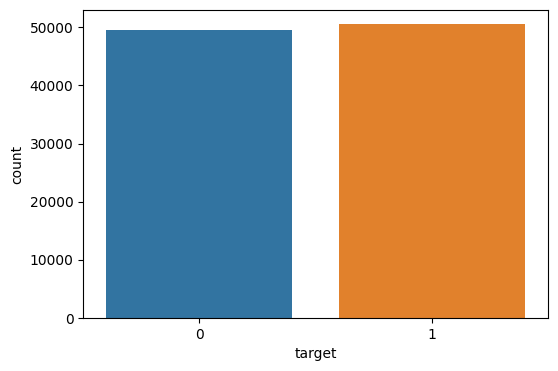

In [22]:
plt.figure(figsize=(6,4))
target_value = df_train['target'].value_counts()
sns.countplot(x='target', data=df_train)
plt.show()

**- The target column in the training dataset is balanced**

In [23]:
df_train.value_counts('target')

target
1    50525
0    49475
Name: count, dtype: int64

- **There are two types of values in the target "0" & "1"**

In [24]:
df_1 = df_train.copy()

numerical_columns = df_1.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('target') 

correlations = df_1[numerical_columns].corrwith(df_1['target']).abs().sort_values(ascending=False)

print("Numerical features with correlation to target:")
print(correlations)


Numerical features with correlation to target:
NumAntivirusProductsInstalled         0.151375
AntivirusConfigID                     0.118304
TotalPhysicalRAMMB                    0.065747
IsAlwaysOnAlwaysConnectedCapable      0.064776
IsSystemProtected                     0.062401
IsGamer                               0.061191
ProcessorCoreCount                    0.056769
PrimaryDiskCapacityMB                 0.049117
RealTimeProtectionState               0.049012
IsTouchEnabled                        0.046142
IsPassiveModeEnabled                  0.041997
NumAntivirusProductsEnabled           0.041547
IsVirtualDevice                       0.039789
OSBuildNumberOnly                     0.038544
PrimaryDisplayDiagonalInches          0.035064
OSBuildNumber                         0.034712
PrimaryDisplayResolutionHorizontal    0.030559
IEVersionID                           0.023820
HasOpticalDiskDrive                   0.022328
ProcessorModelID                      0.021678
FirmwareManuf

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [25]:
Top_ten_corr = correlations.head(10).index.tolist()
Top_ten_corr

['NumAntivirusProductsInstalled',
 'AntivirusConfigID',
 'TotalPhysicalRAMMB',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsSystemProtected',
 'IsGamer',
 'ProcessorCoreCount',
 'PrimaryDiskCapacityMB',
 'RealTimeProtectionState',
 'IsTouchEnabled']

In [26]:
Last_ten_corr = correlations.tail(10).index.tolist()
Last_ten_corr

['OSInstallLanguageID',
 'ProcessorManufacturerID',
 'GeoRegionID',
 'IsSecureBootEnabled',
 'OSUILocaleID',
 'EnableLUA',
 'OEMModelID',
 'IsBetaUser',
 'AutoSampleSubmissionEnabled',
 'IsFlightsDisabled']

- **The numerical feature 'NumAntivirusProductsInstalled' has very high correlation with target.**

- **The numerical feature 'OEMModelID' has very less correlation with target.**

In [27]:
df_2 = df_train.copy()

categorical_columns = df_2.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoder = LabelEncoder()

for col in categorical_columns:
    df_2[col] = label_encoder.fit_transform(df_2[col].astype(str))

correlations_1 = df_2[categorical_columns].corrwith(df_2['target']).abs().sort_values(ascending=False)

print("Encoded categorical features with correlation to target:")
print(correlations_1)

Encoded categorical features with correlation to target:
Processor                   0.073286
OSArchitecture              0.072863
EngineVersion               0.055361
SignatureVersion            0.048941
DateAS                      0.047002
PowerPlatformRole           0.046313
DateOS                      0.042607
NumericOSVersion            0.041087
OSEdition                   0.029293
OSBuildLab                  0.028968
OSSkuFriendlyName           0.028384
PrimaryDiskType             0.023176
OsPlatformSubRelease        0.019689
AutoUpdateOptionsName       0.017804
SKUEditionName              0.017667
LicenseActivationChannel    0.015933
OSBranch                    0.015065
AppVersion                  0.012230
OSInstallType               0.011822
ChassisType                 0.009021
DeviceFamily                0.007814
ProductName                 0.004897
OSGenuineState              0.003679
FlightRing                  0.002765
MachineID                   0.001237
MDC2FormFactor    

In [28]:
Top_ten_corr_1 = correlations_1.head(10).index.tolist()
Top_ten_corr_1

['Processor',
 'OSArchitecture',
 'EngineVersion',
 'SignatureVersion',
 'DateAS',
 'PowerPlatformRole',
 'DateOS',
 'NumericOSVersion',
 'OSEdition',
 'OSBuildLab']

In [29]:
Last_ten_corr_1 = correlations_1.tail(10).index.tolist()
Last_ten_corr_1

['OSInstallType',
 'ChassisType',
 'DeviceFamily',
 'ProductName',
 'OSGenuineState',
 'FlightRing',
 'MachineID',
 'MDC2FormFactor',
 'PlatformType',
 'OSVersion']

- **The categorical feature 'Processor' has very high correlation with target.**

- **The categorical feature 'OSVersion' has very less correlation with target.**

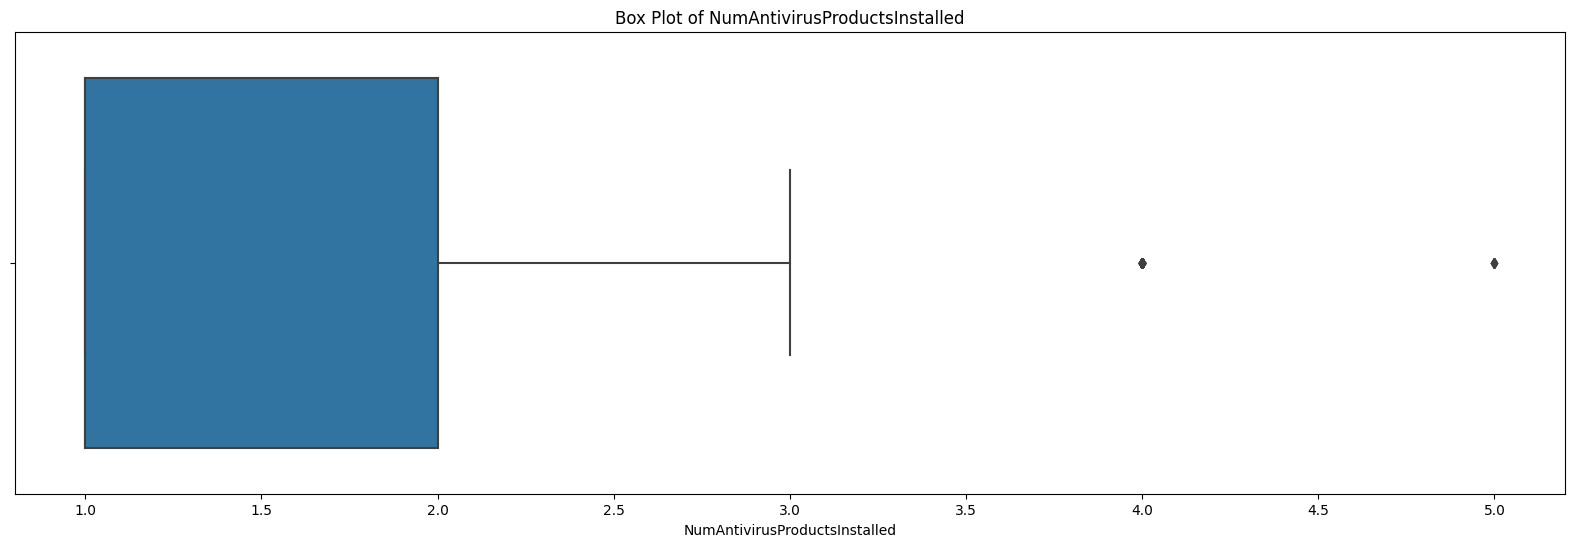

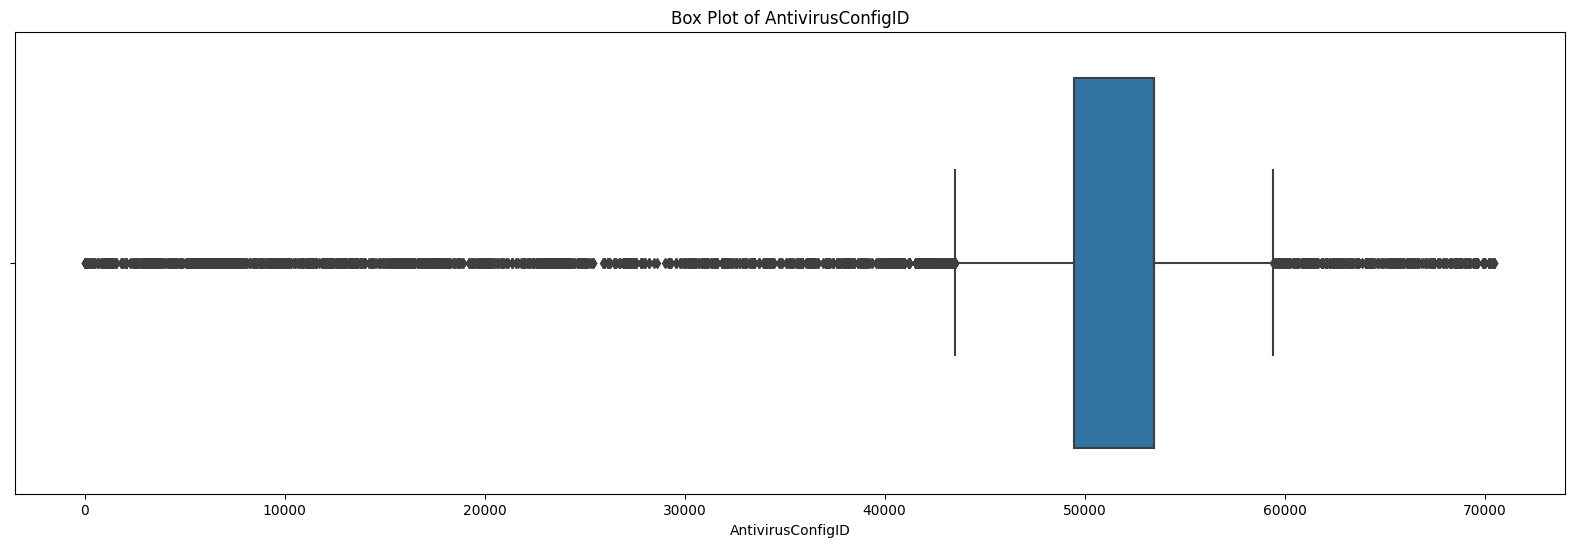

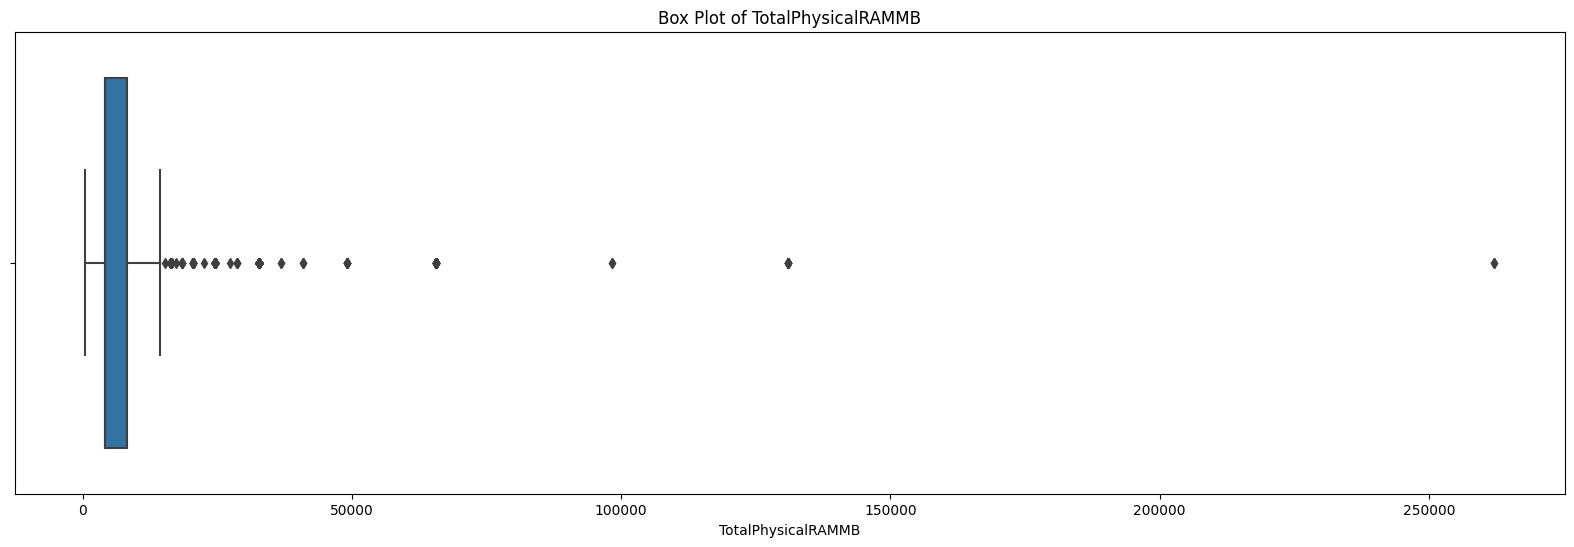

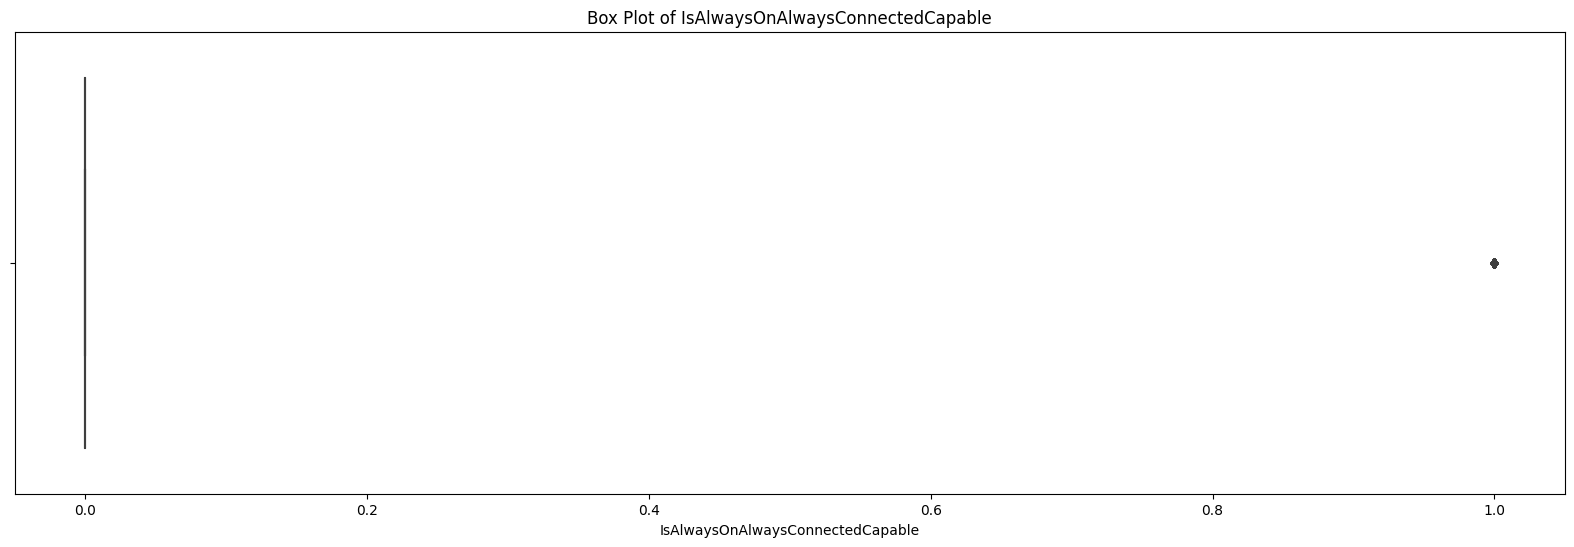

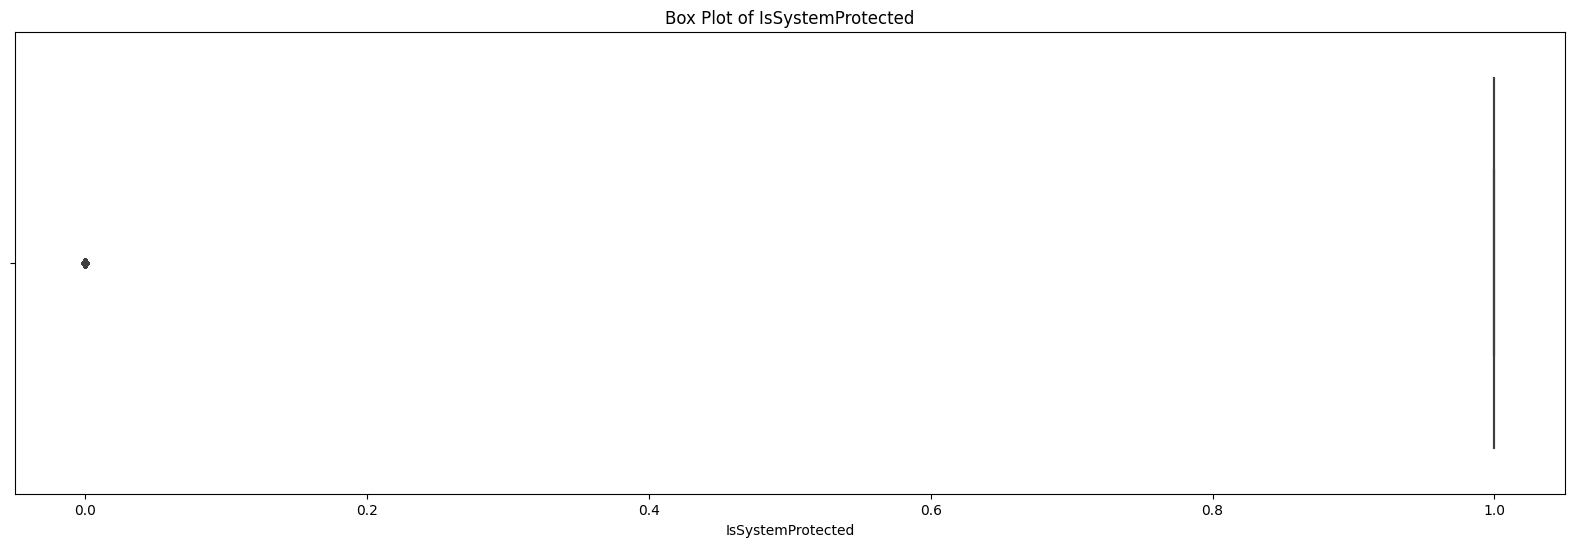

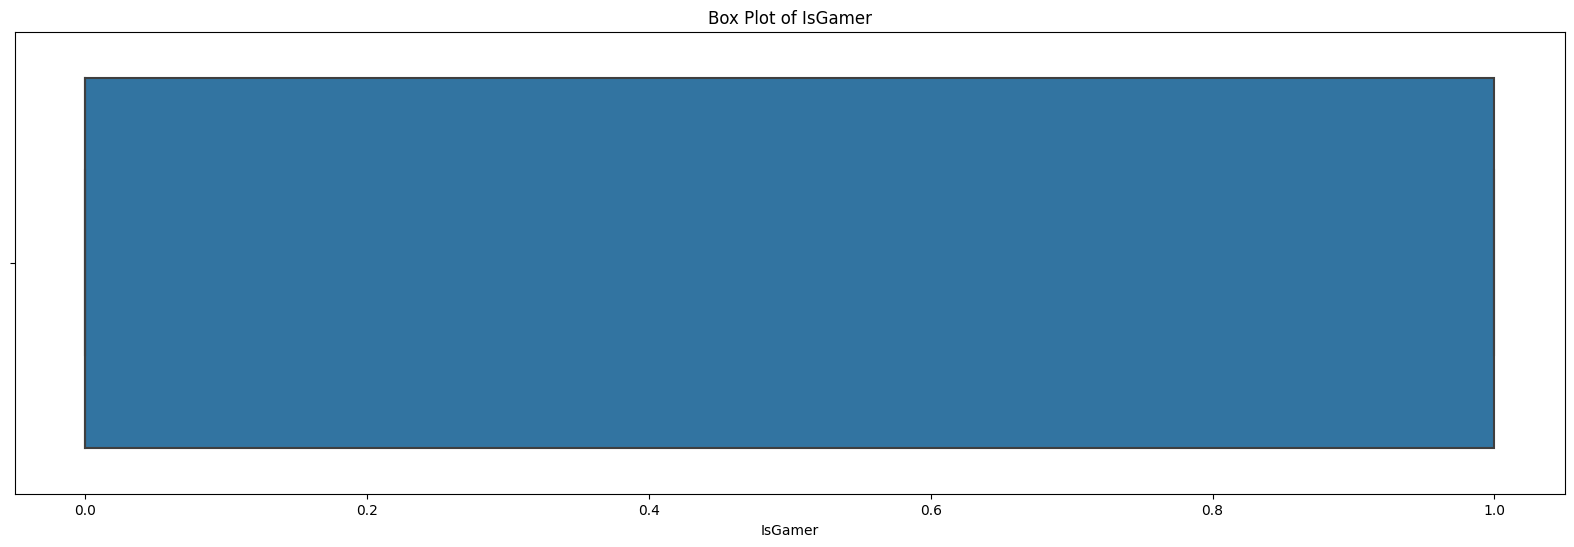

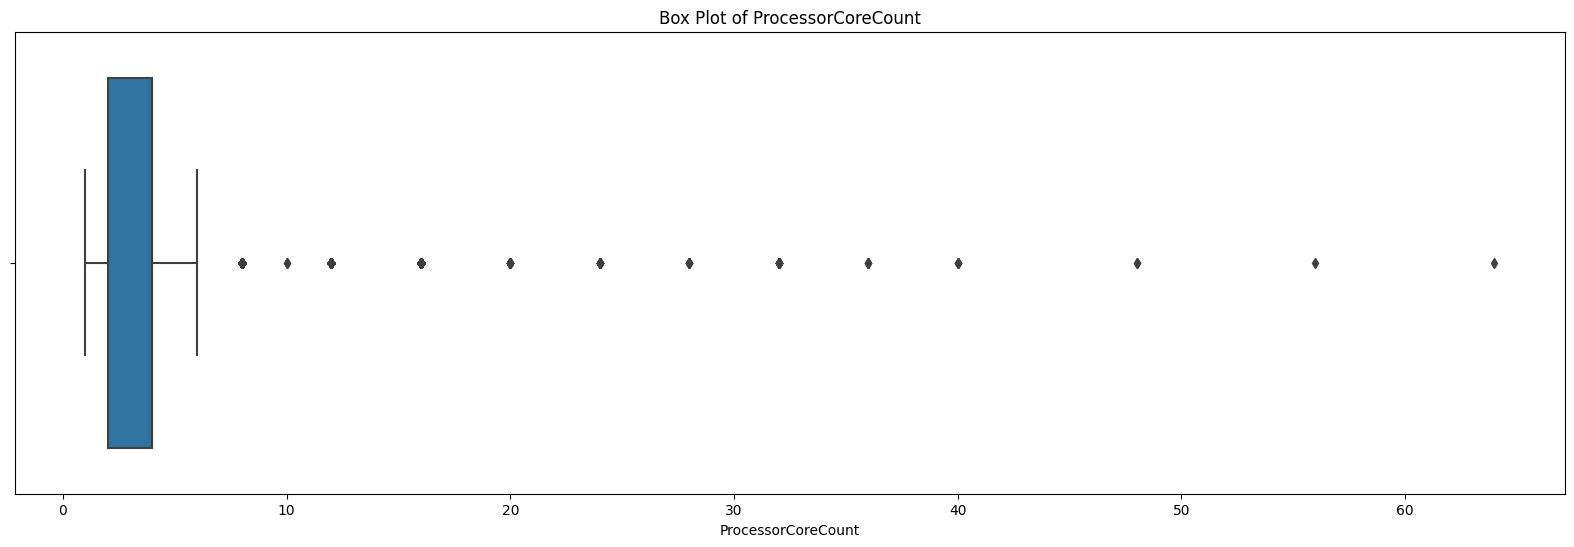

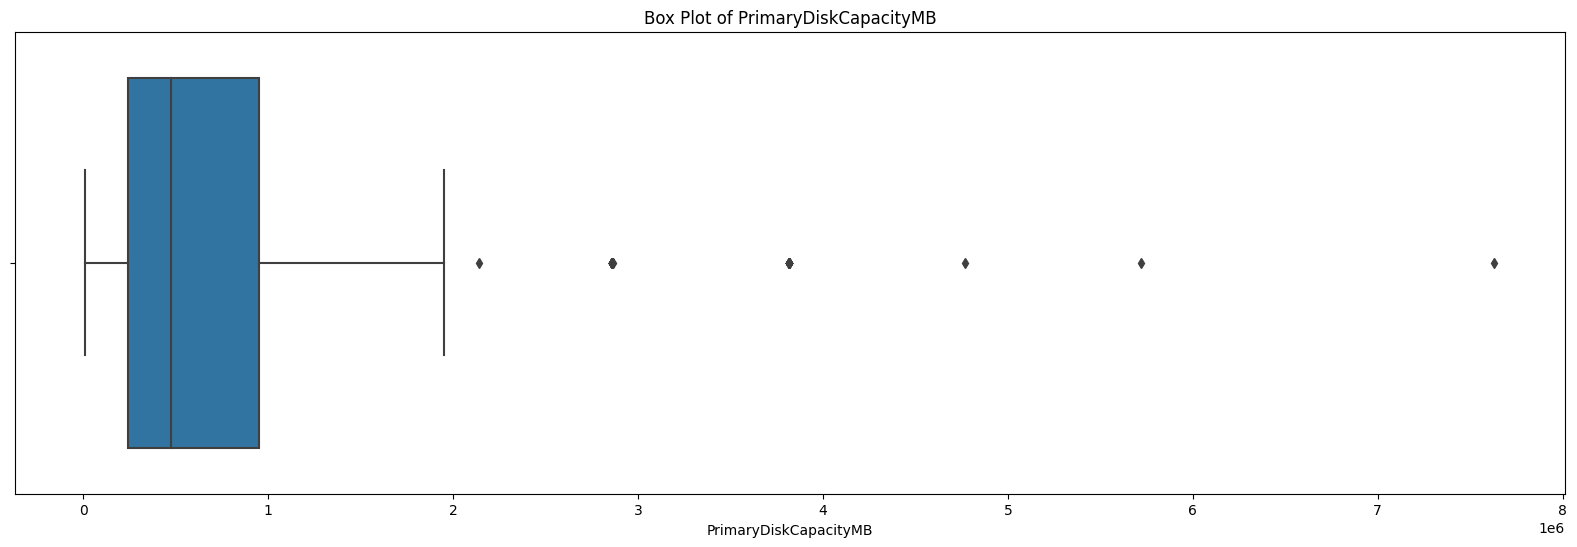

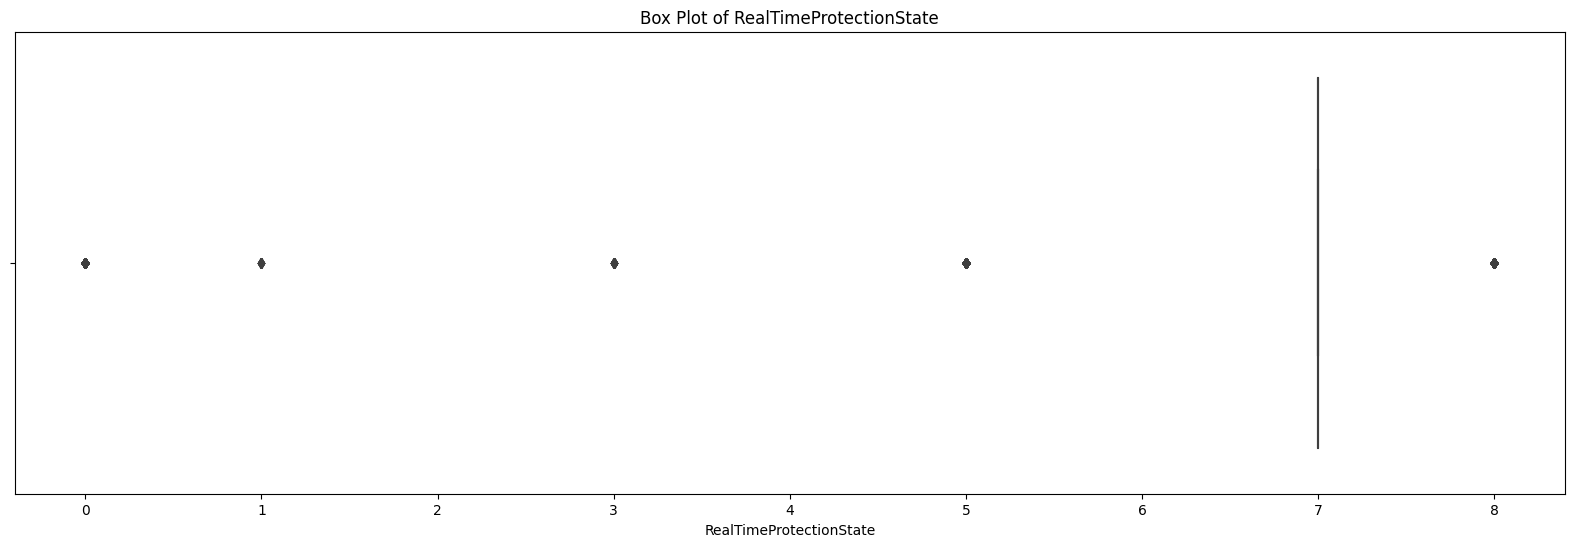

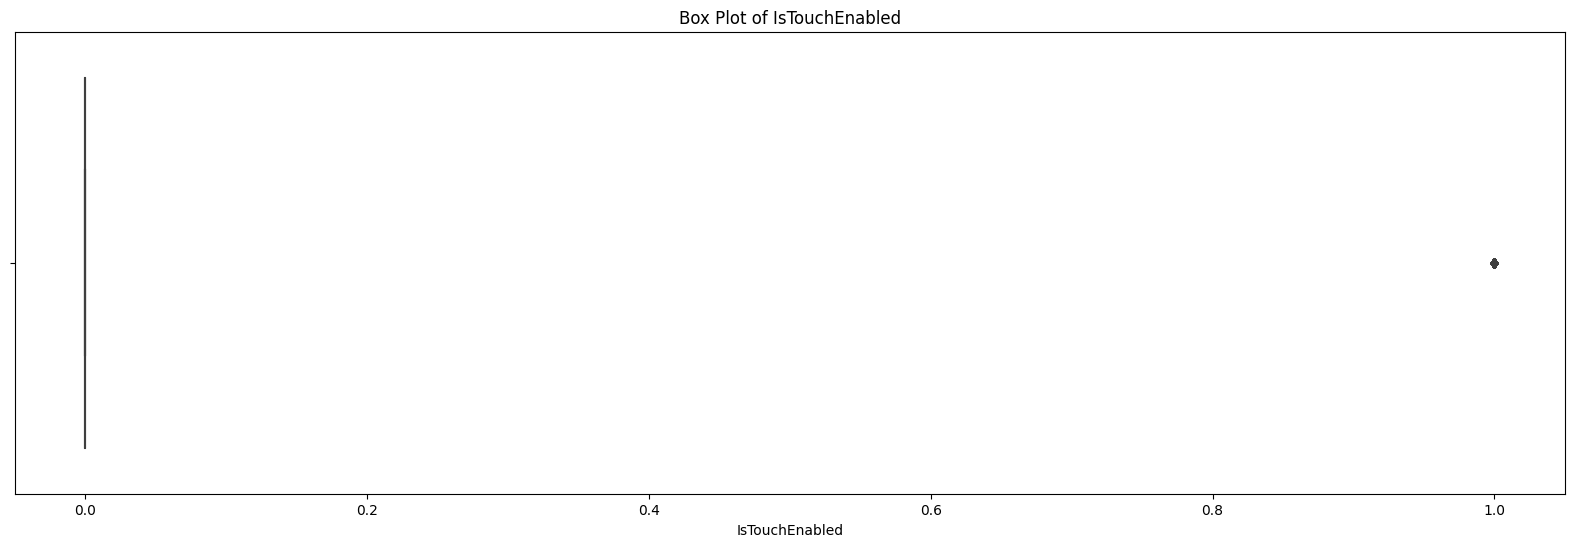

In [30]:
num_cols = Top_ten_corr
    
for col in num_cols:
    plt.figure(figsize=(20, 6))
    sns.boxplot(x=df_train[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

- **These Box-plot are for top ten numerical features which has high correlation with target column.**

- **The feature 'AntivirusConfigID' has more number of outliers compare to others in both sides of whiskers of box plot.**

In [31]:
data = ['NumAntivirusProductsInstalled',
 'AntivirusConfigID',
 'TotalPhysicalRAMMB',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsSystemProtected',
 'IsGamer',
 'ProcessorCoreCount',
 'PrimaryDiskCapacityMB',
 'RealTimeProtectionState',
 'IsTouchEnabled',
 'Processor',
 'OSArchitecture',
 'EngineVersion',
 'SignatureVersion',
 'DateAS',
 'PowerPlatformRole',
 'DateOS',
 'NumericOSVersion',
 'OSEdition',
 'OSBuildLab']


data

['NumAntivirusProductsInstalled',
 'AntivirusConfigID',
 'TotalPhysicalRAMMB',
 'IsAlwaysOnAlwaysConnectedCapable',
 'IsSystemProtected',
 'IsGamer',
 'ProcessorCoreCount',
 'PrimaryDiskCapacityMB',
 'RealTimeProtectionState',
 'IsTouchEnabled',
 'Processor',
 'OSArchitecture',
 'EngineVersion',
 'SignatureVersion',
 'DateAS',
 'PowerPlatformRole',
 'DateOS',
 'NumericOSVersion',
 'OSEdition',
 'OSBuildLab']

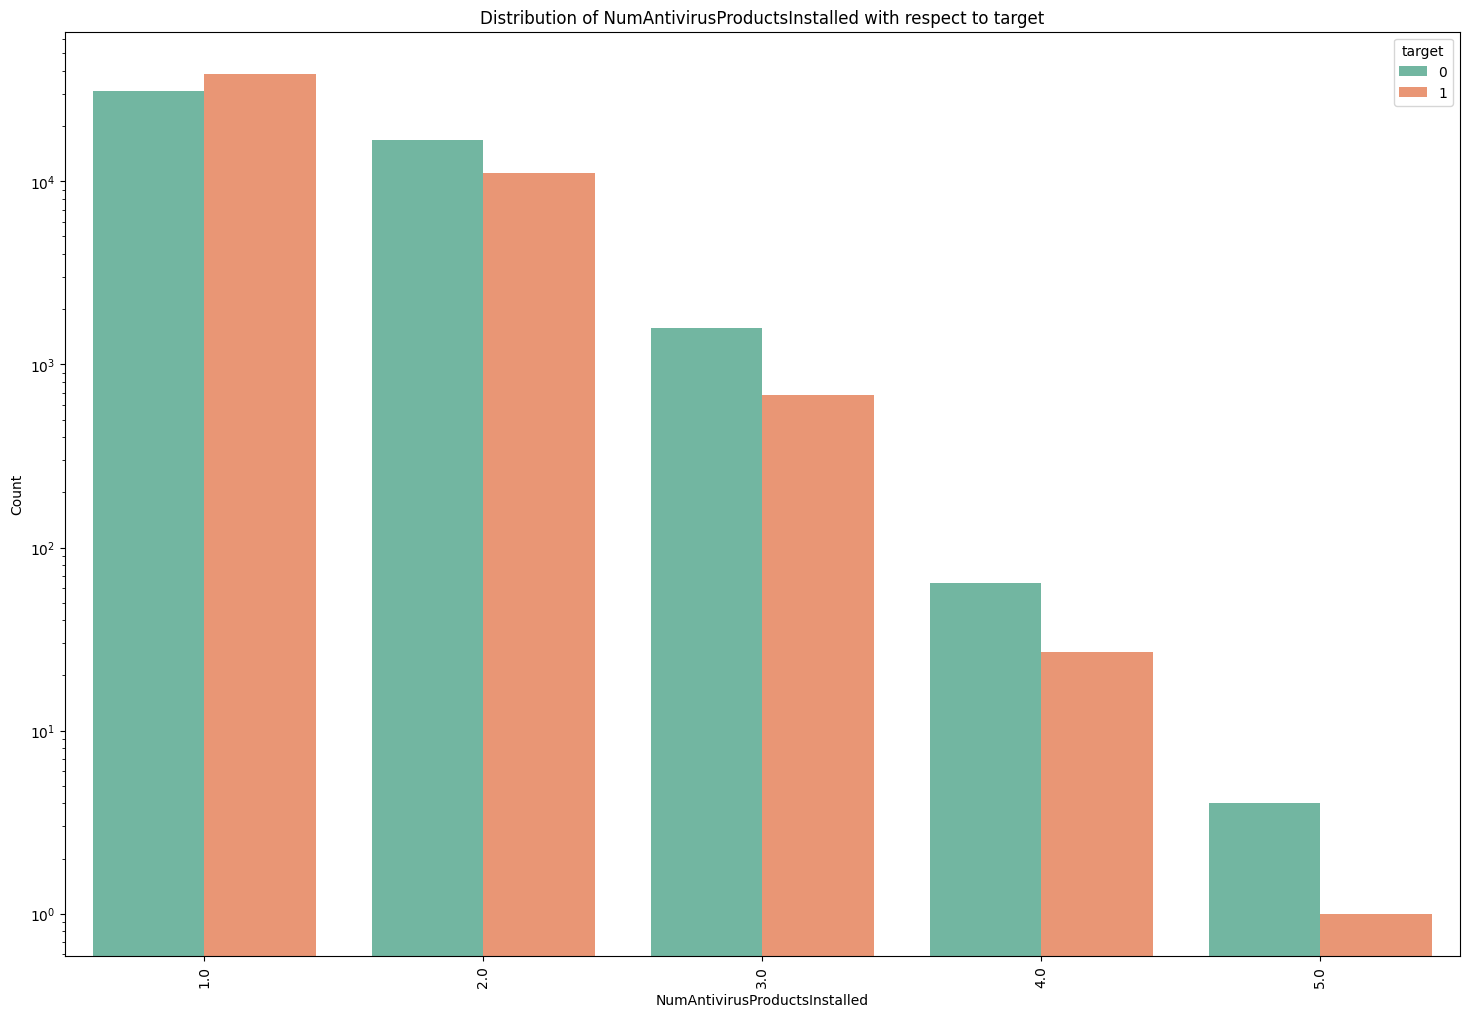

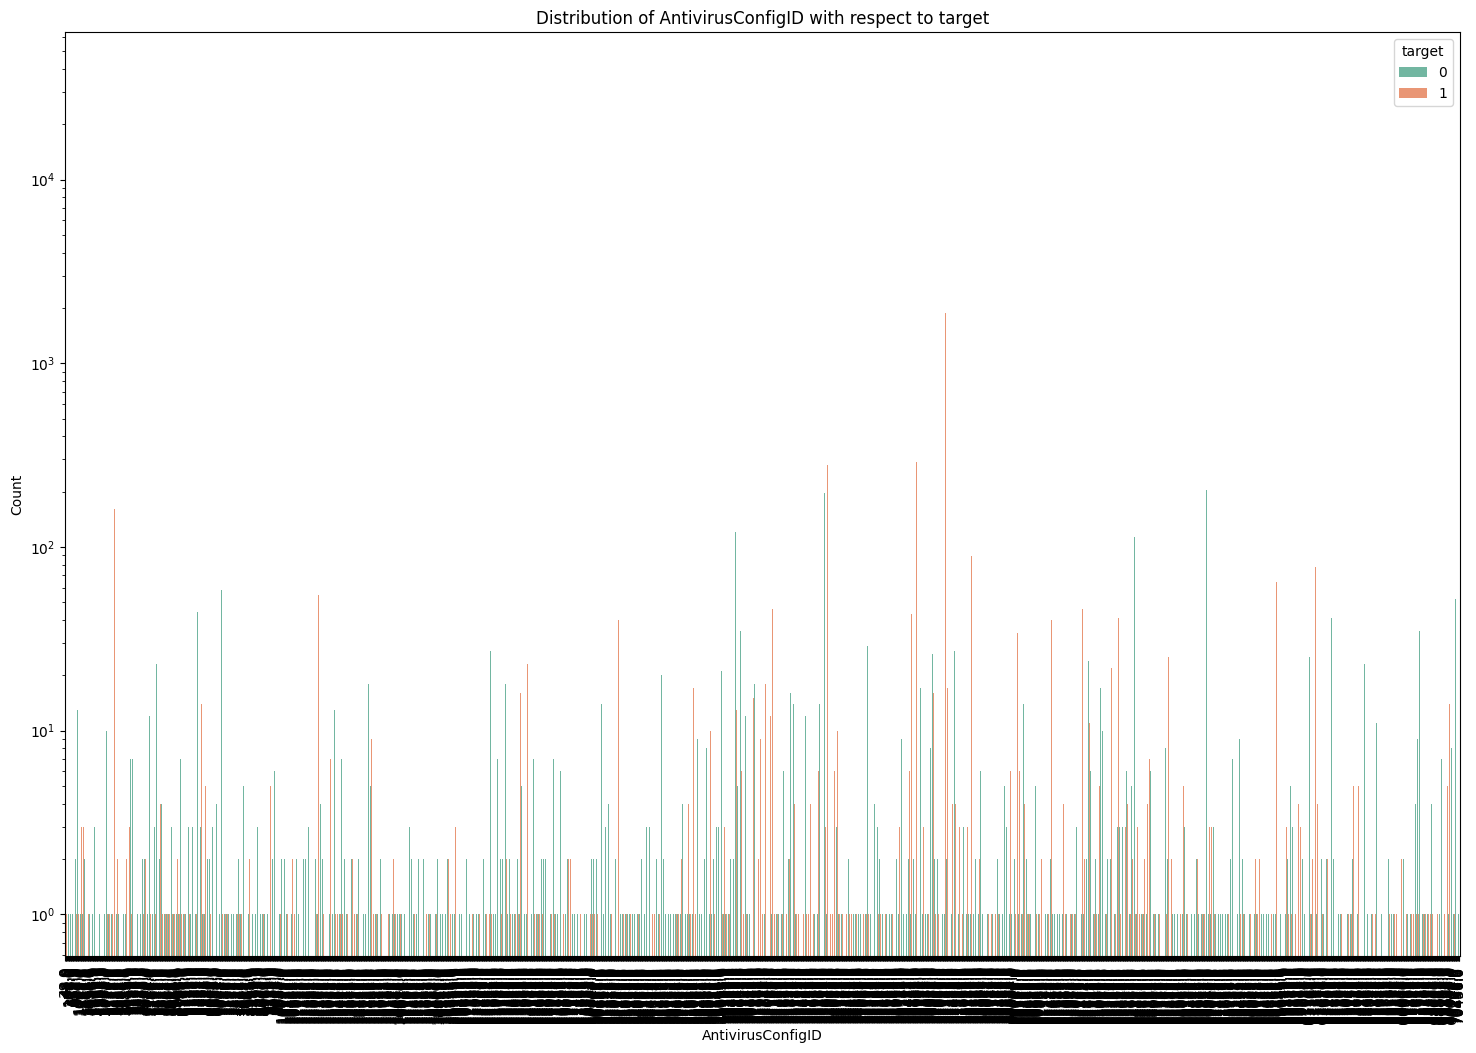

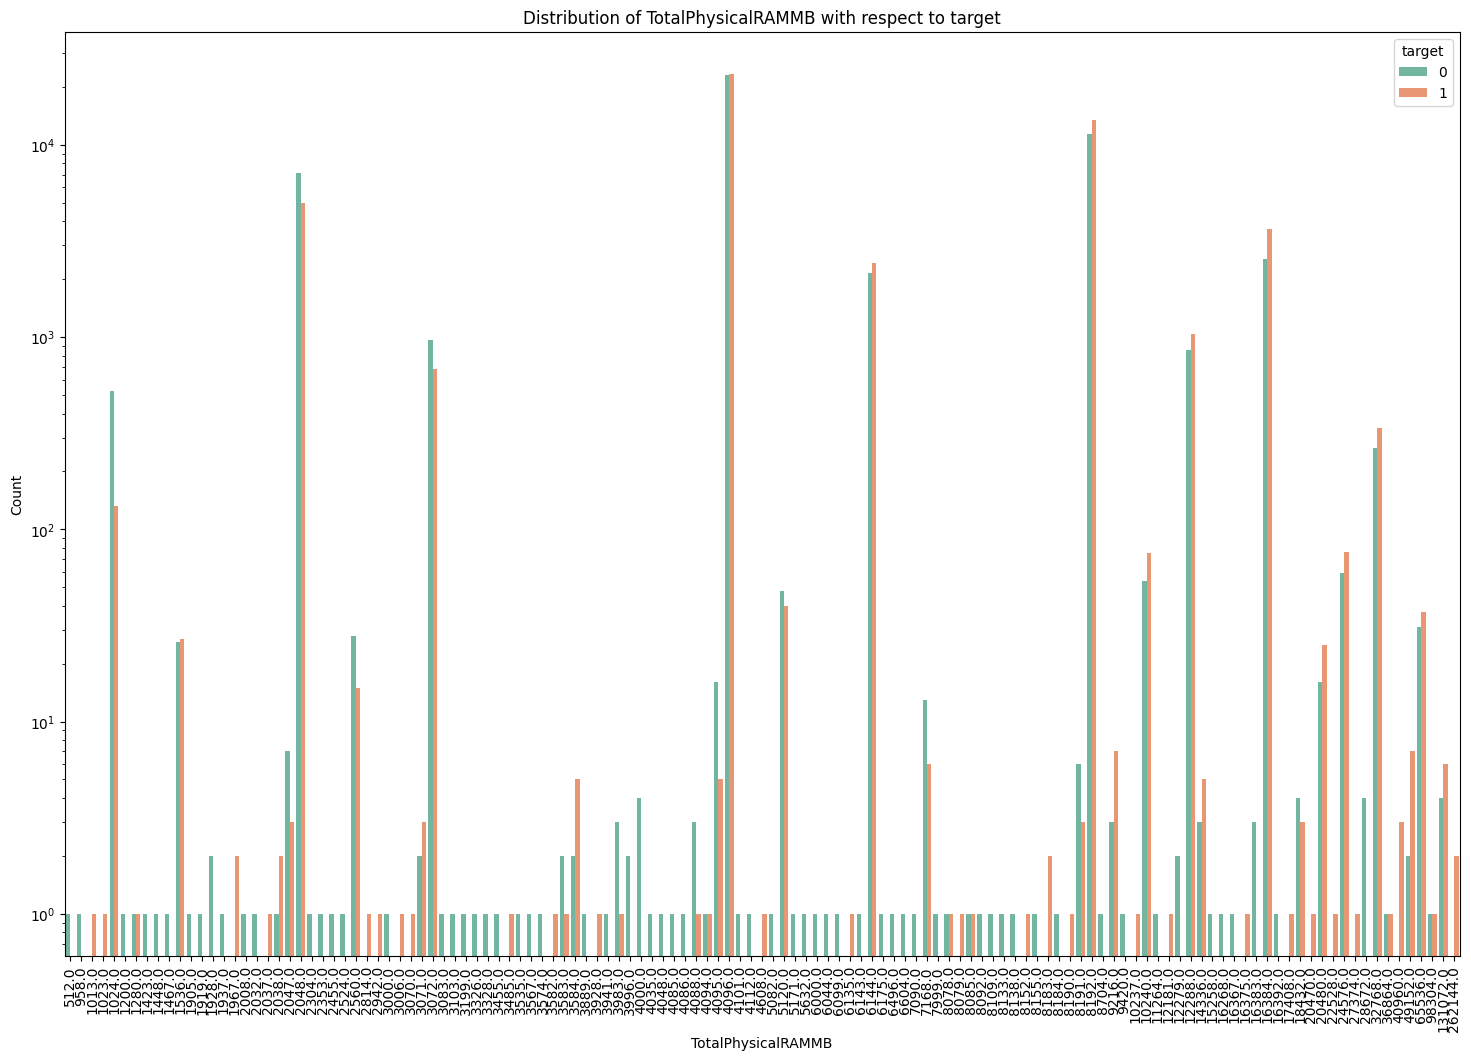

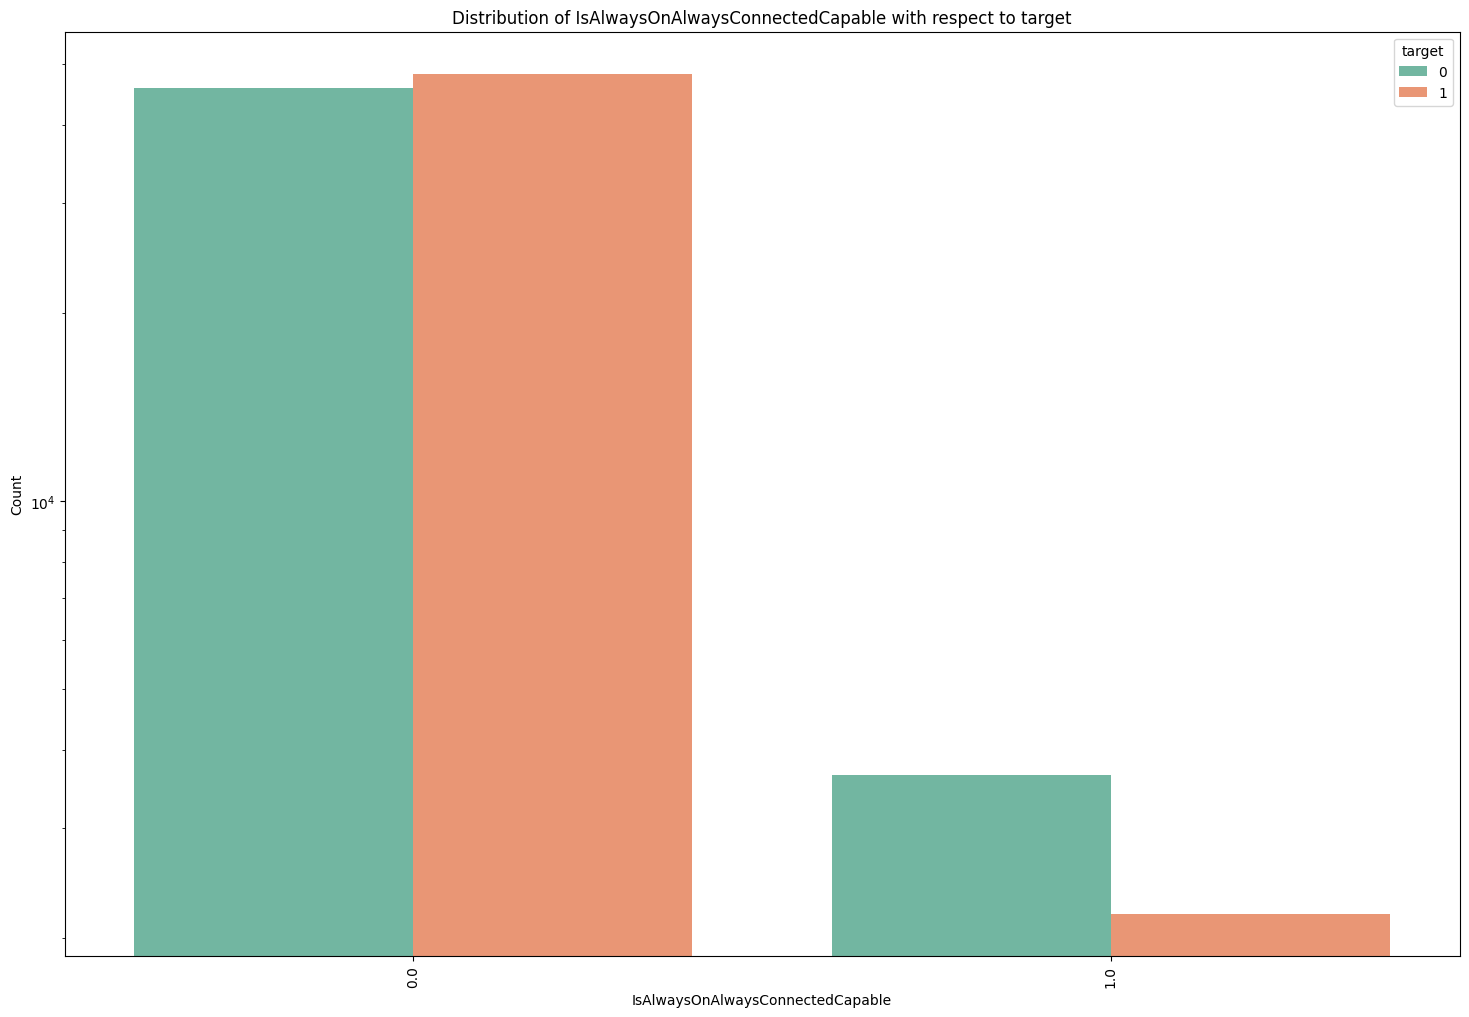

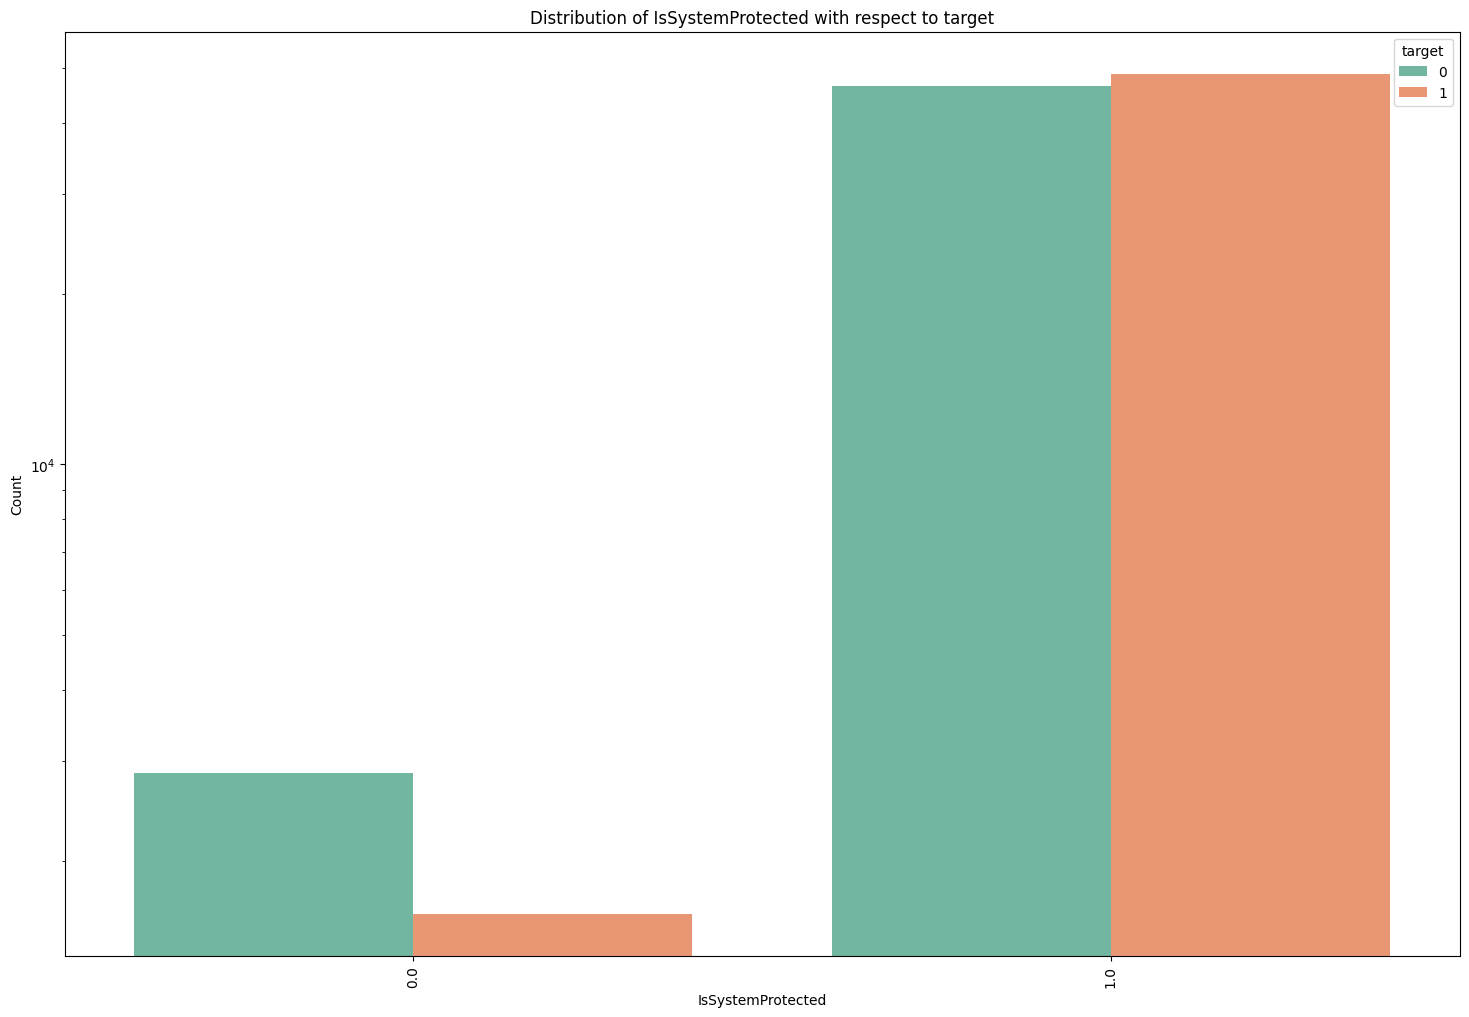

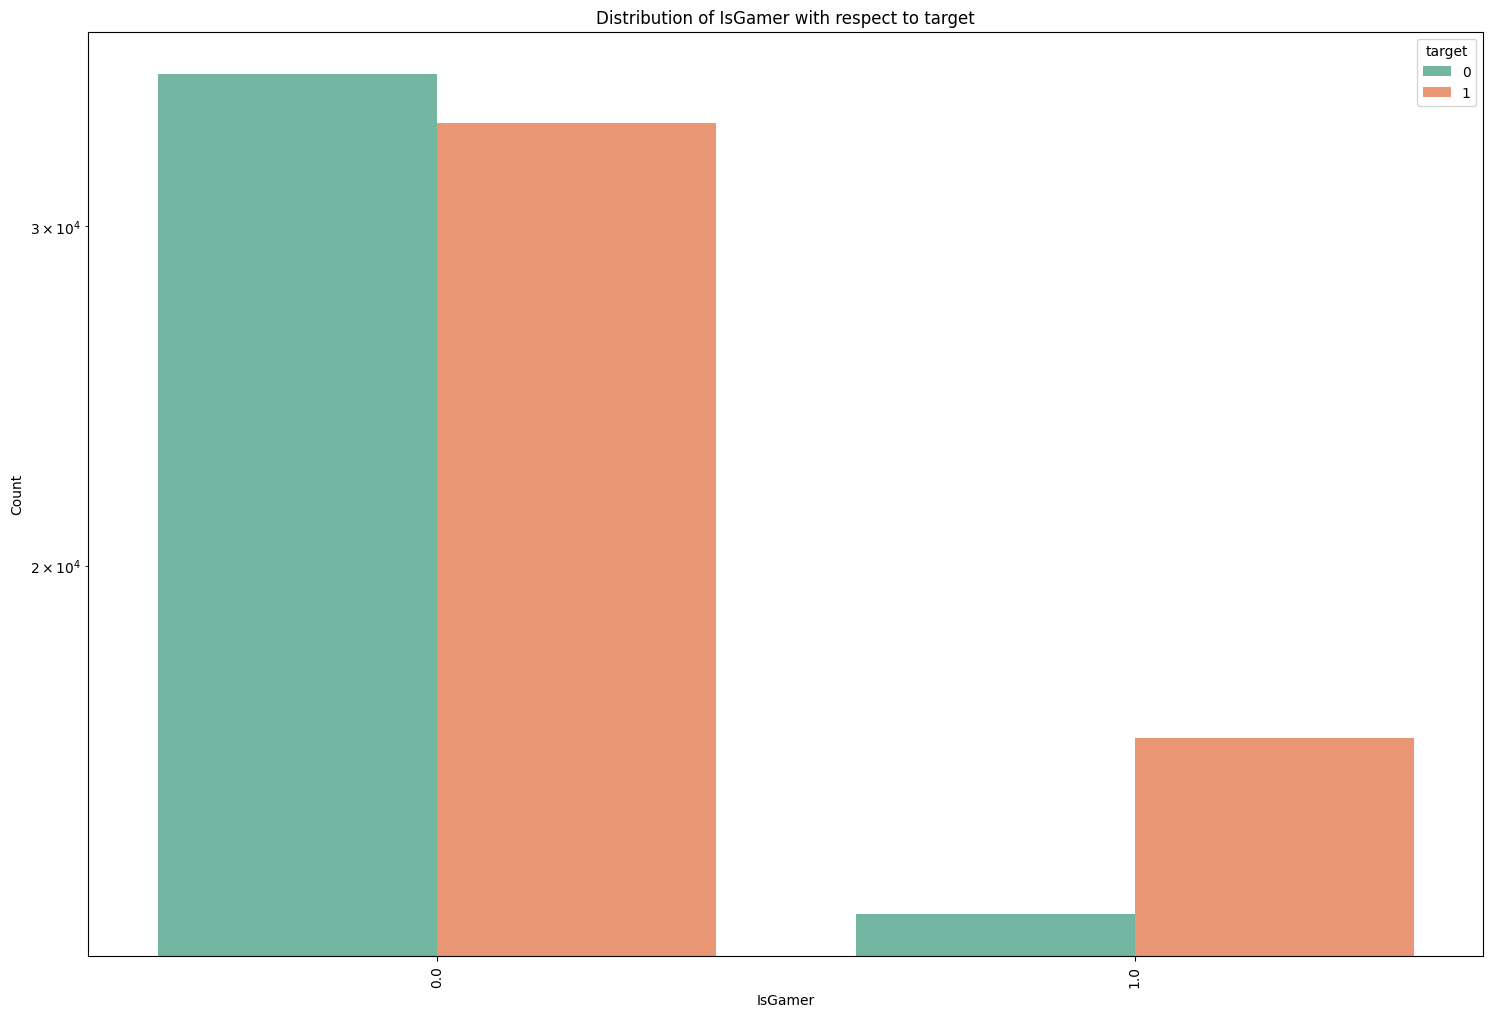

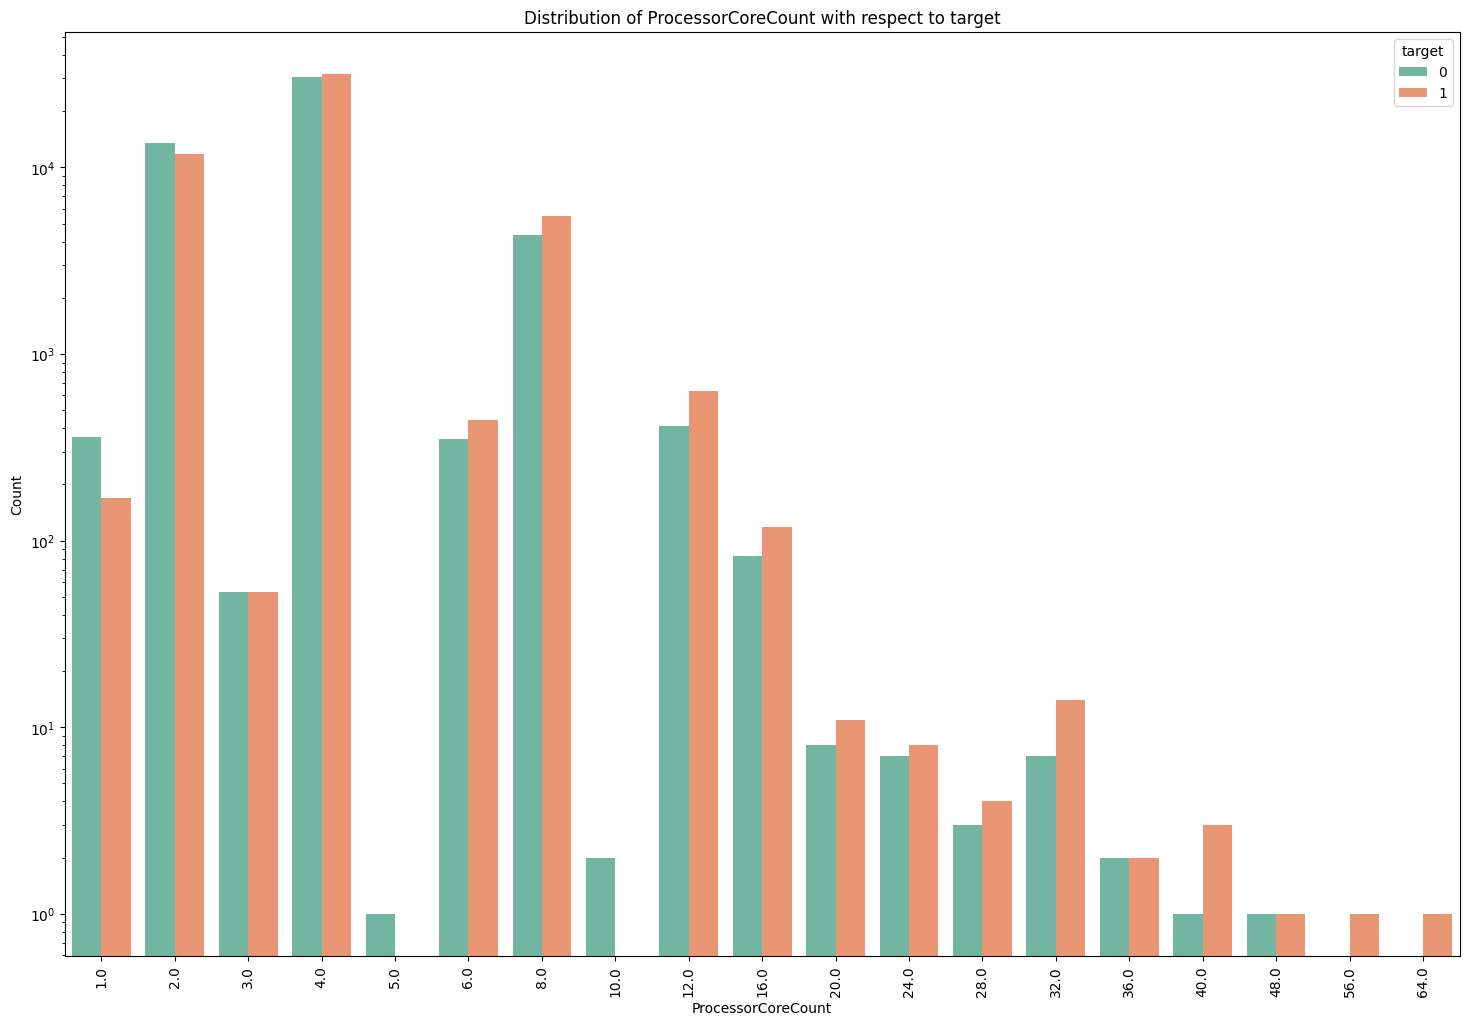

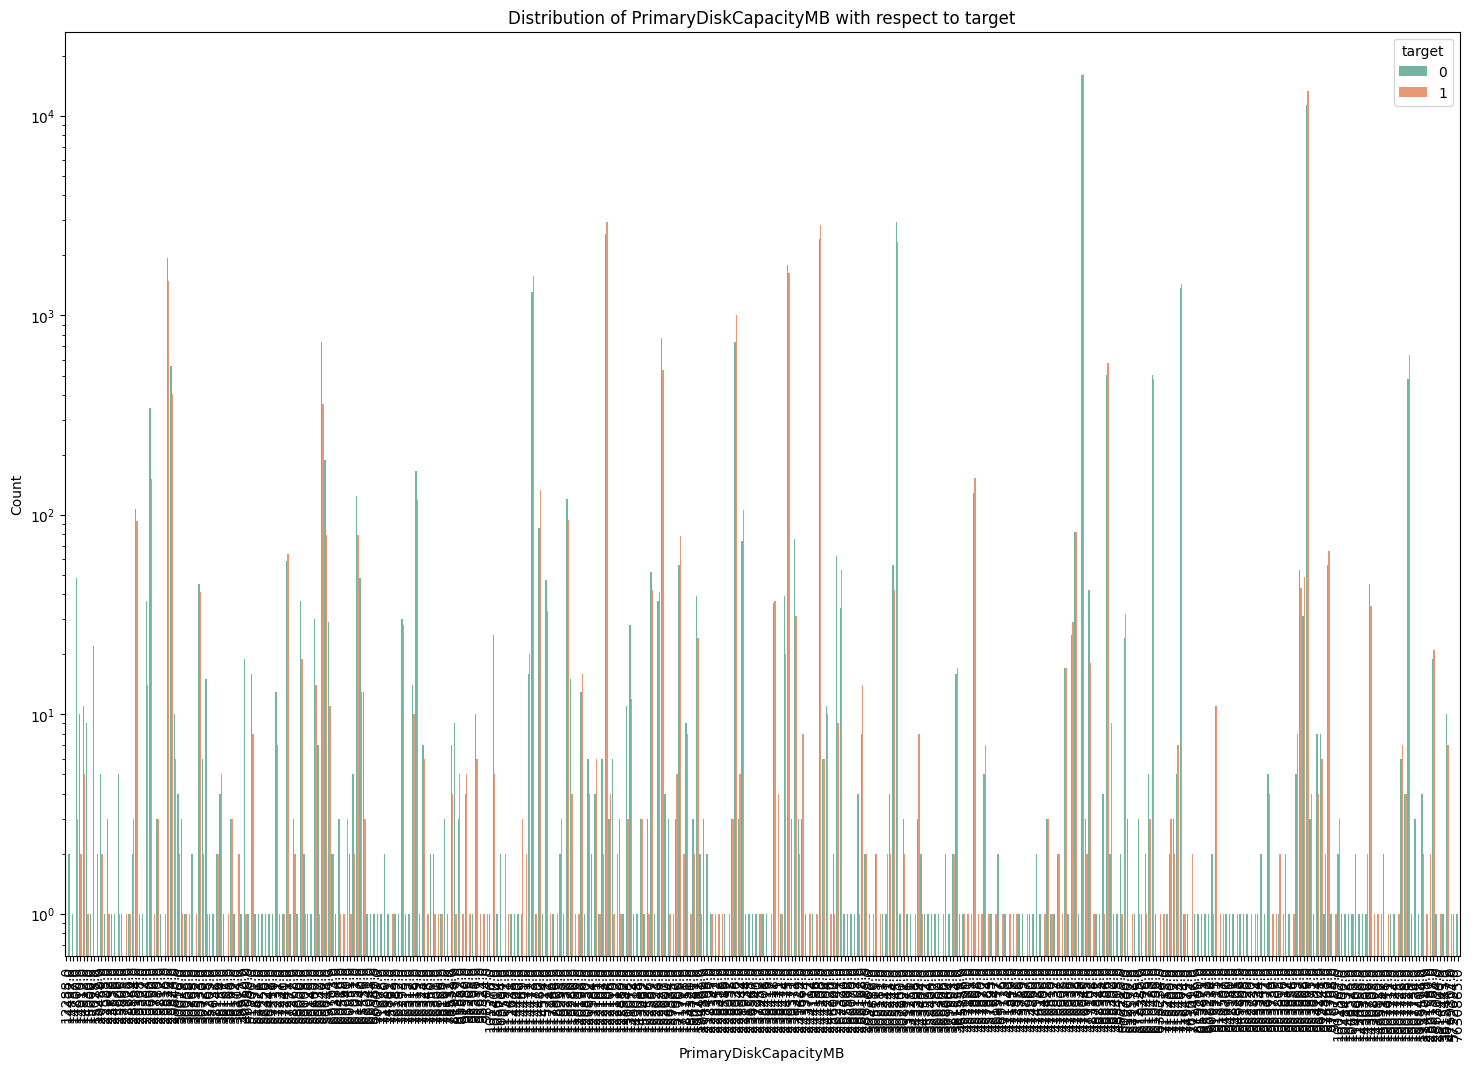

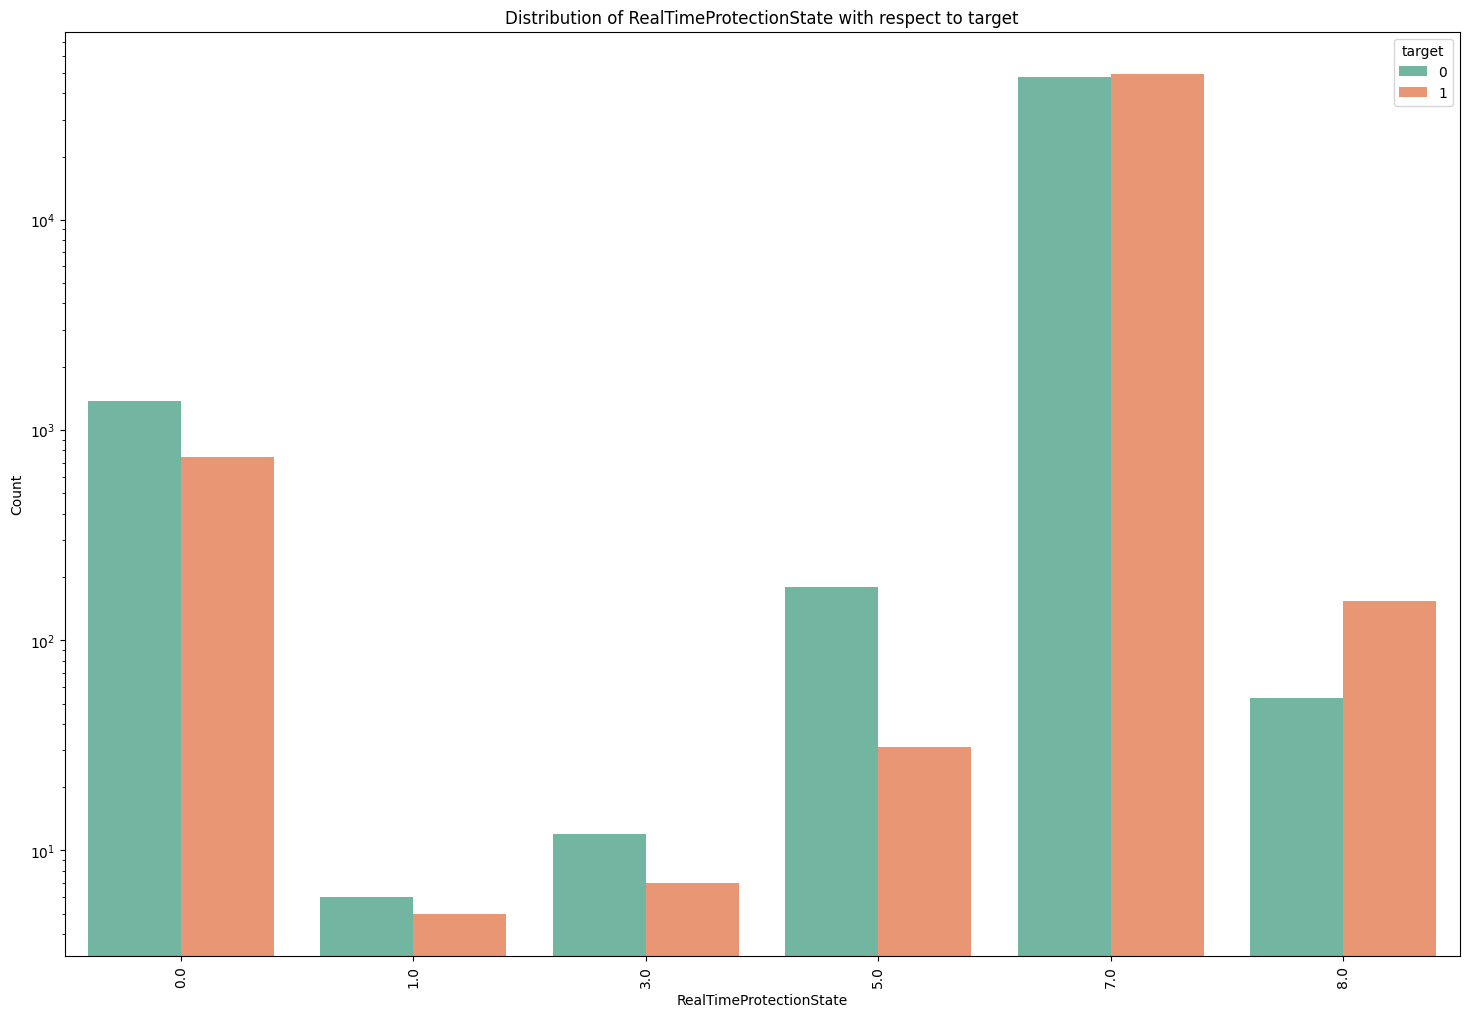

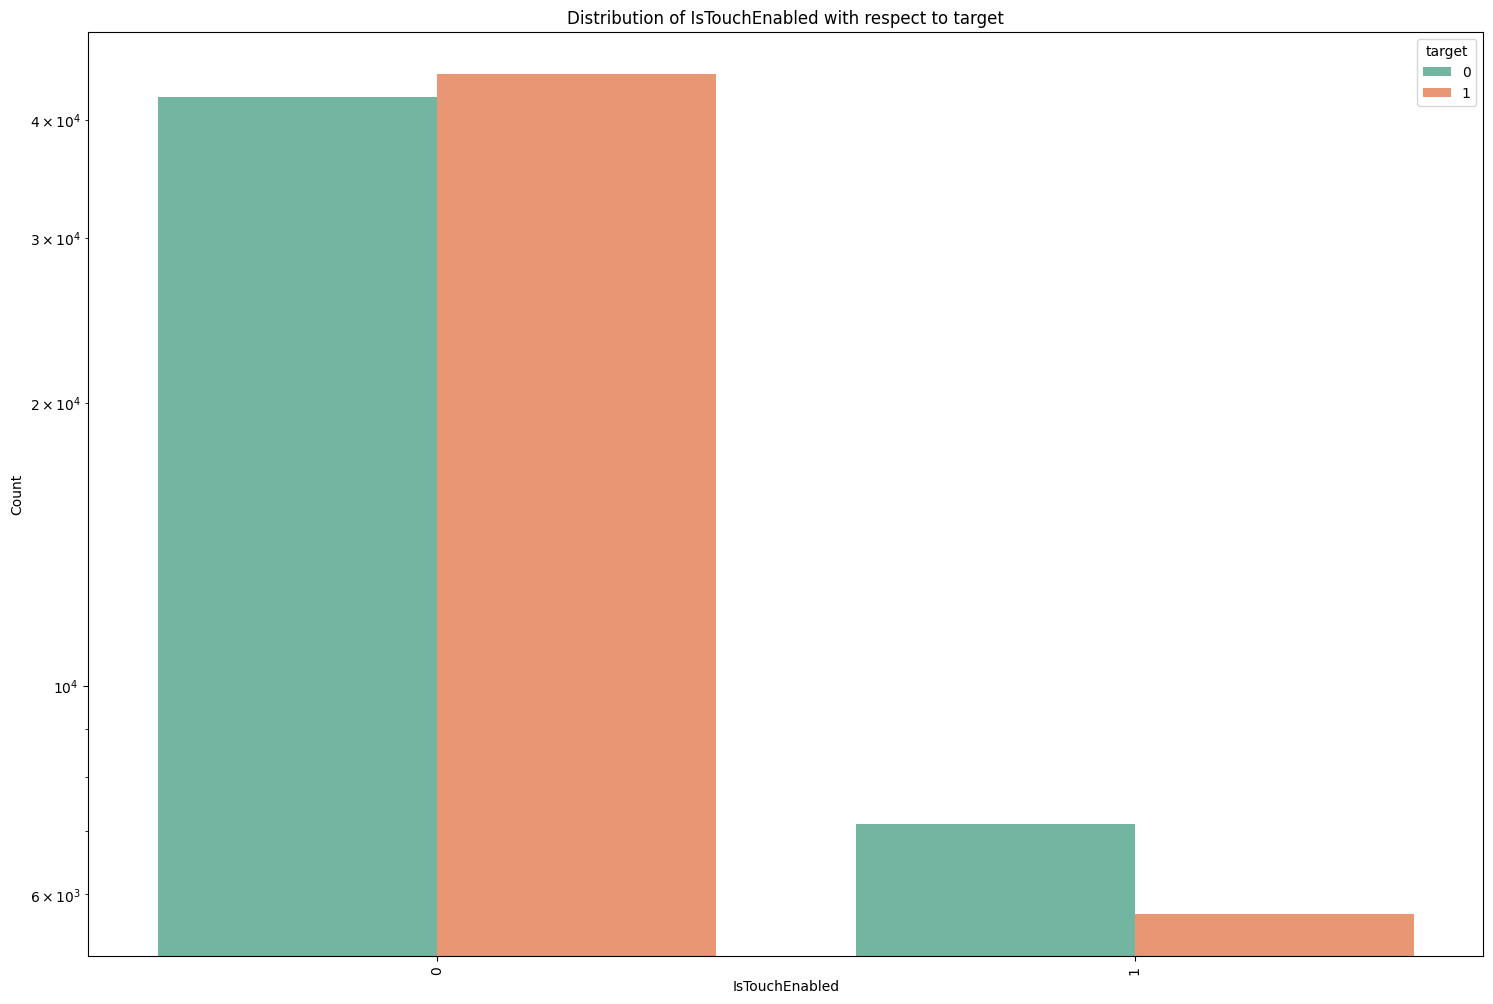

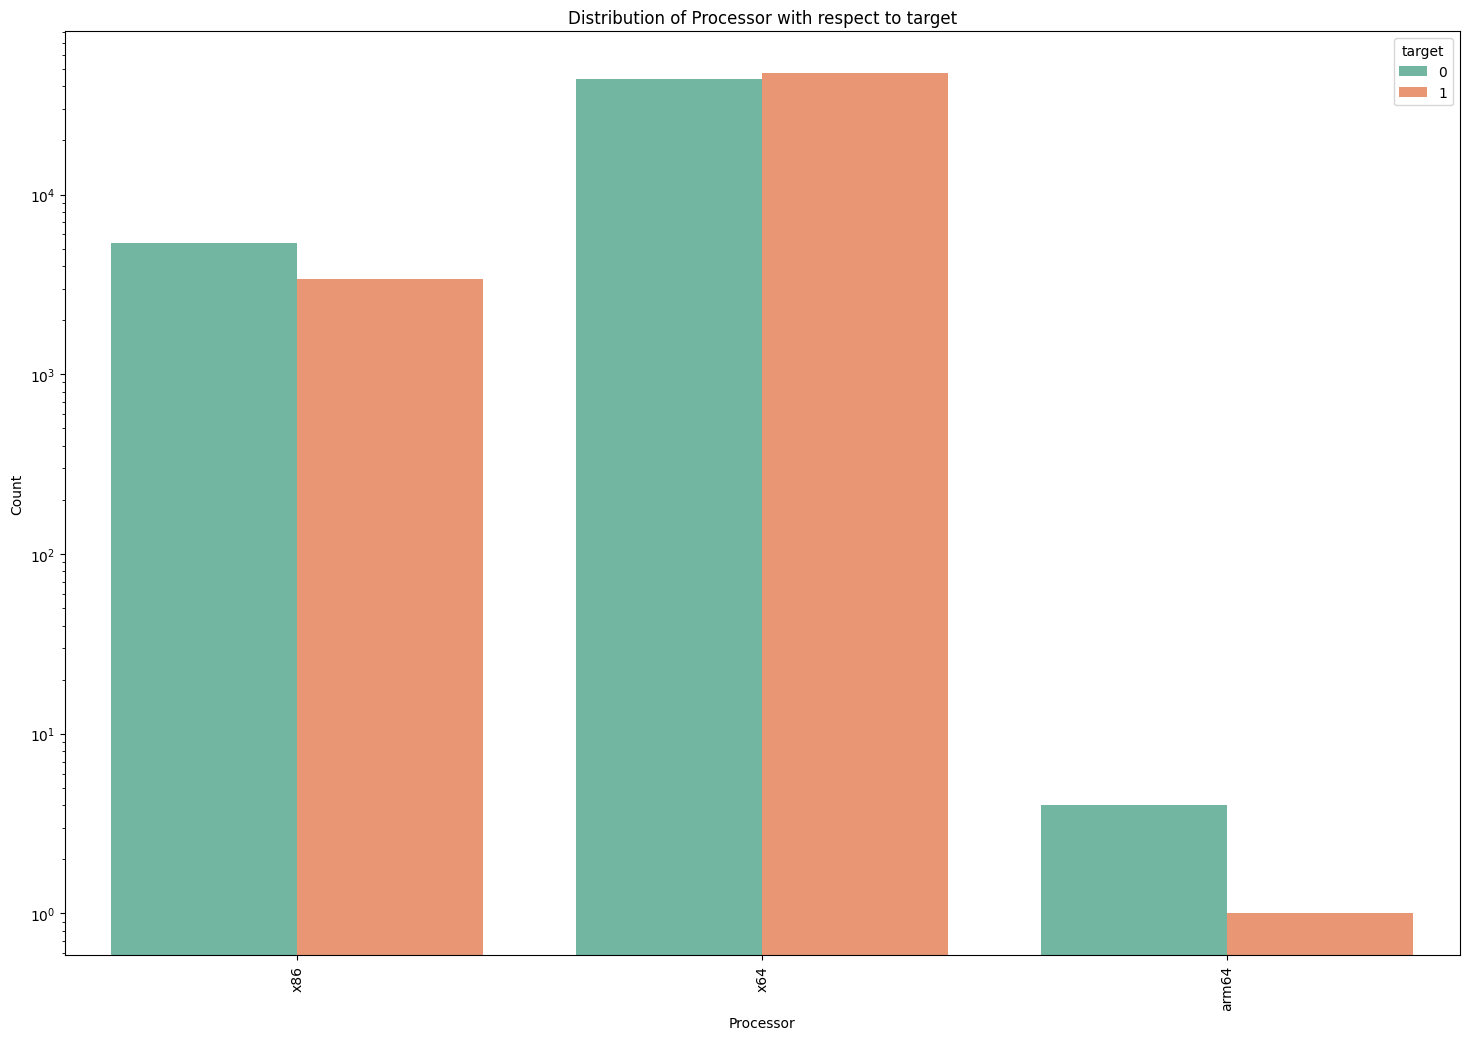

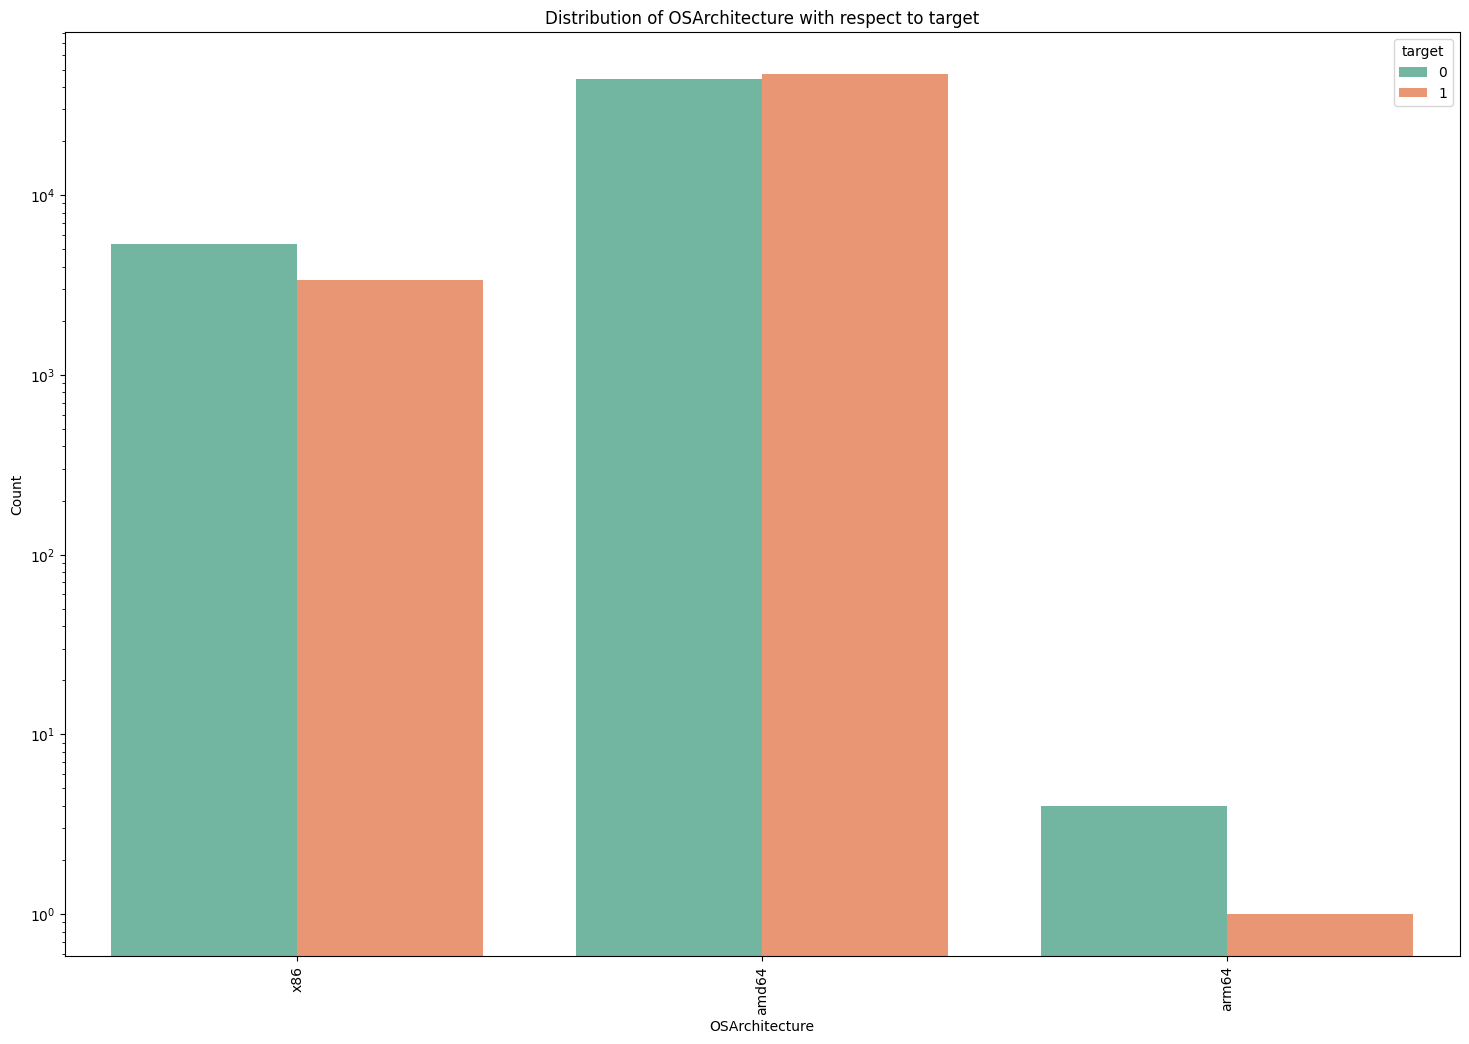

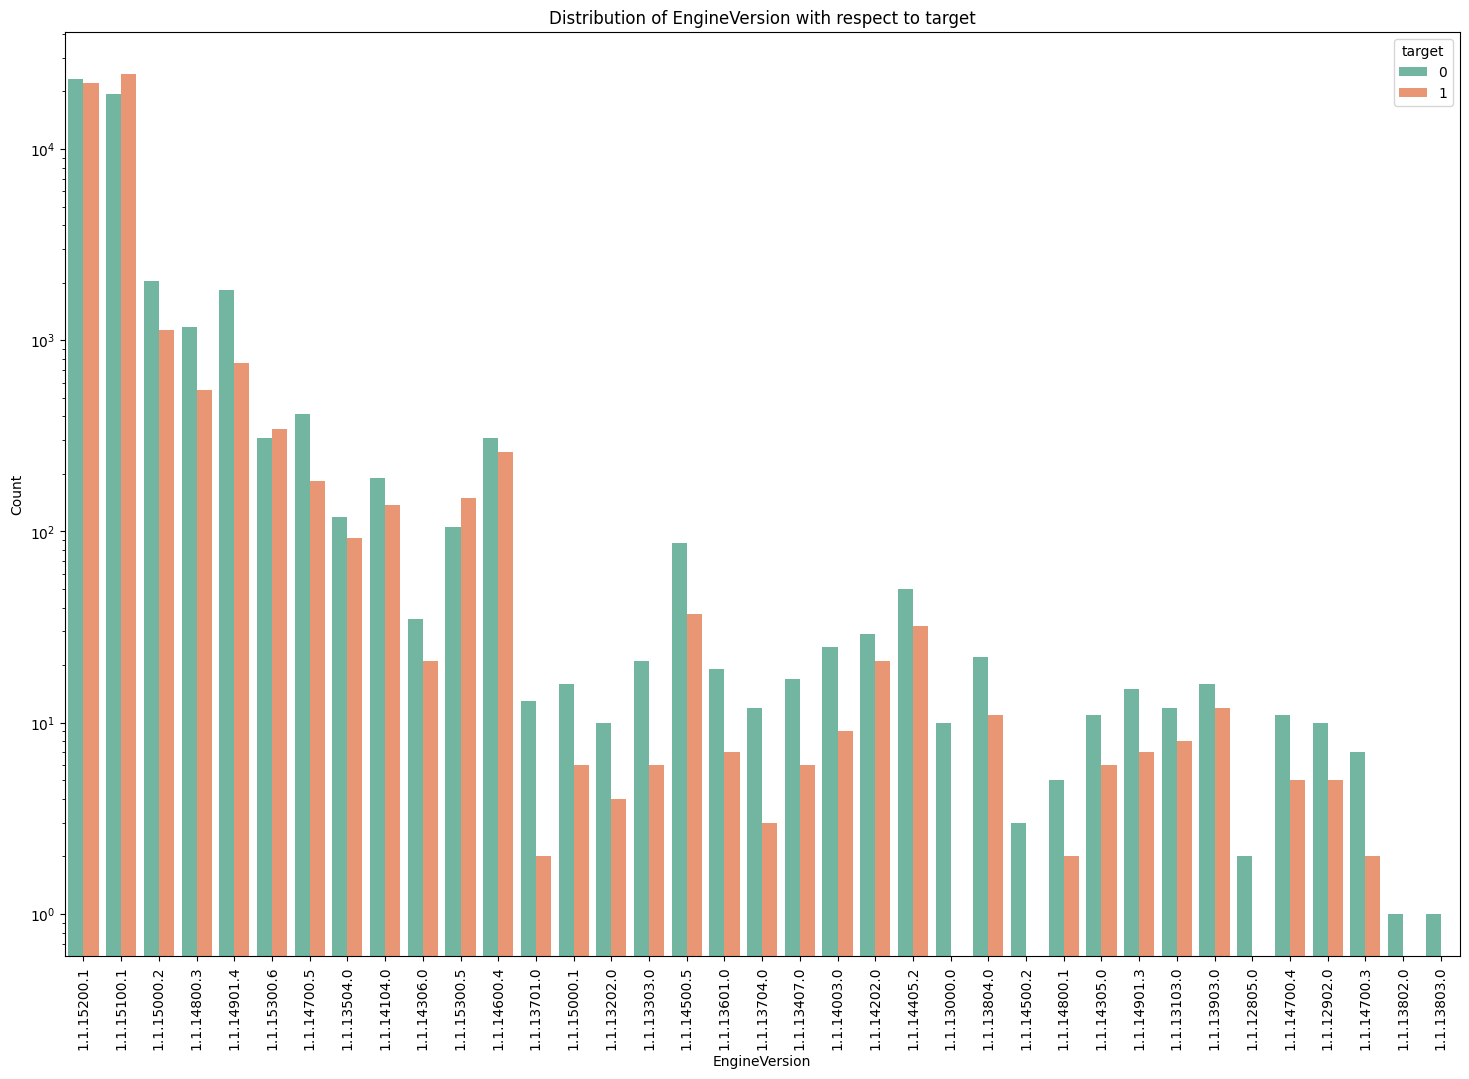

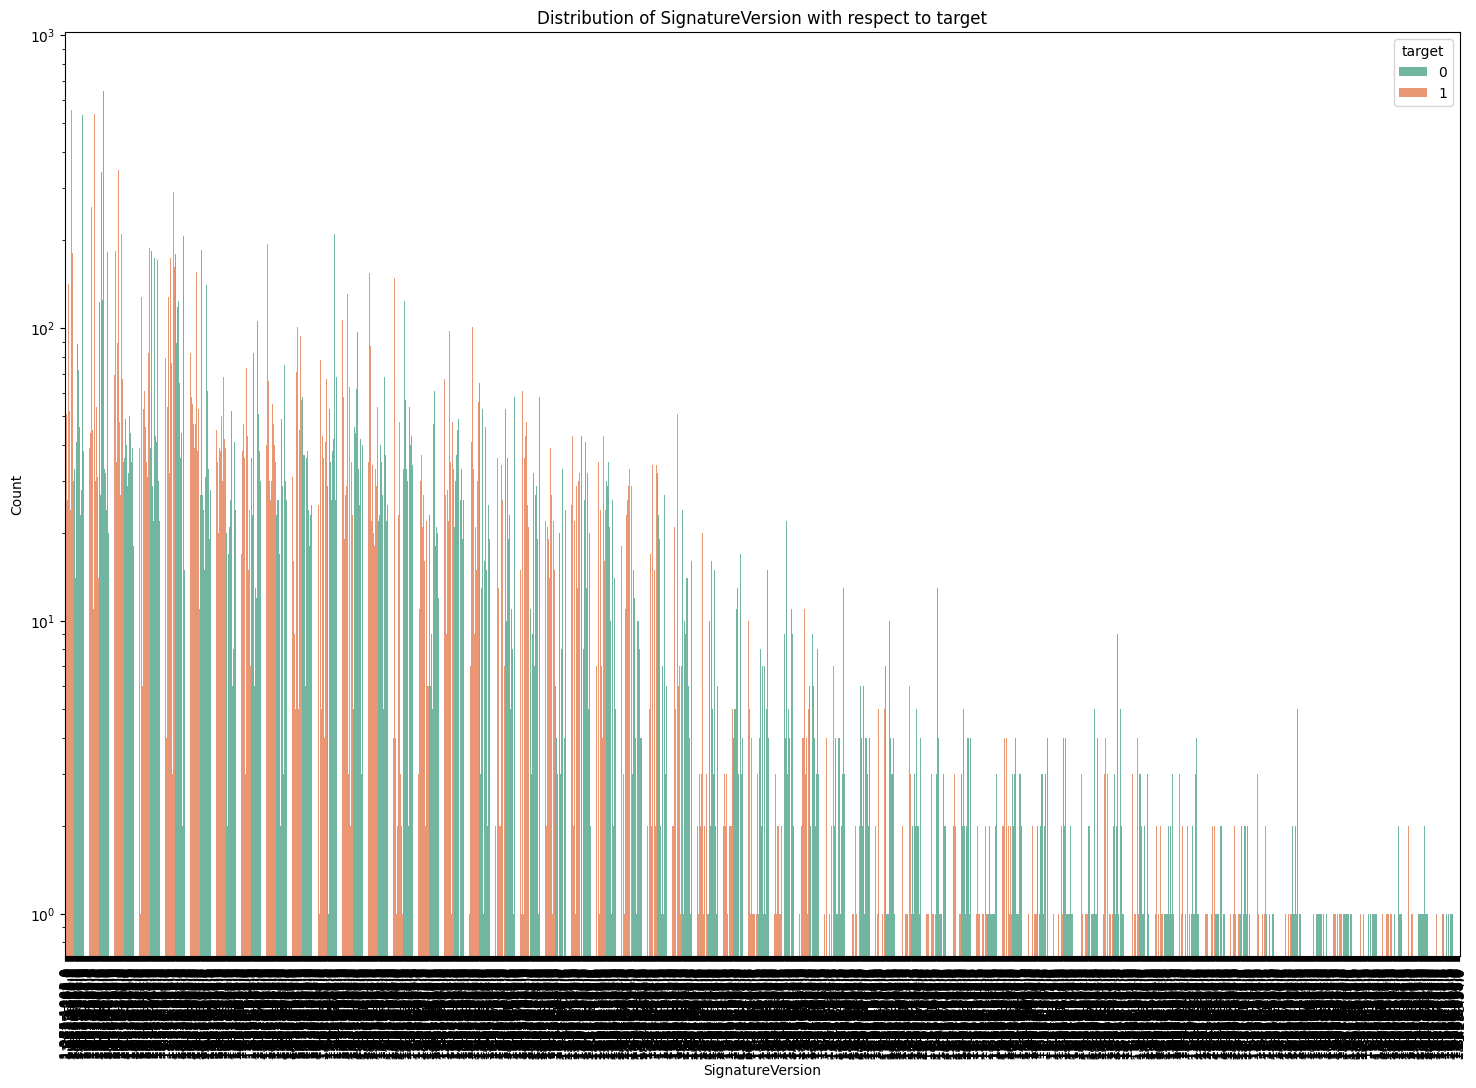

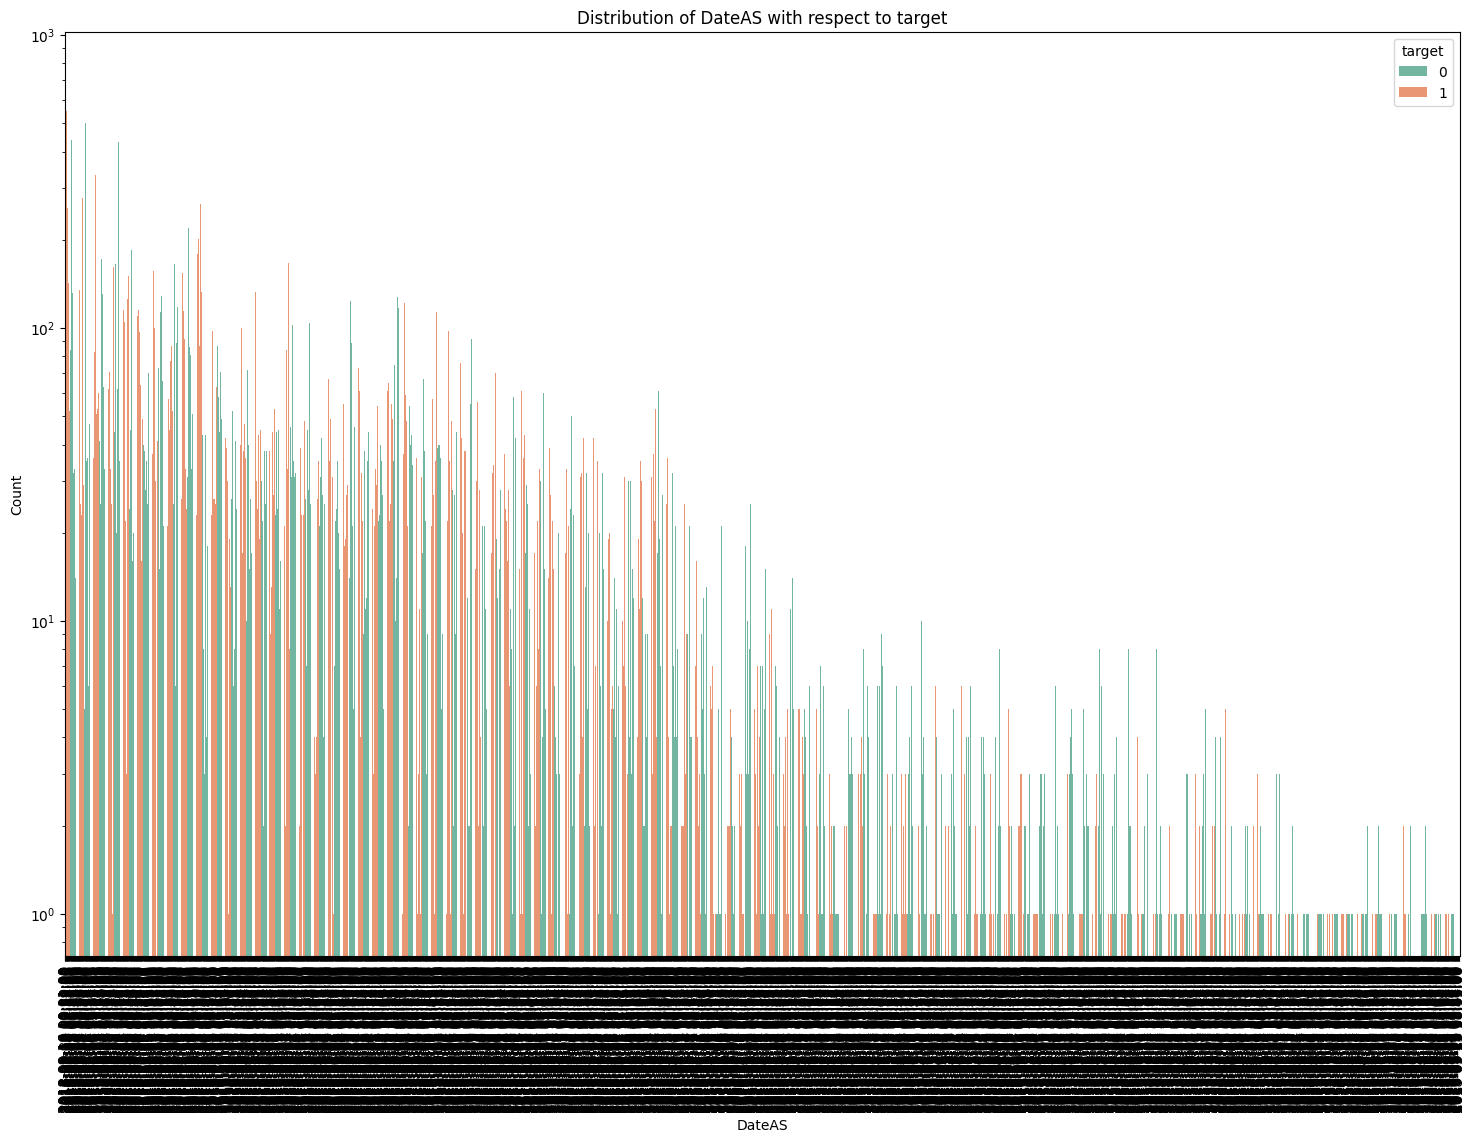

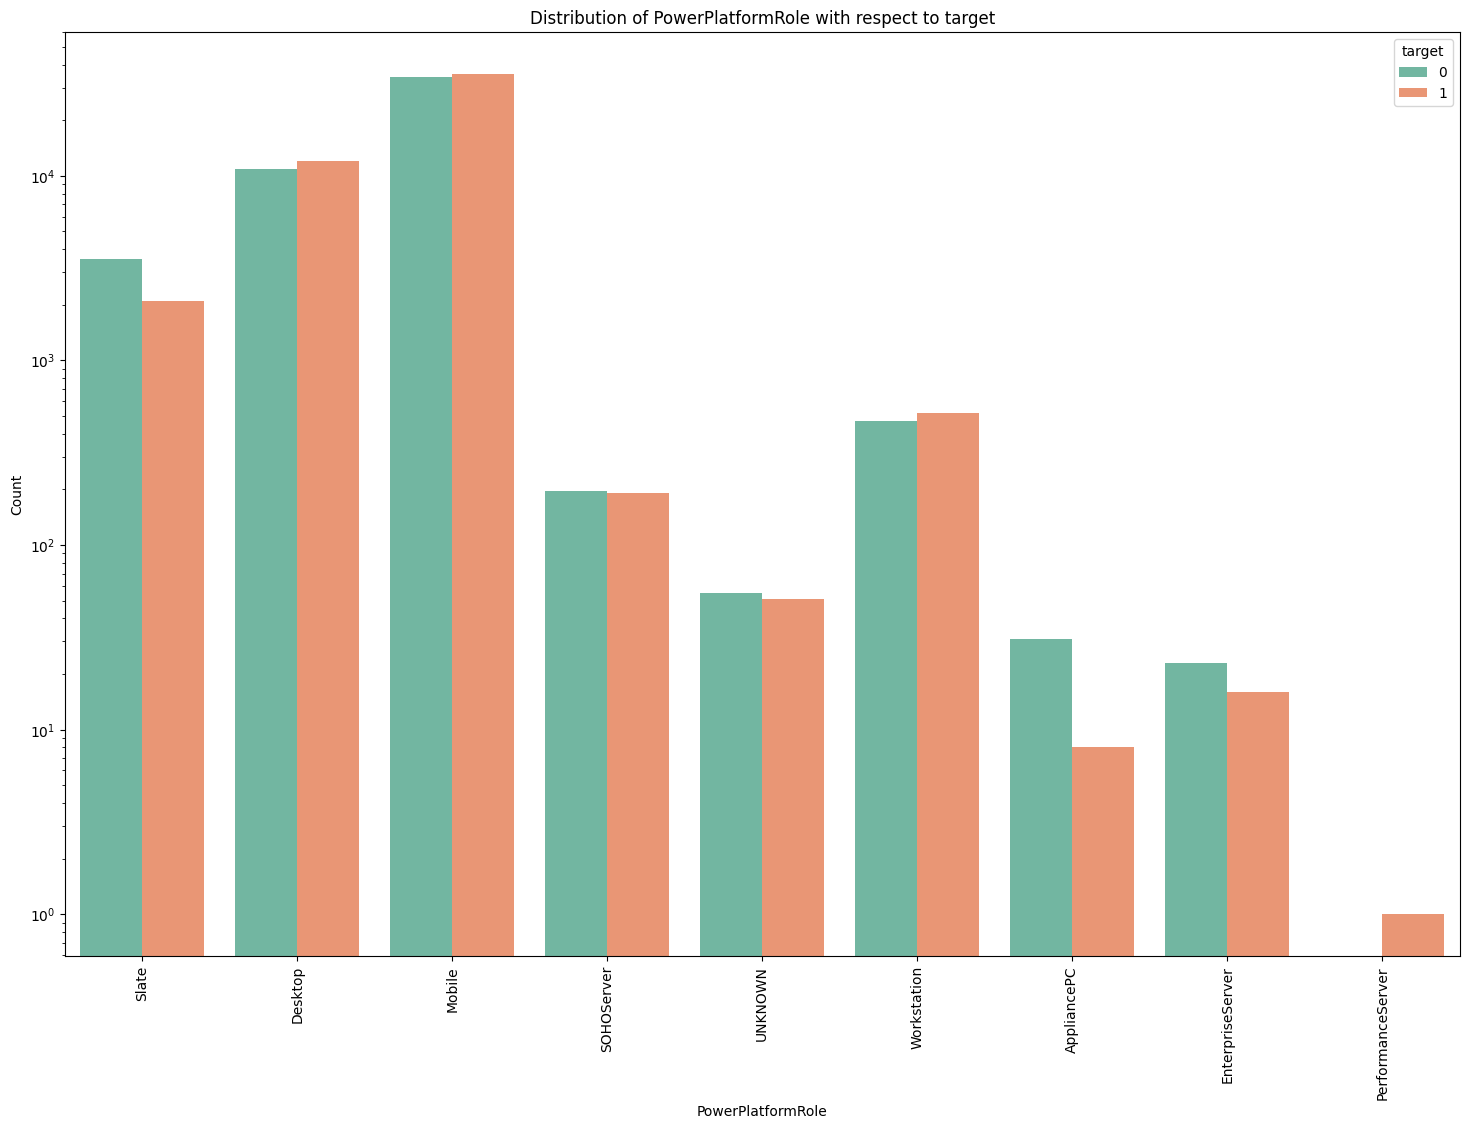

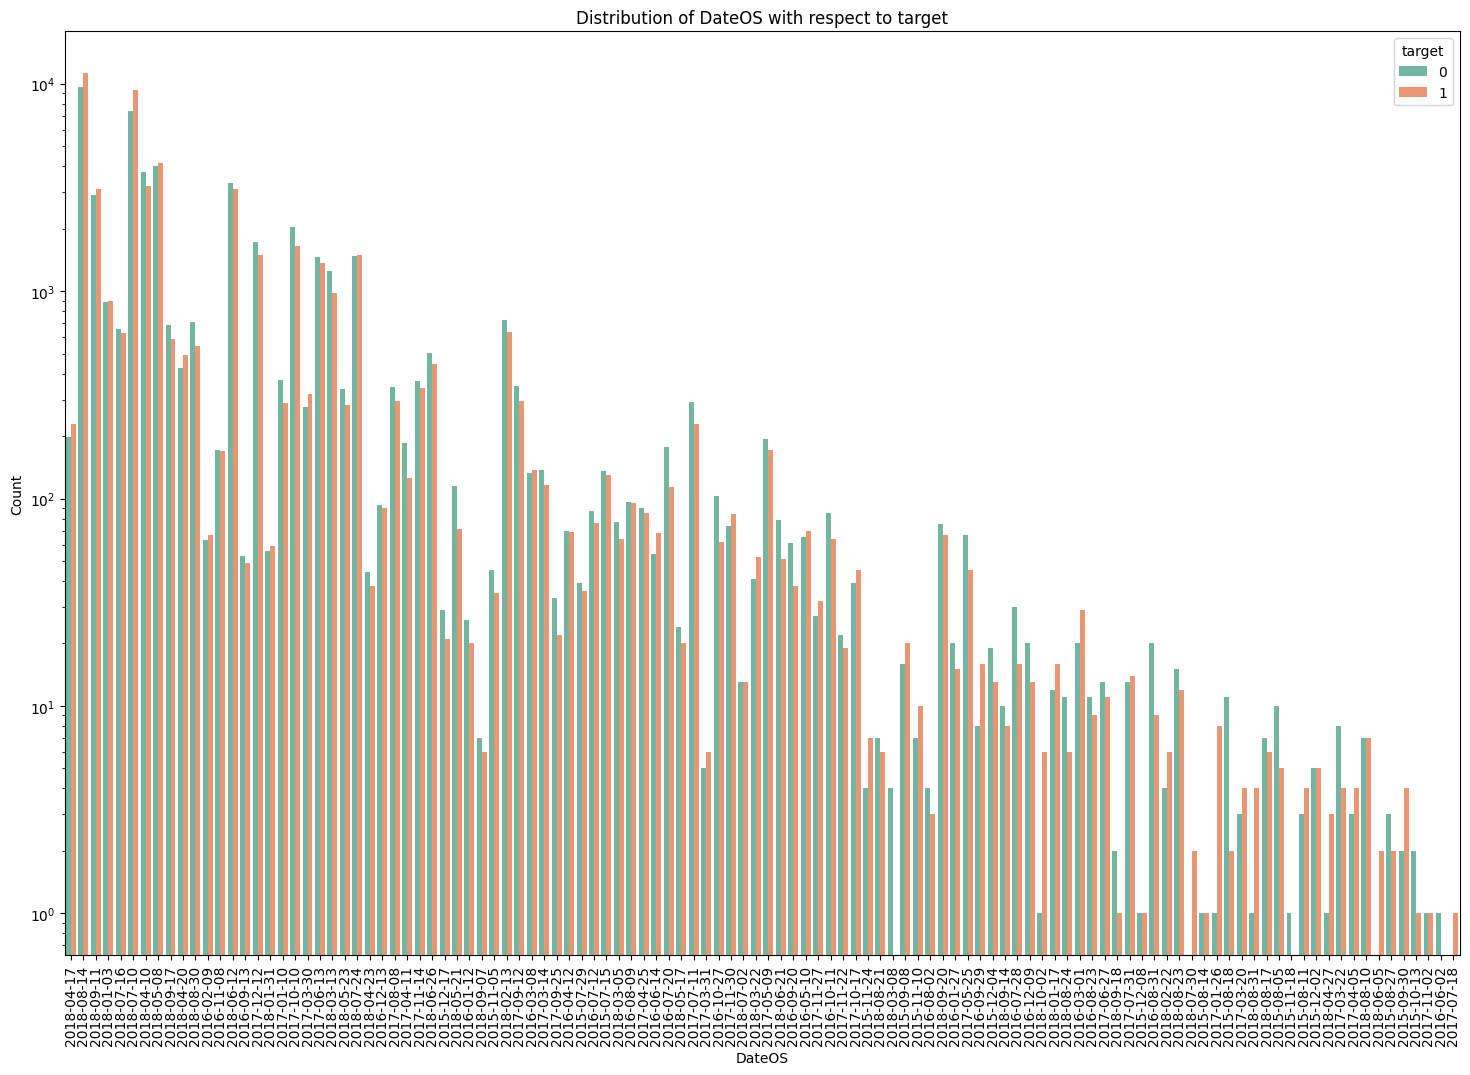

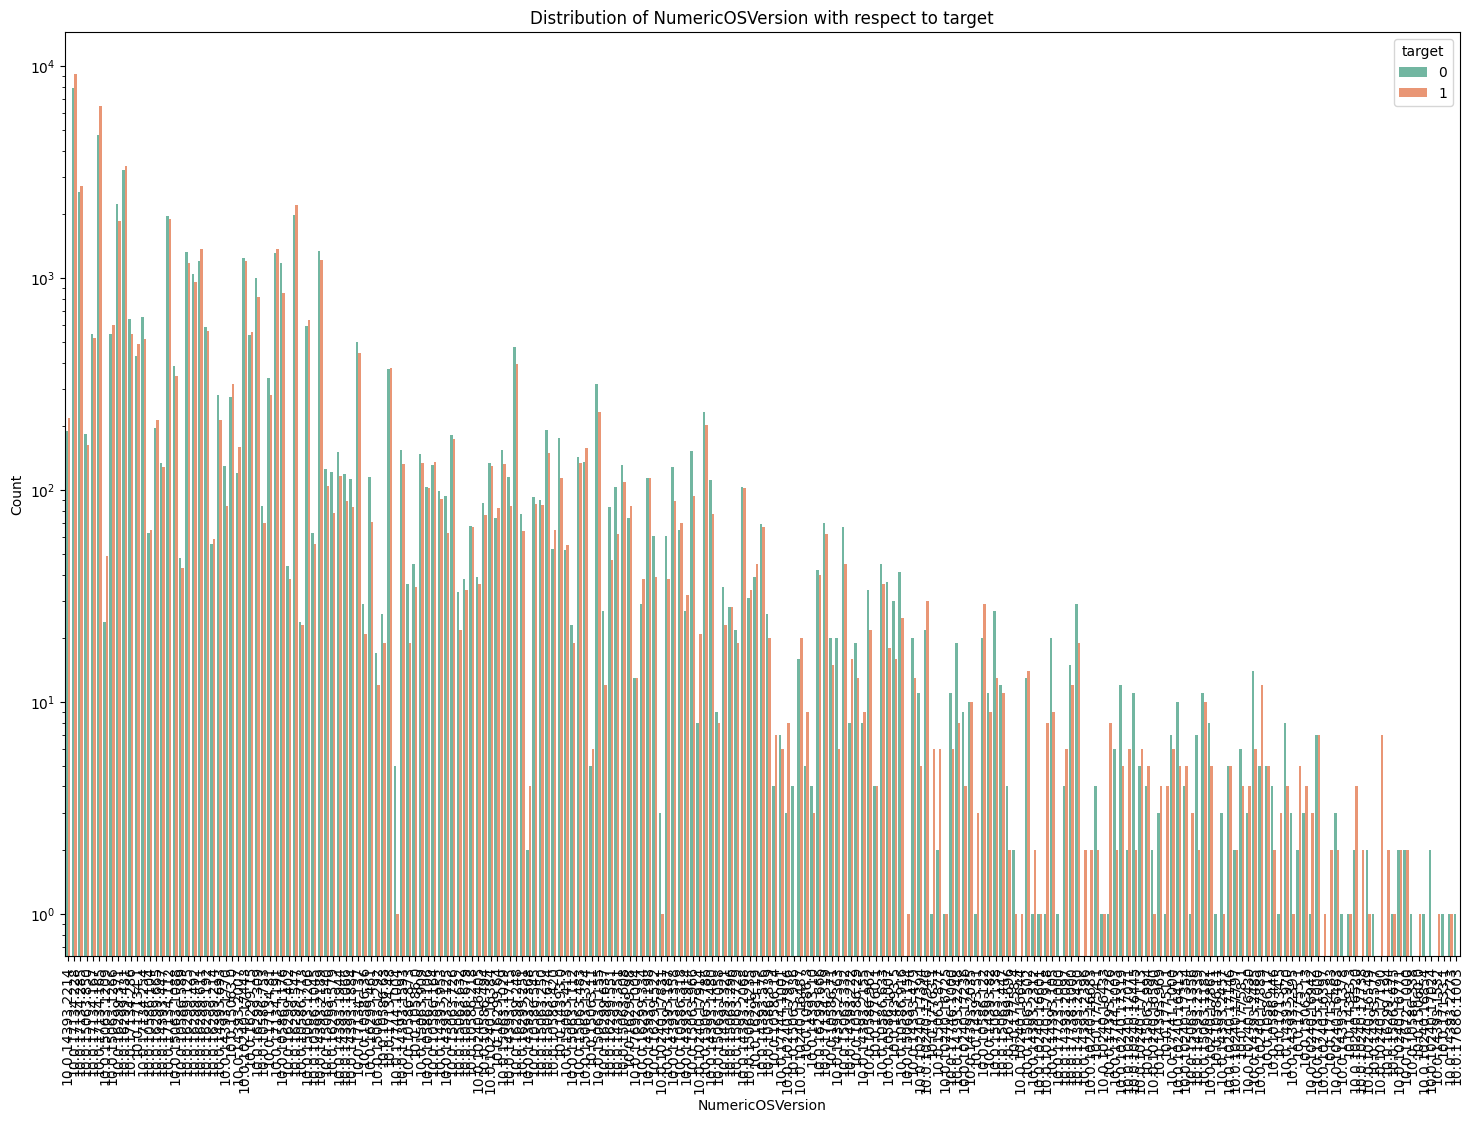

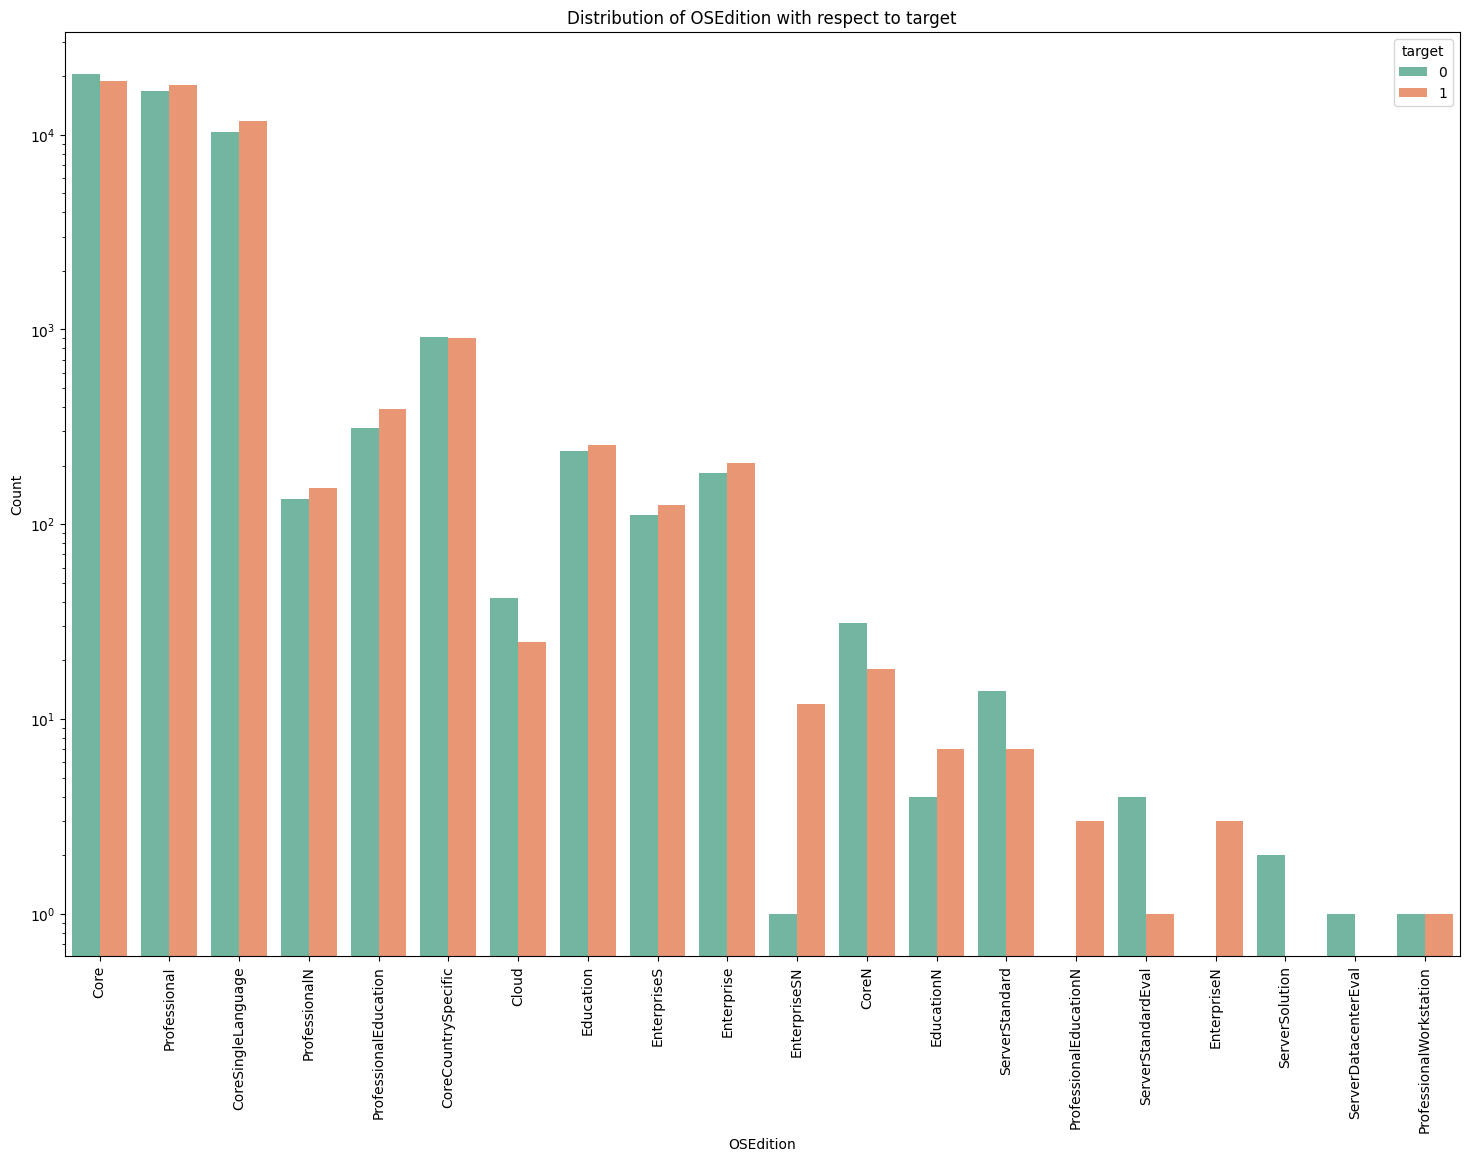

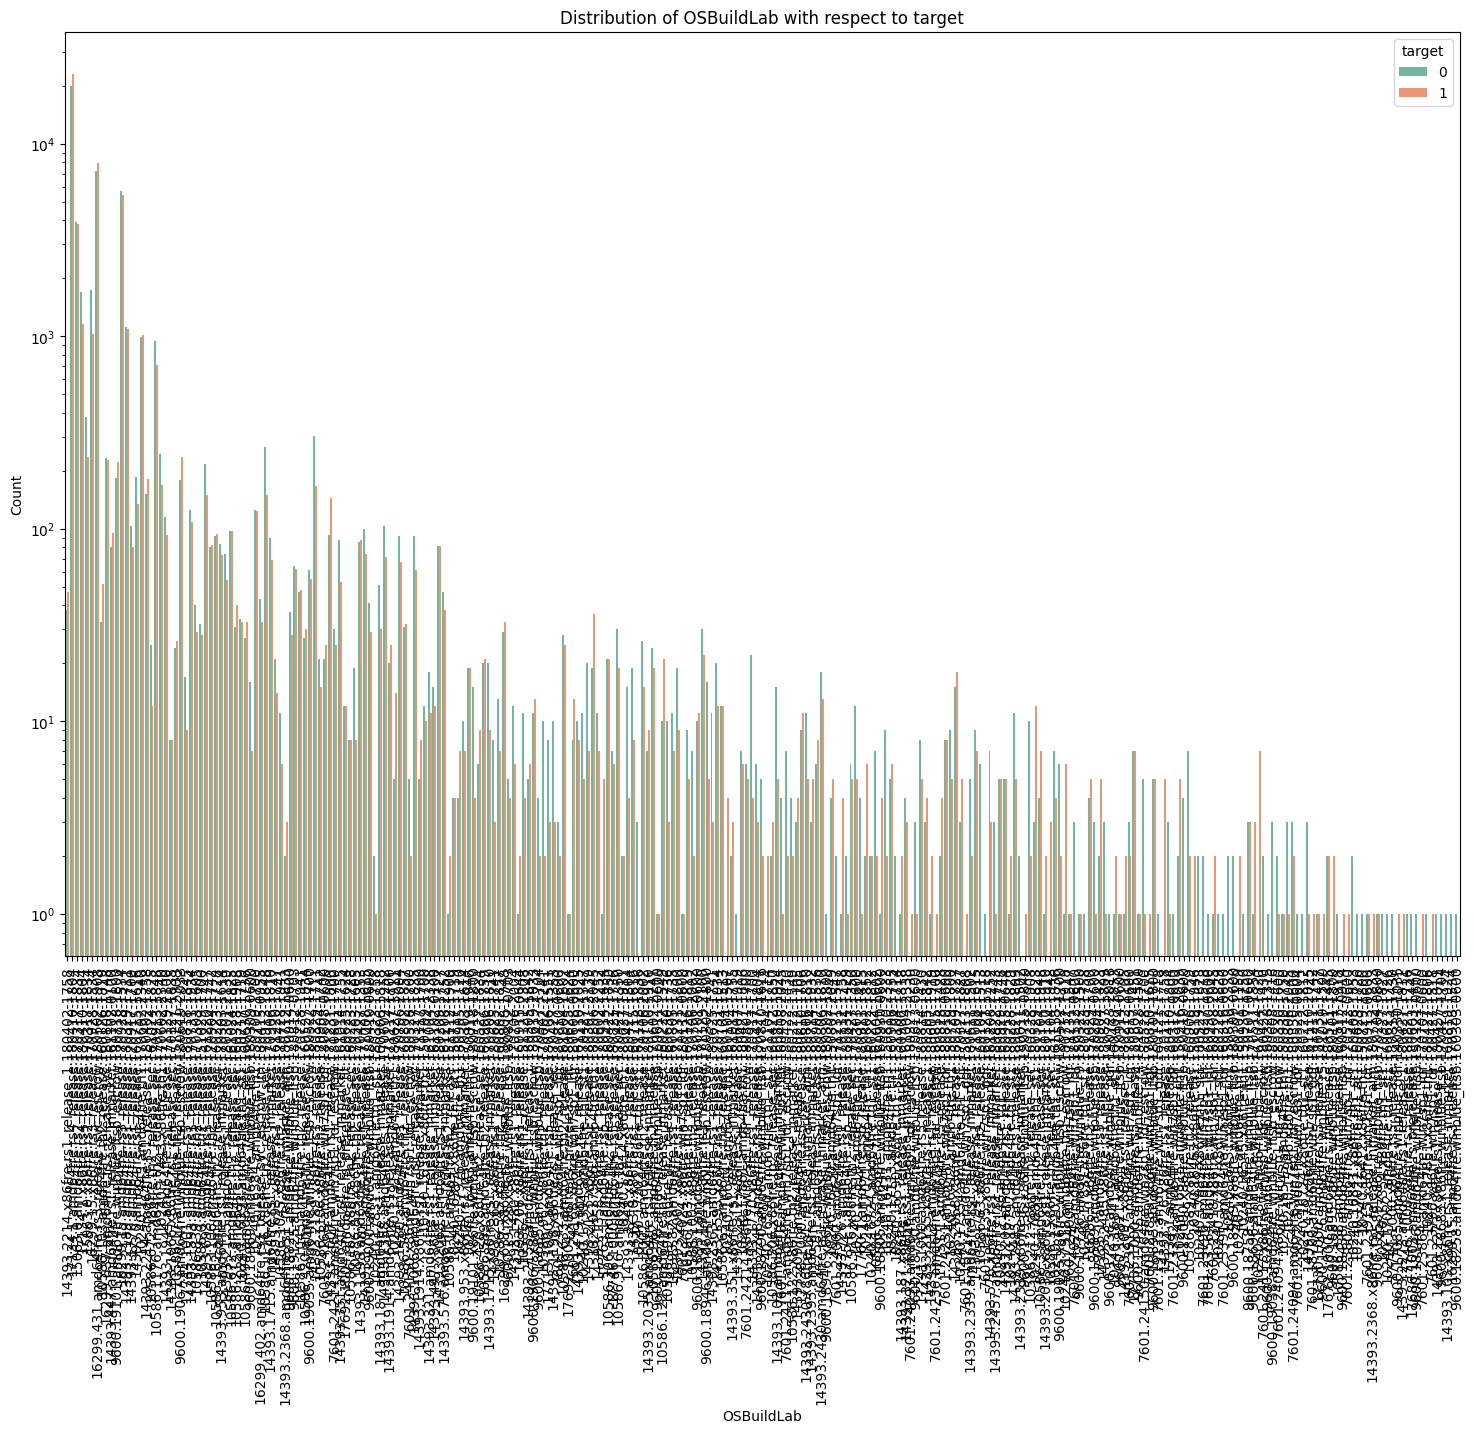

In [32]:
for i in data:
  plt.figure(figsize=(18, 12))
  sns.countplot(x = df_train[f'{i}'], hue = df_train['target'], palette='Set2')
  plt.yscale('log')  
  plt.title(f'Distribution of {i} with respect to {df_train["target"].name}')
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.xlabel(f'{i}')
  plt.legend(title='target', loc='upper right')
  plt.show()

- **From the above visualizations if we observe carefully, as the Number of Antivirus Products Installed increases, the detection of malware in that system goes down.**

- **Also, if a system has a gaming application then the detection of malware in that system might increase.**

- **Among the three processors, X86 and arm64 are better than the X64, because there is a high chance of detection of malware in that system if the processor is X64.**

- **If the OS Architecture is built by X86 and arm64 then there is a less chance of threat in the system to be affected by malware.
But there is a chance of being affected by malware if it is built by amd64.**

- **If "IsTouchEnabled" is enabled then there is a less chance that the system get affected by malware.**

<ipython-input-33-fa3a0bad8851>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


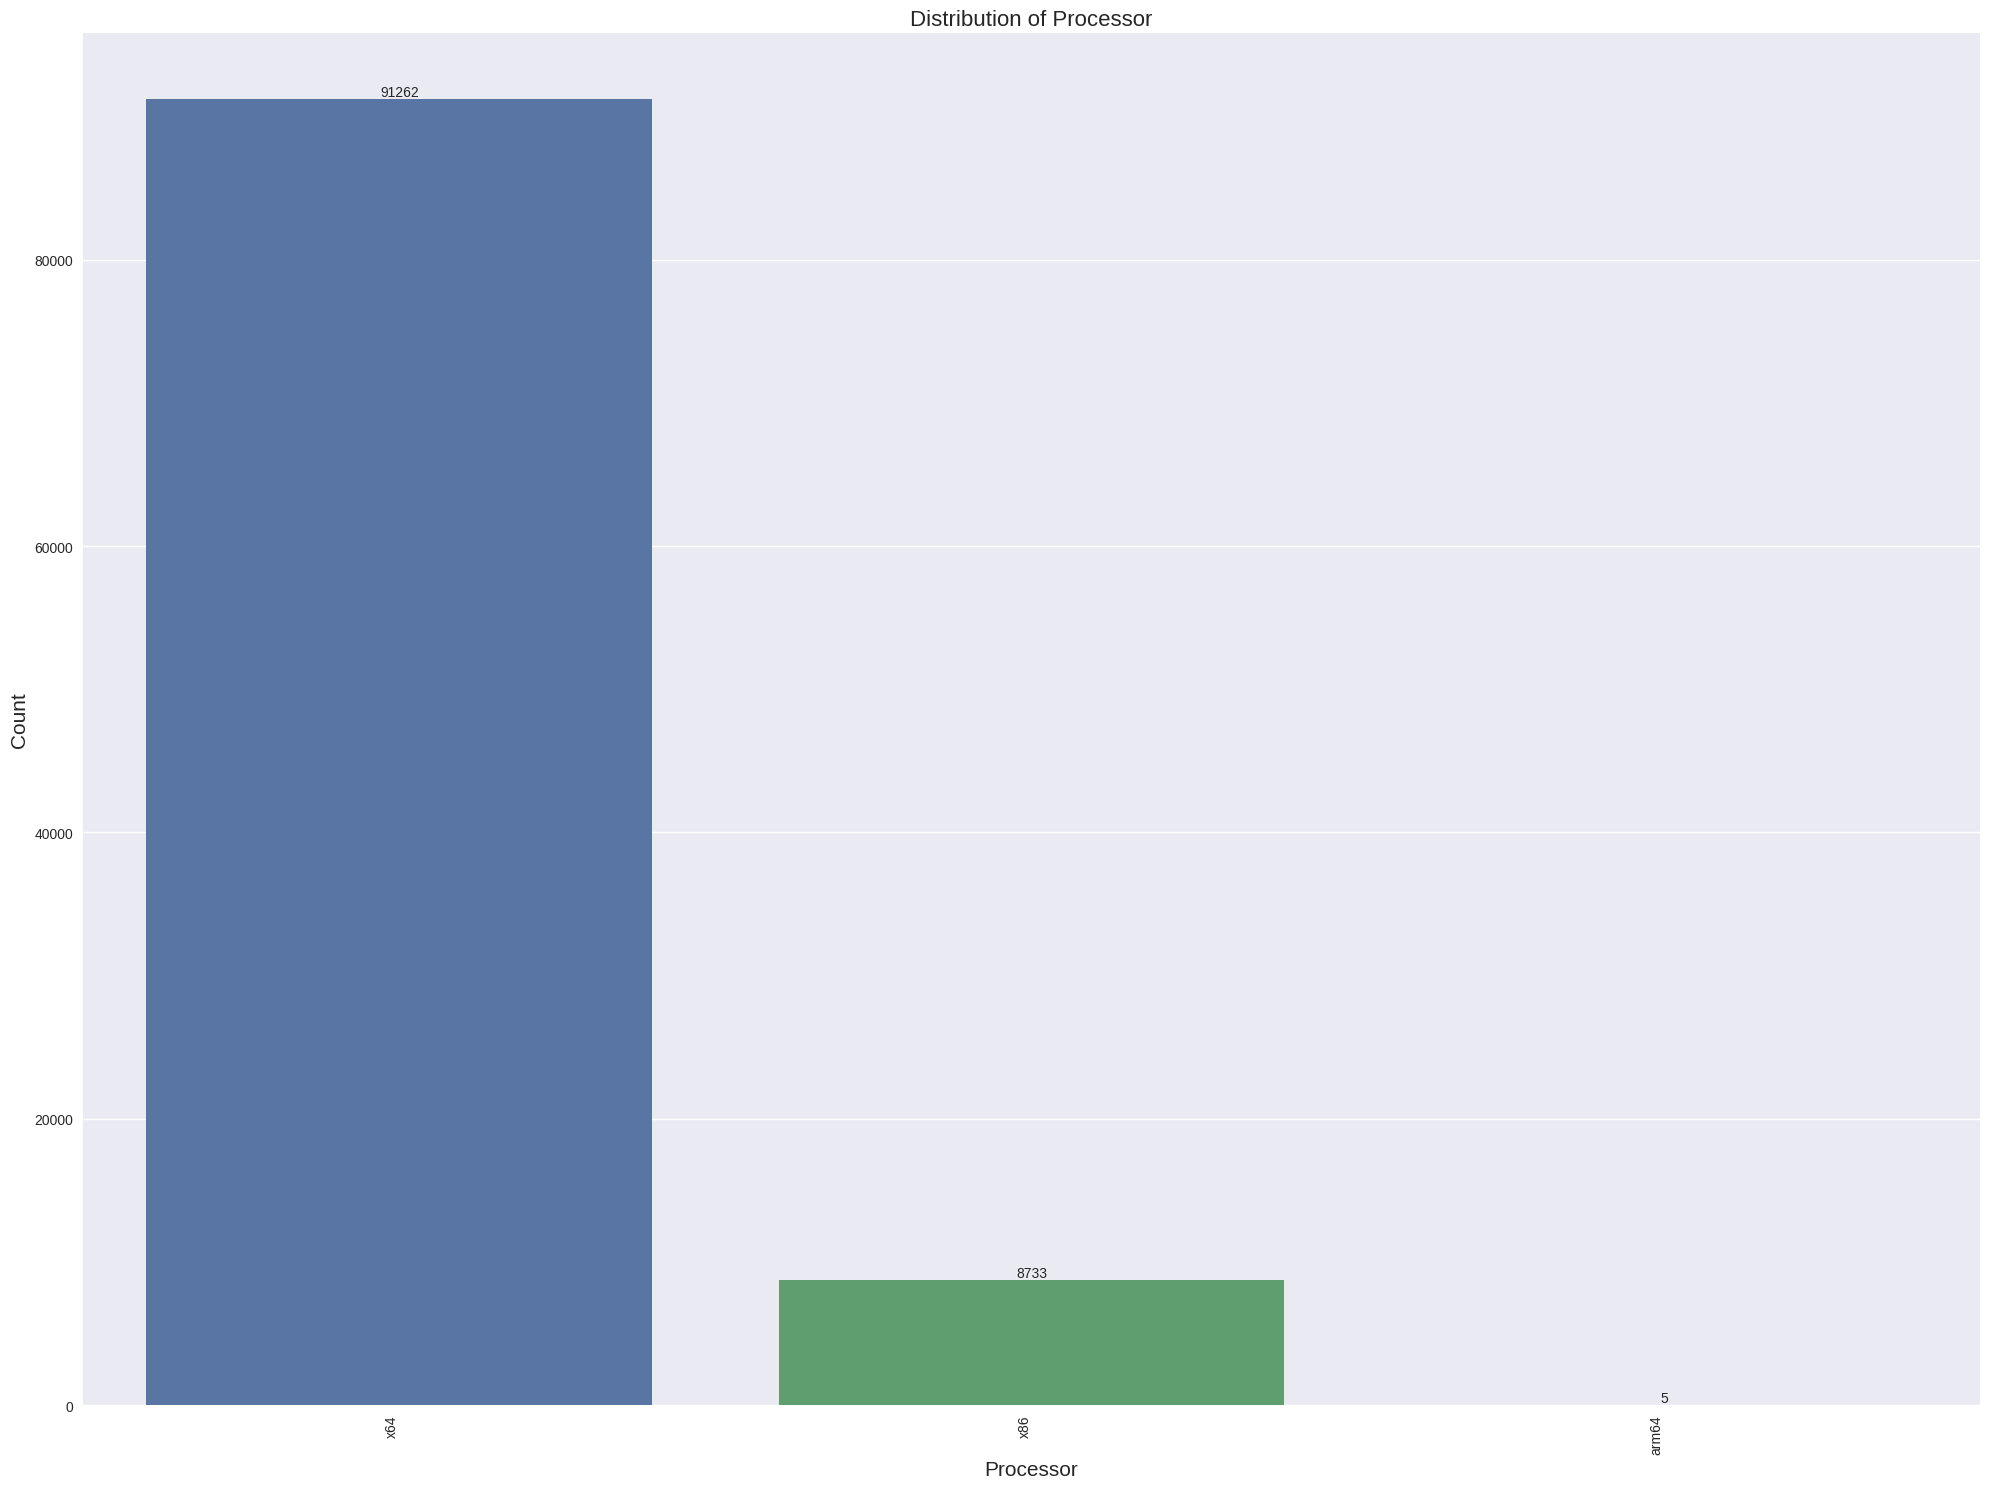

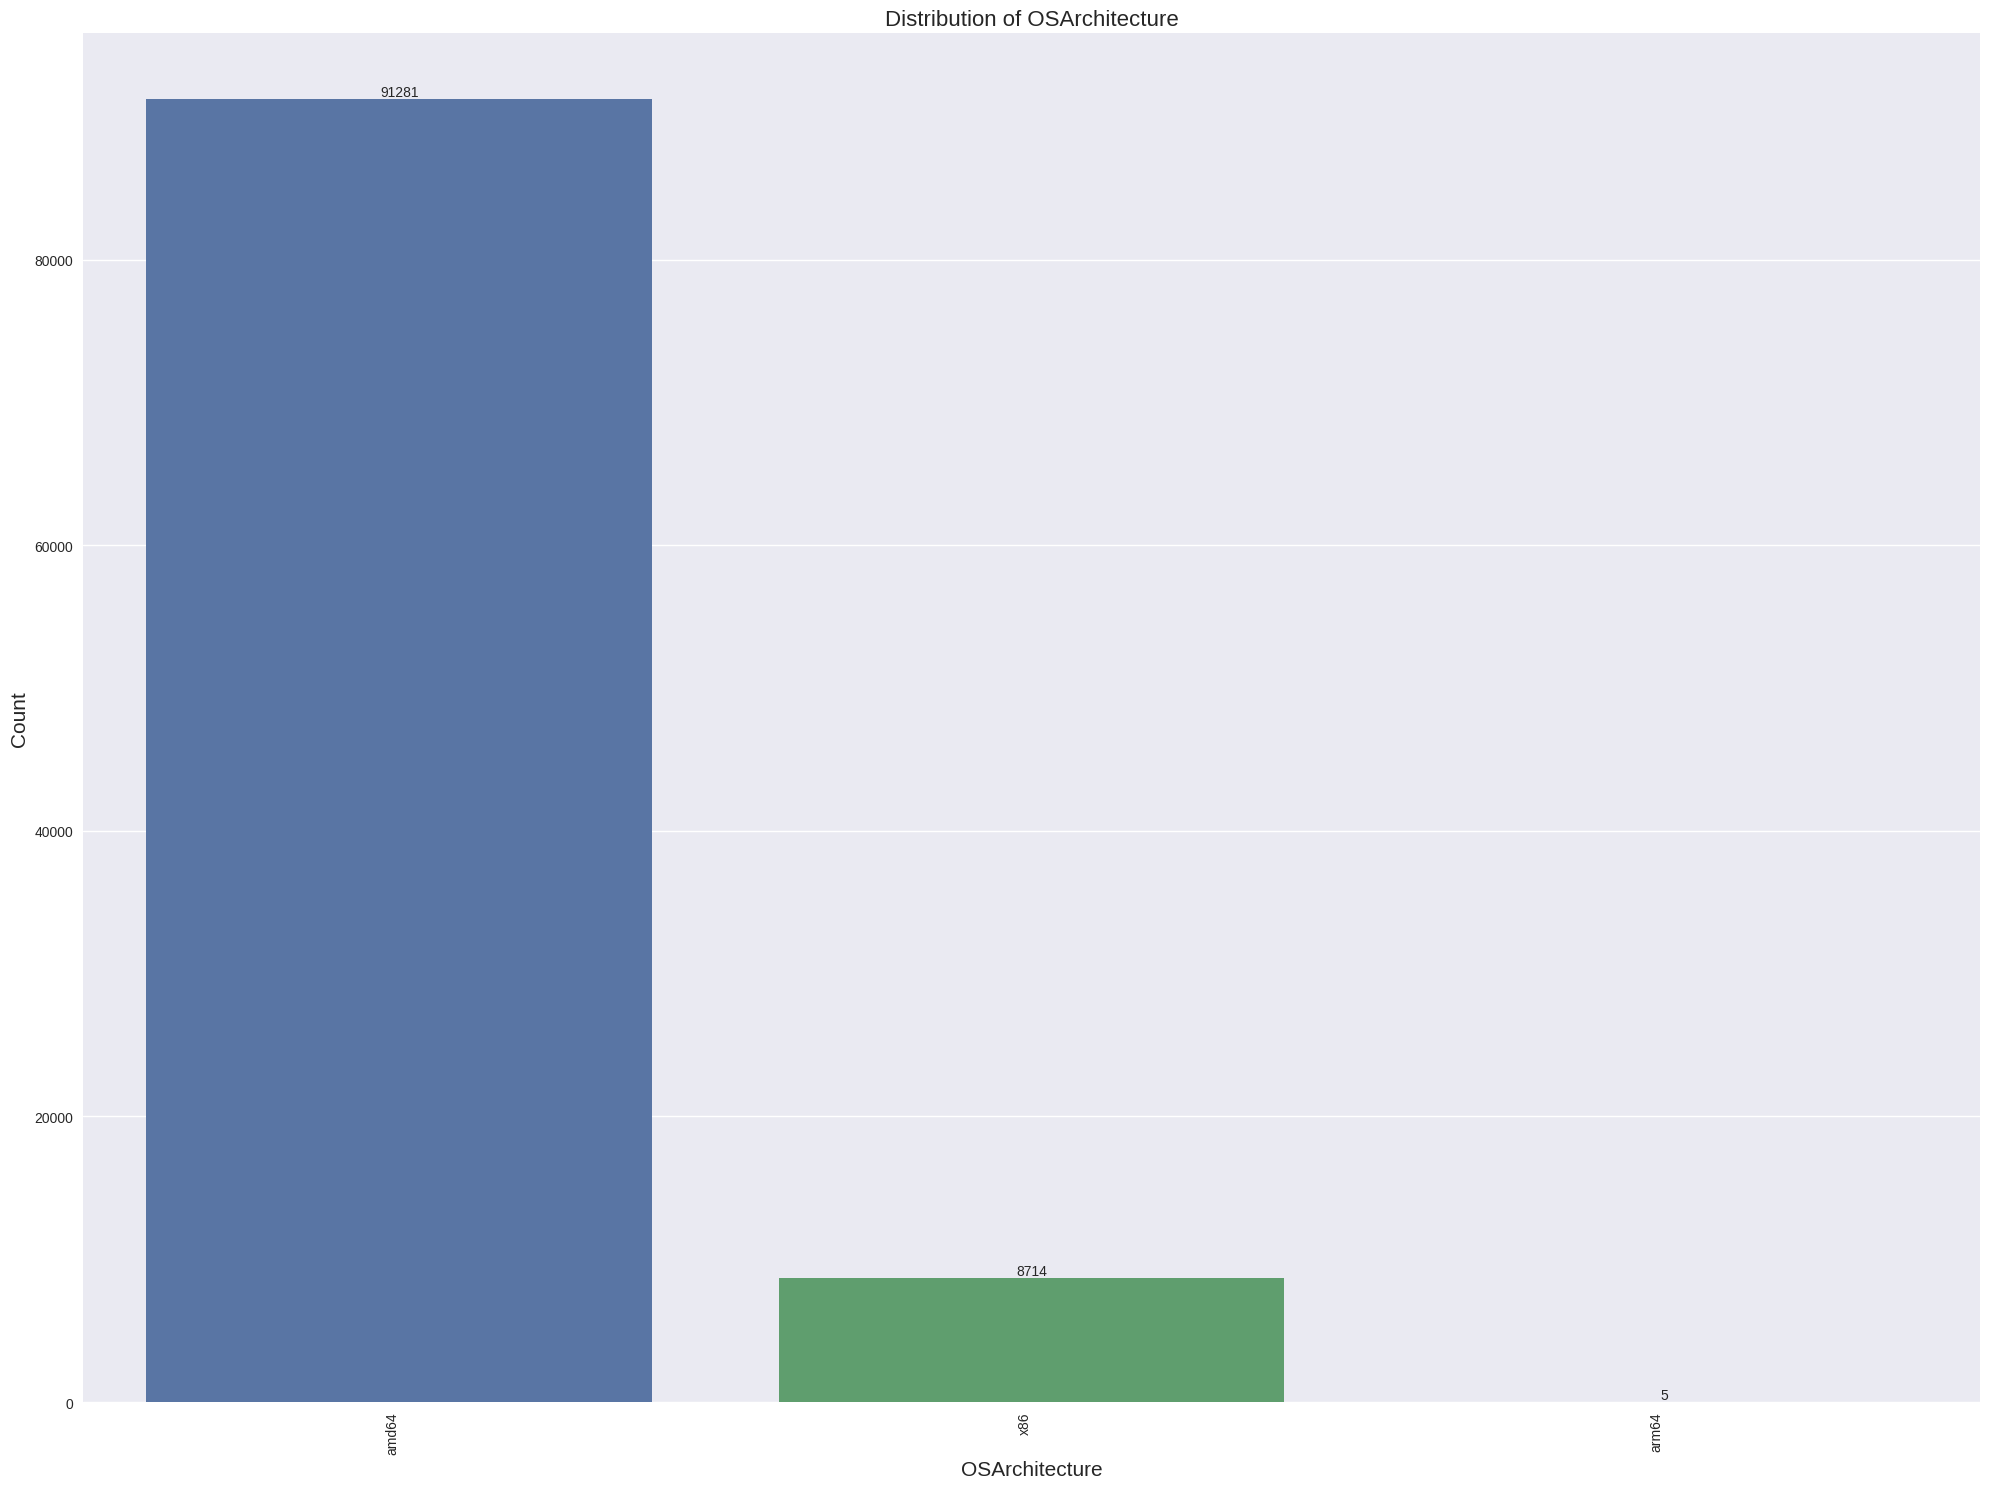

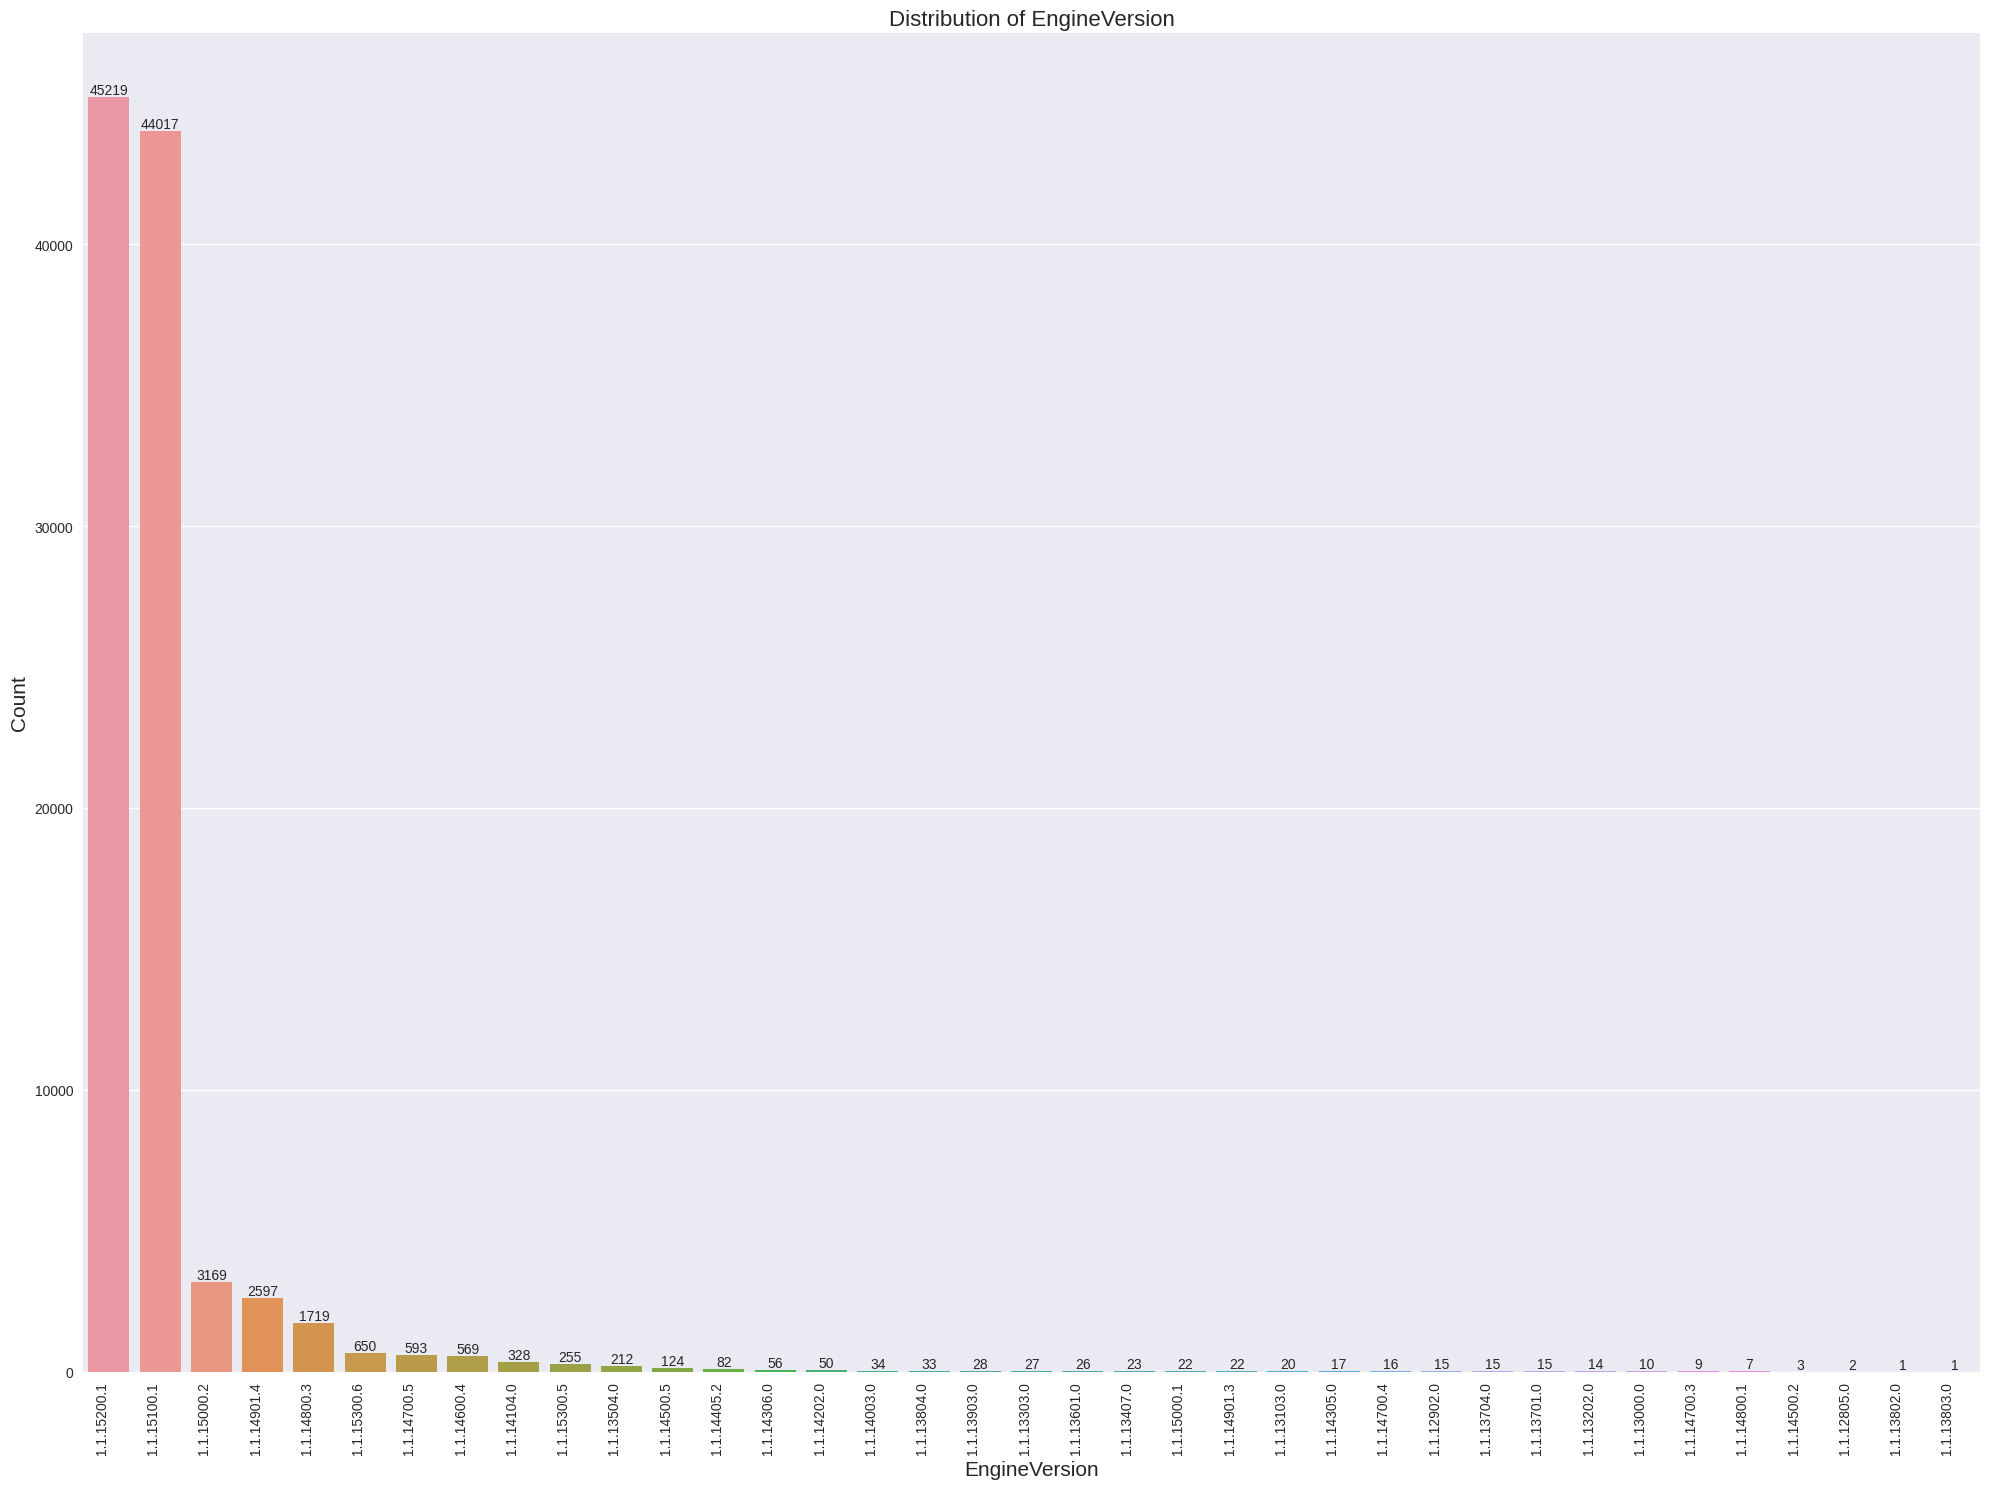

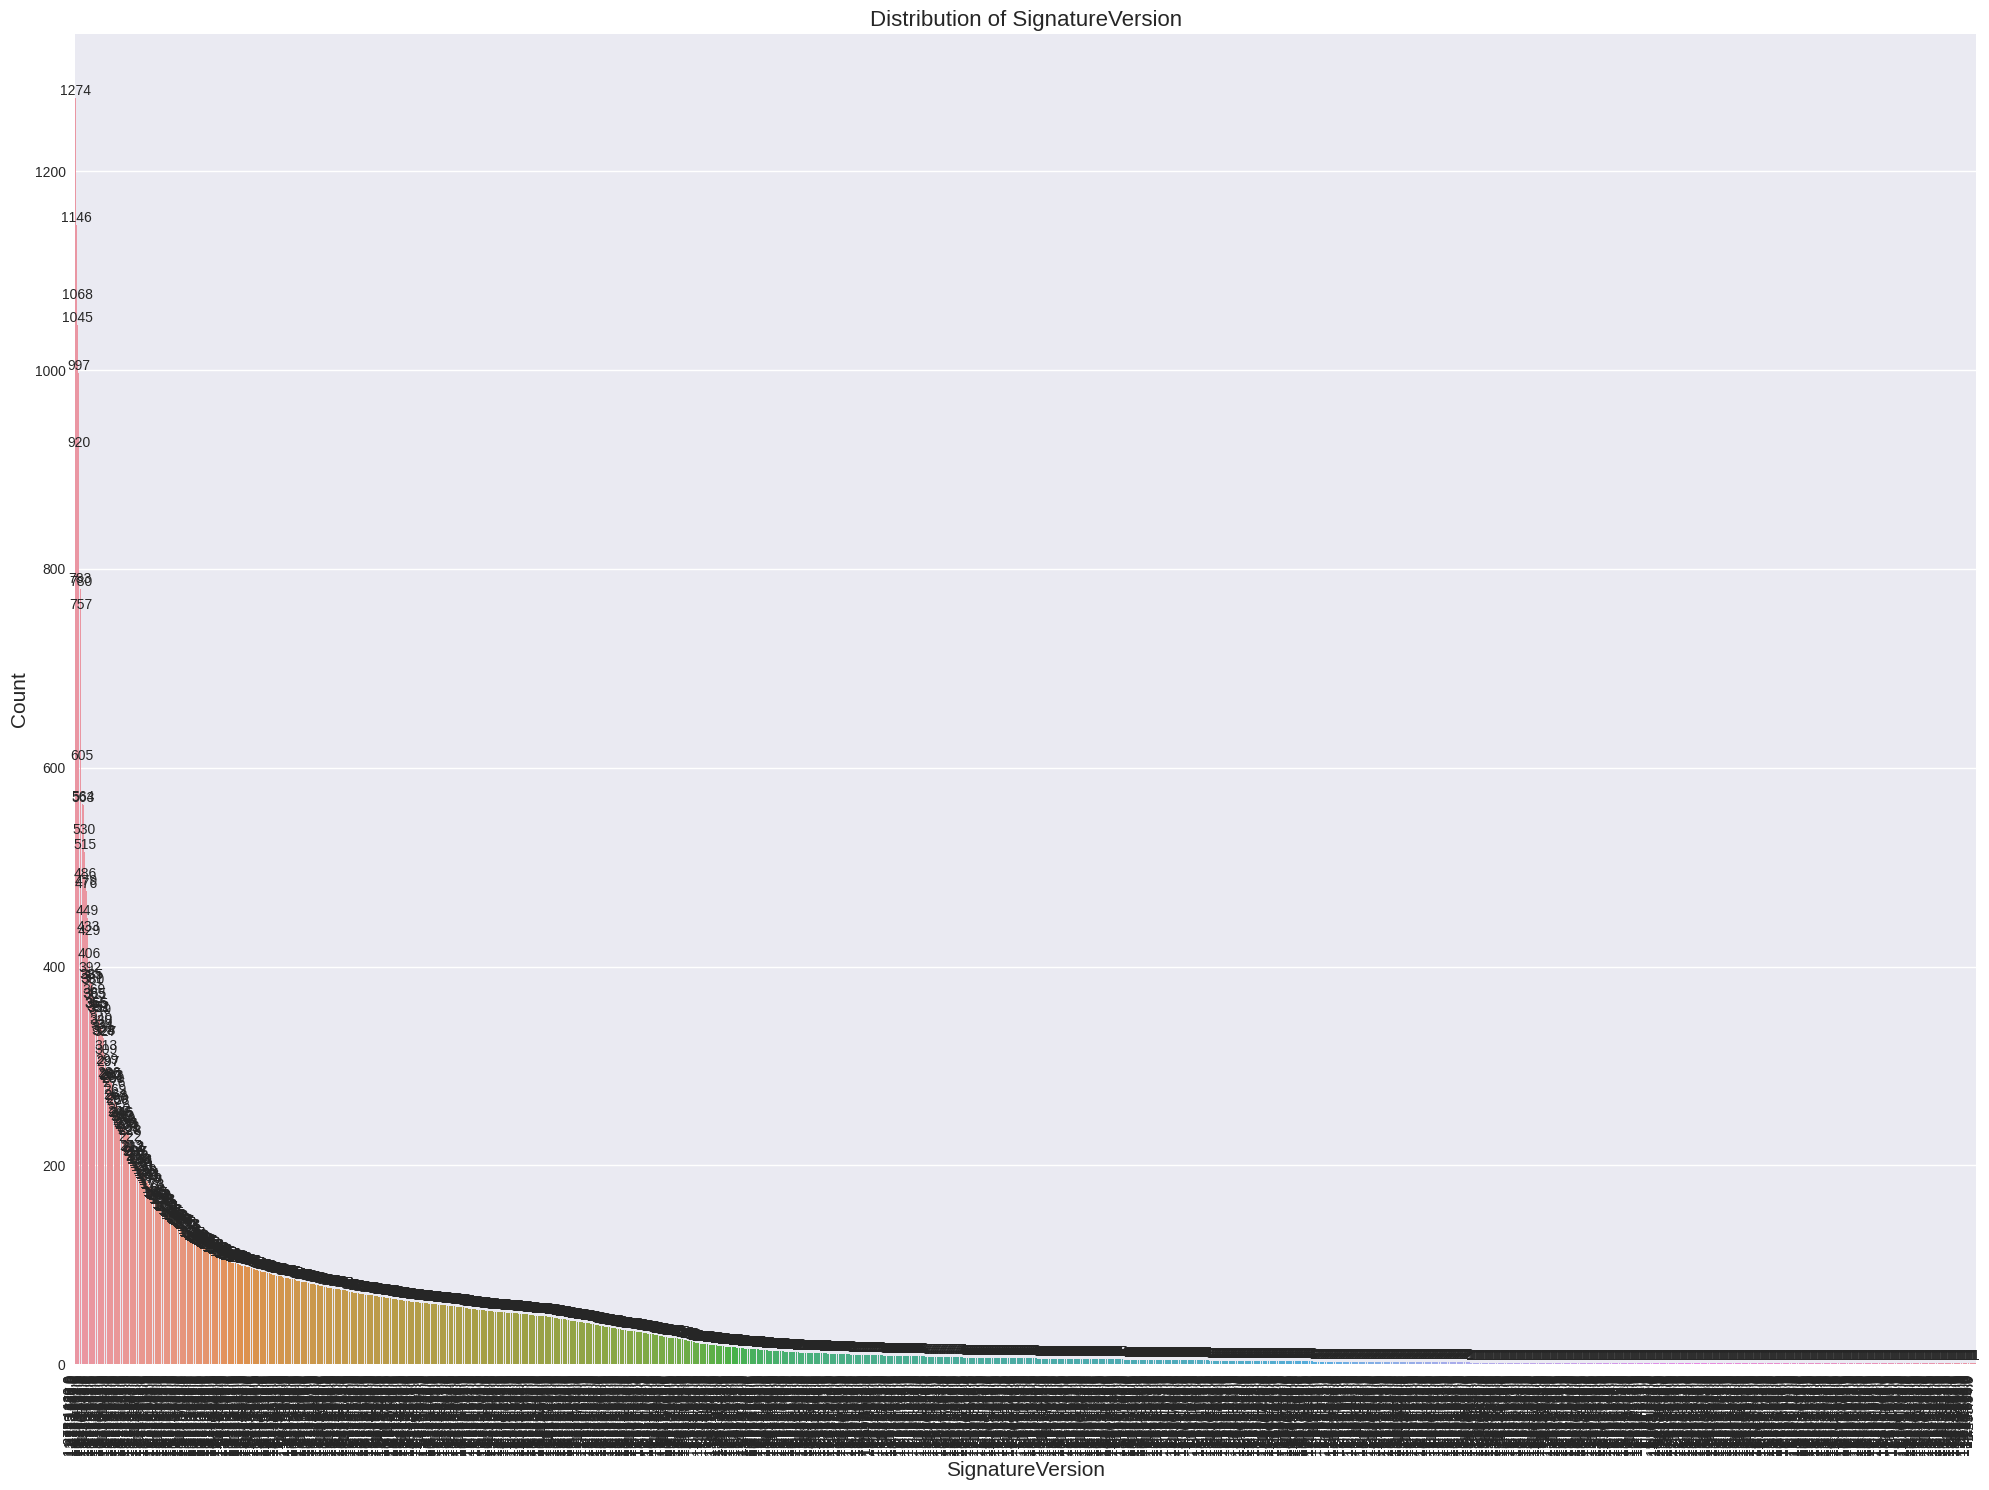

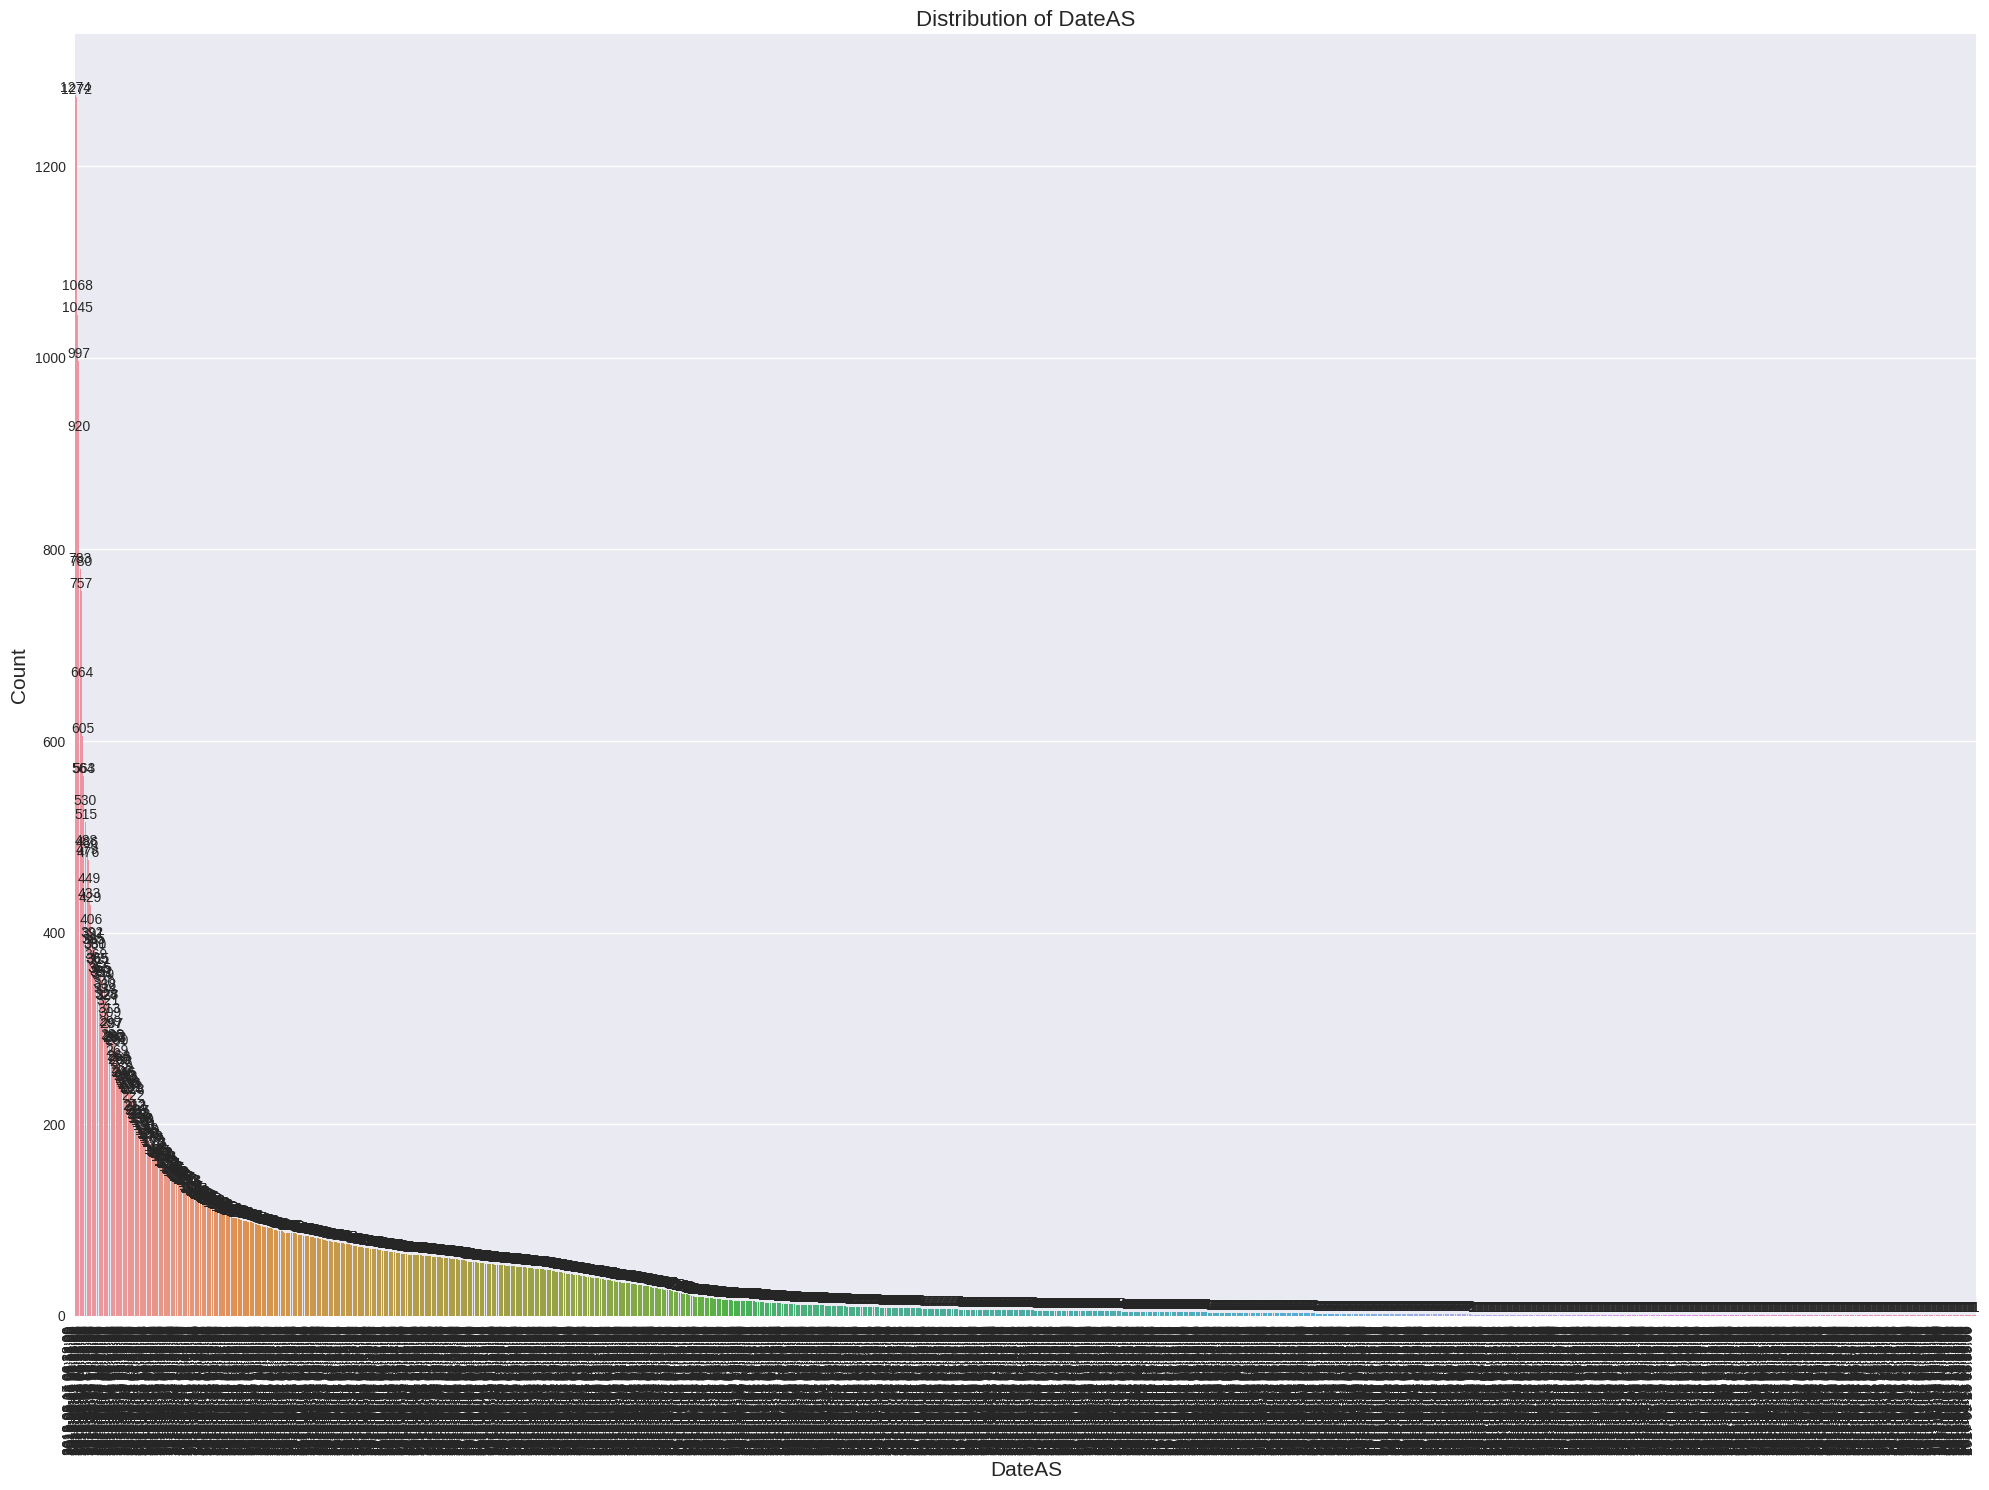

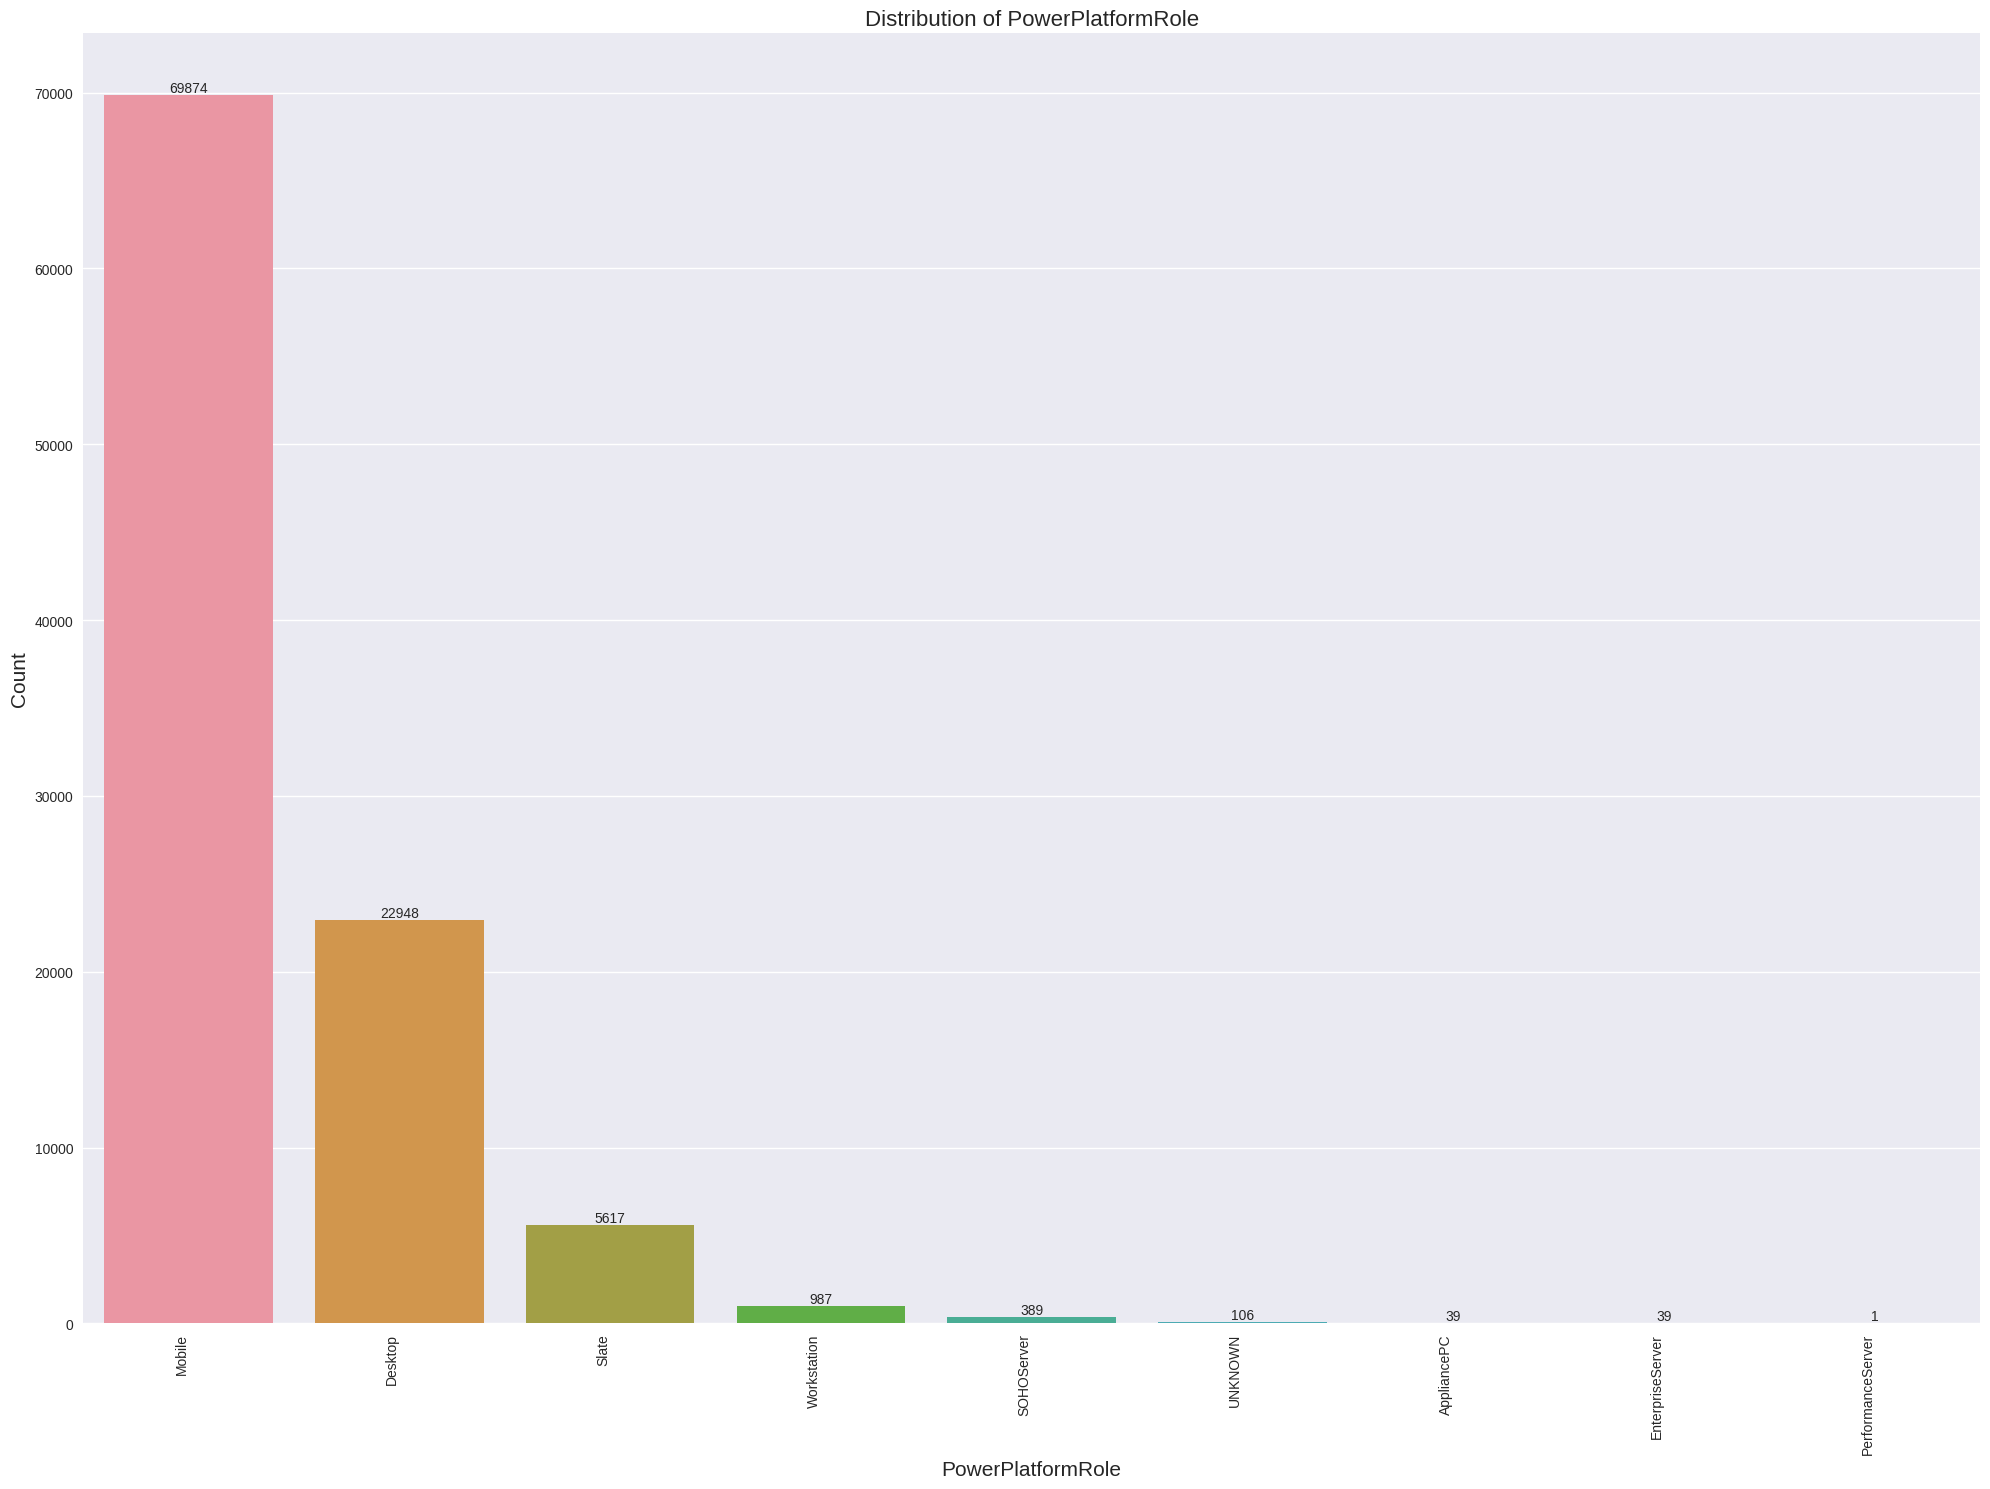

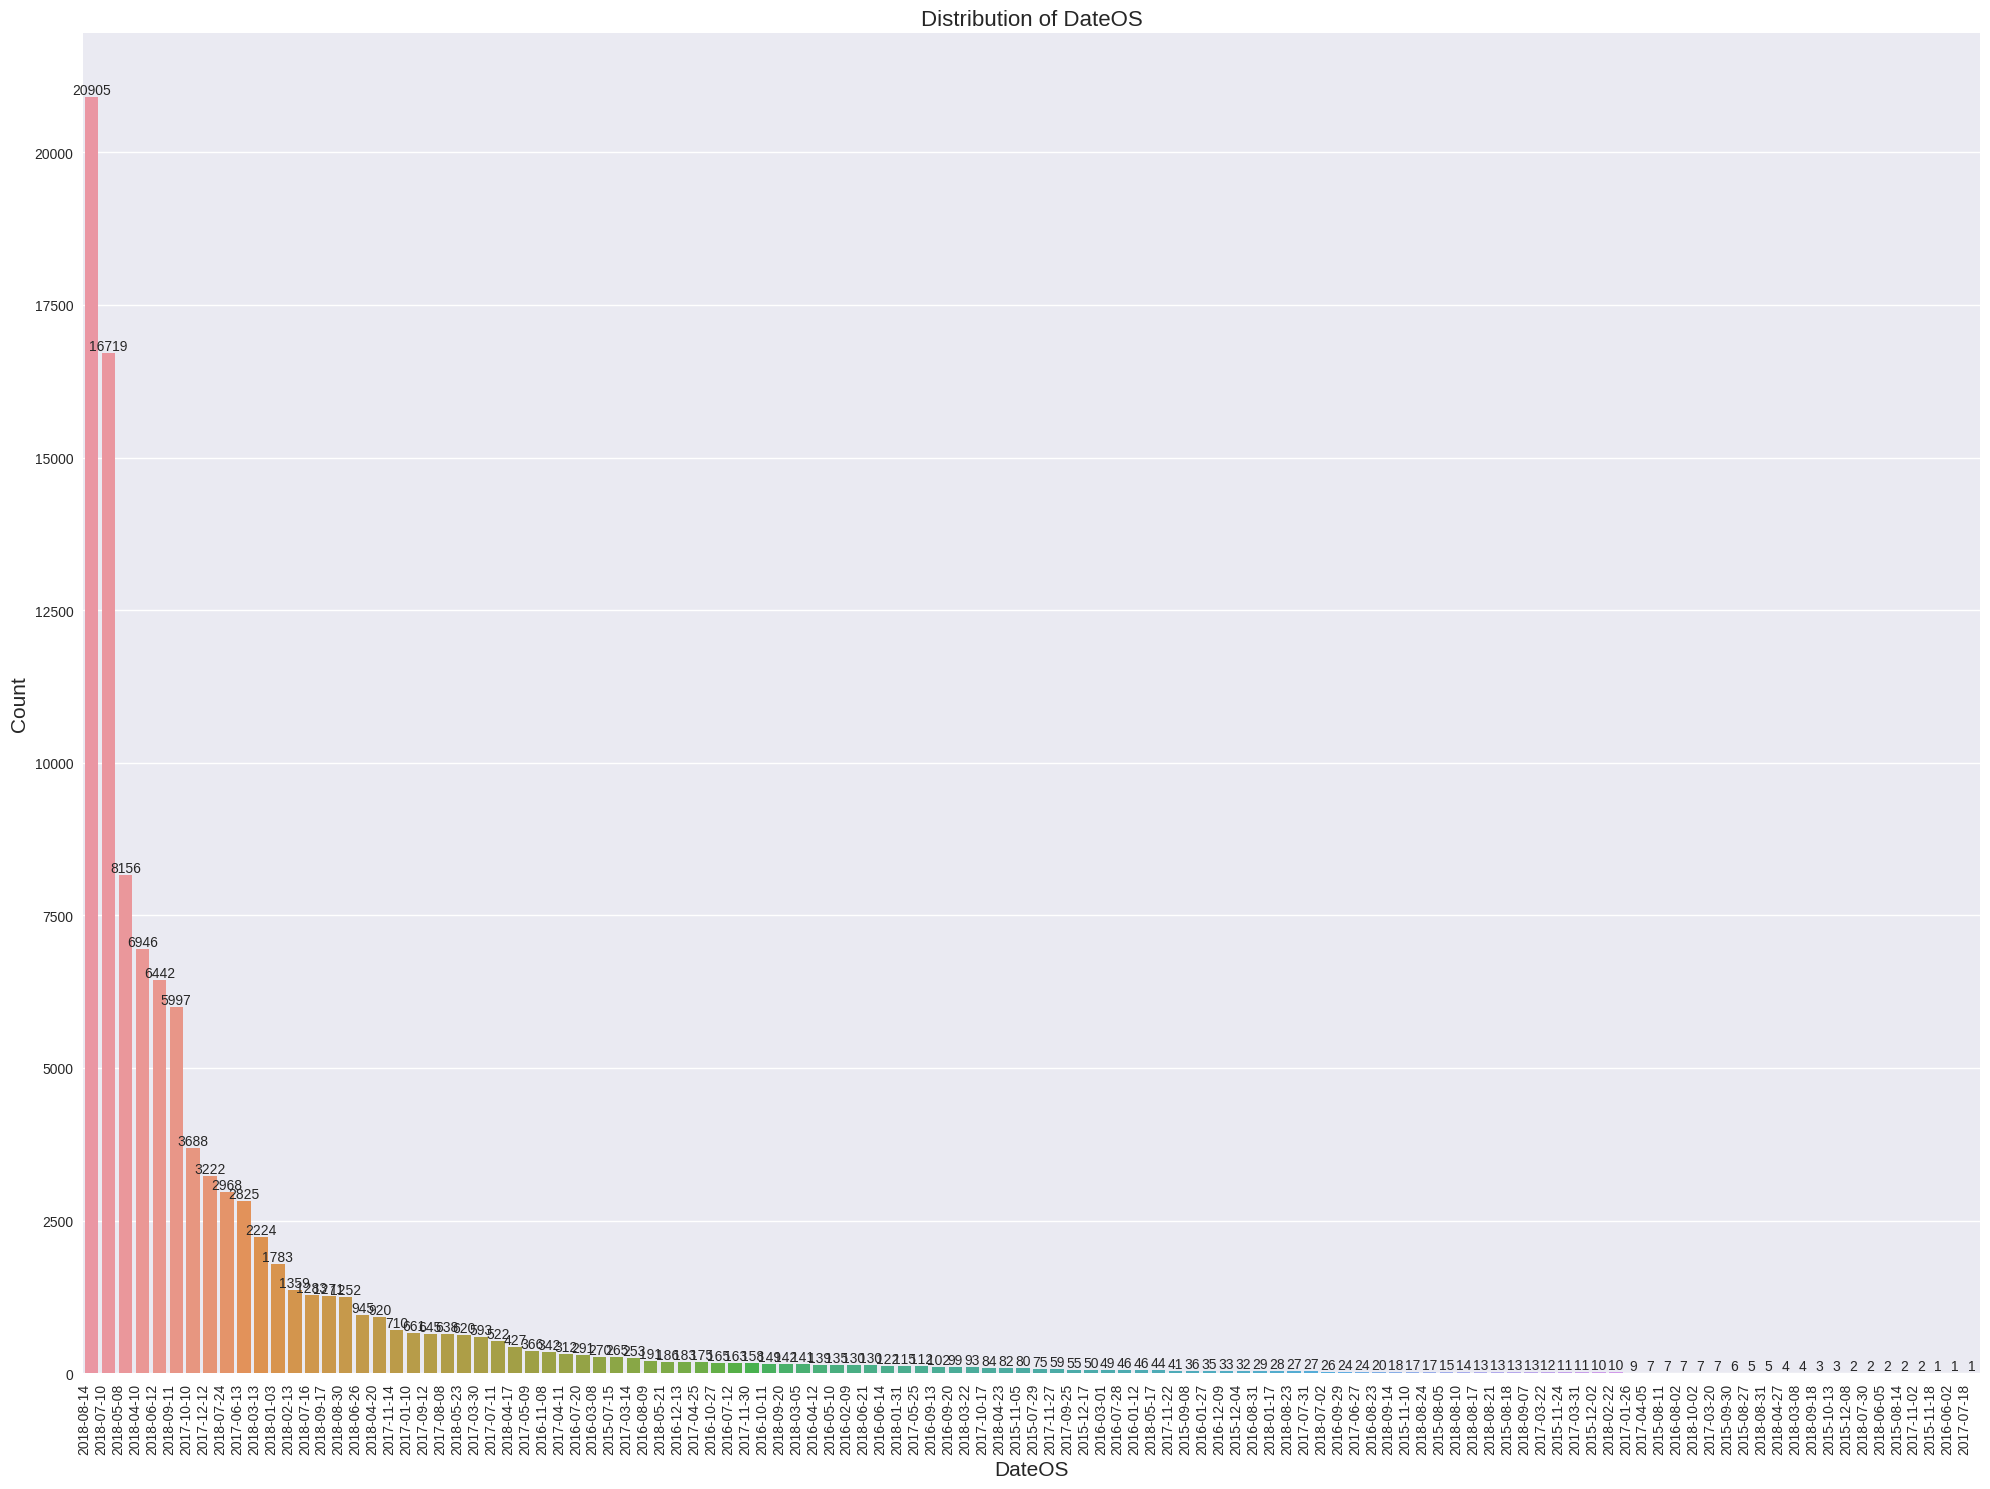

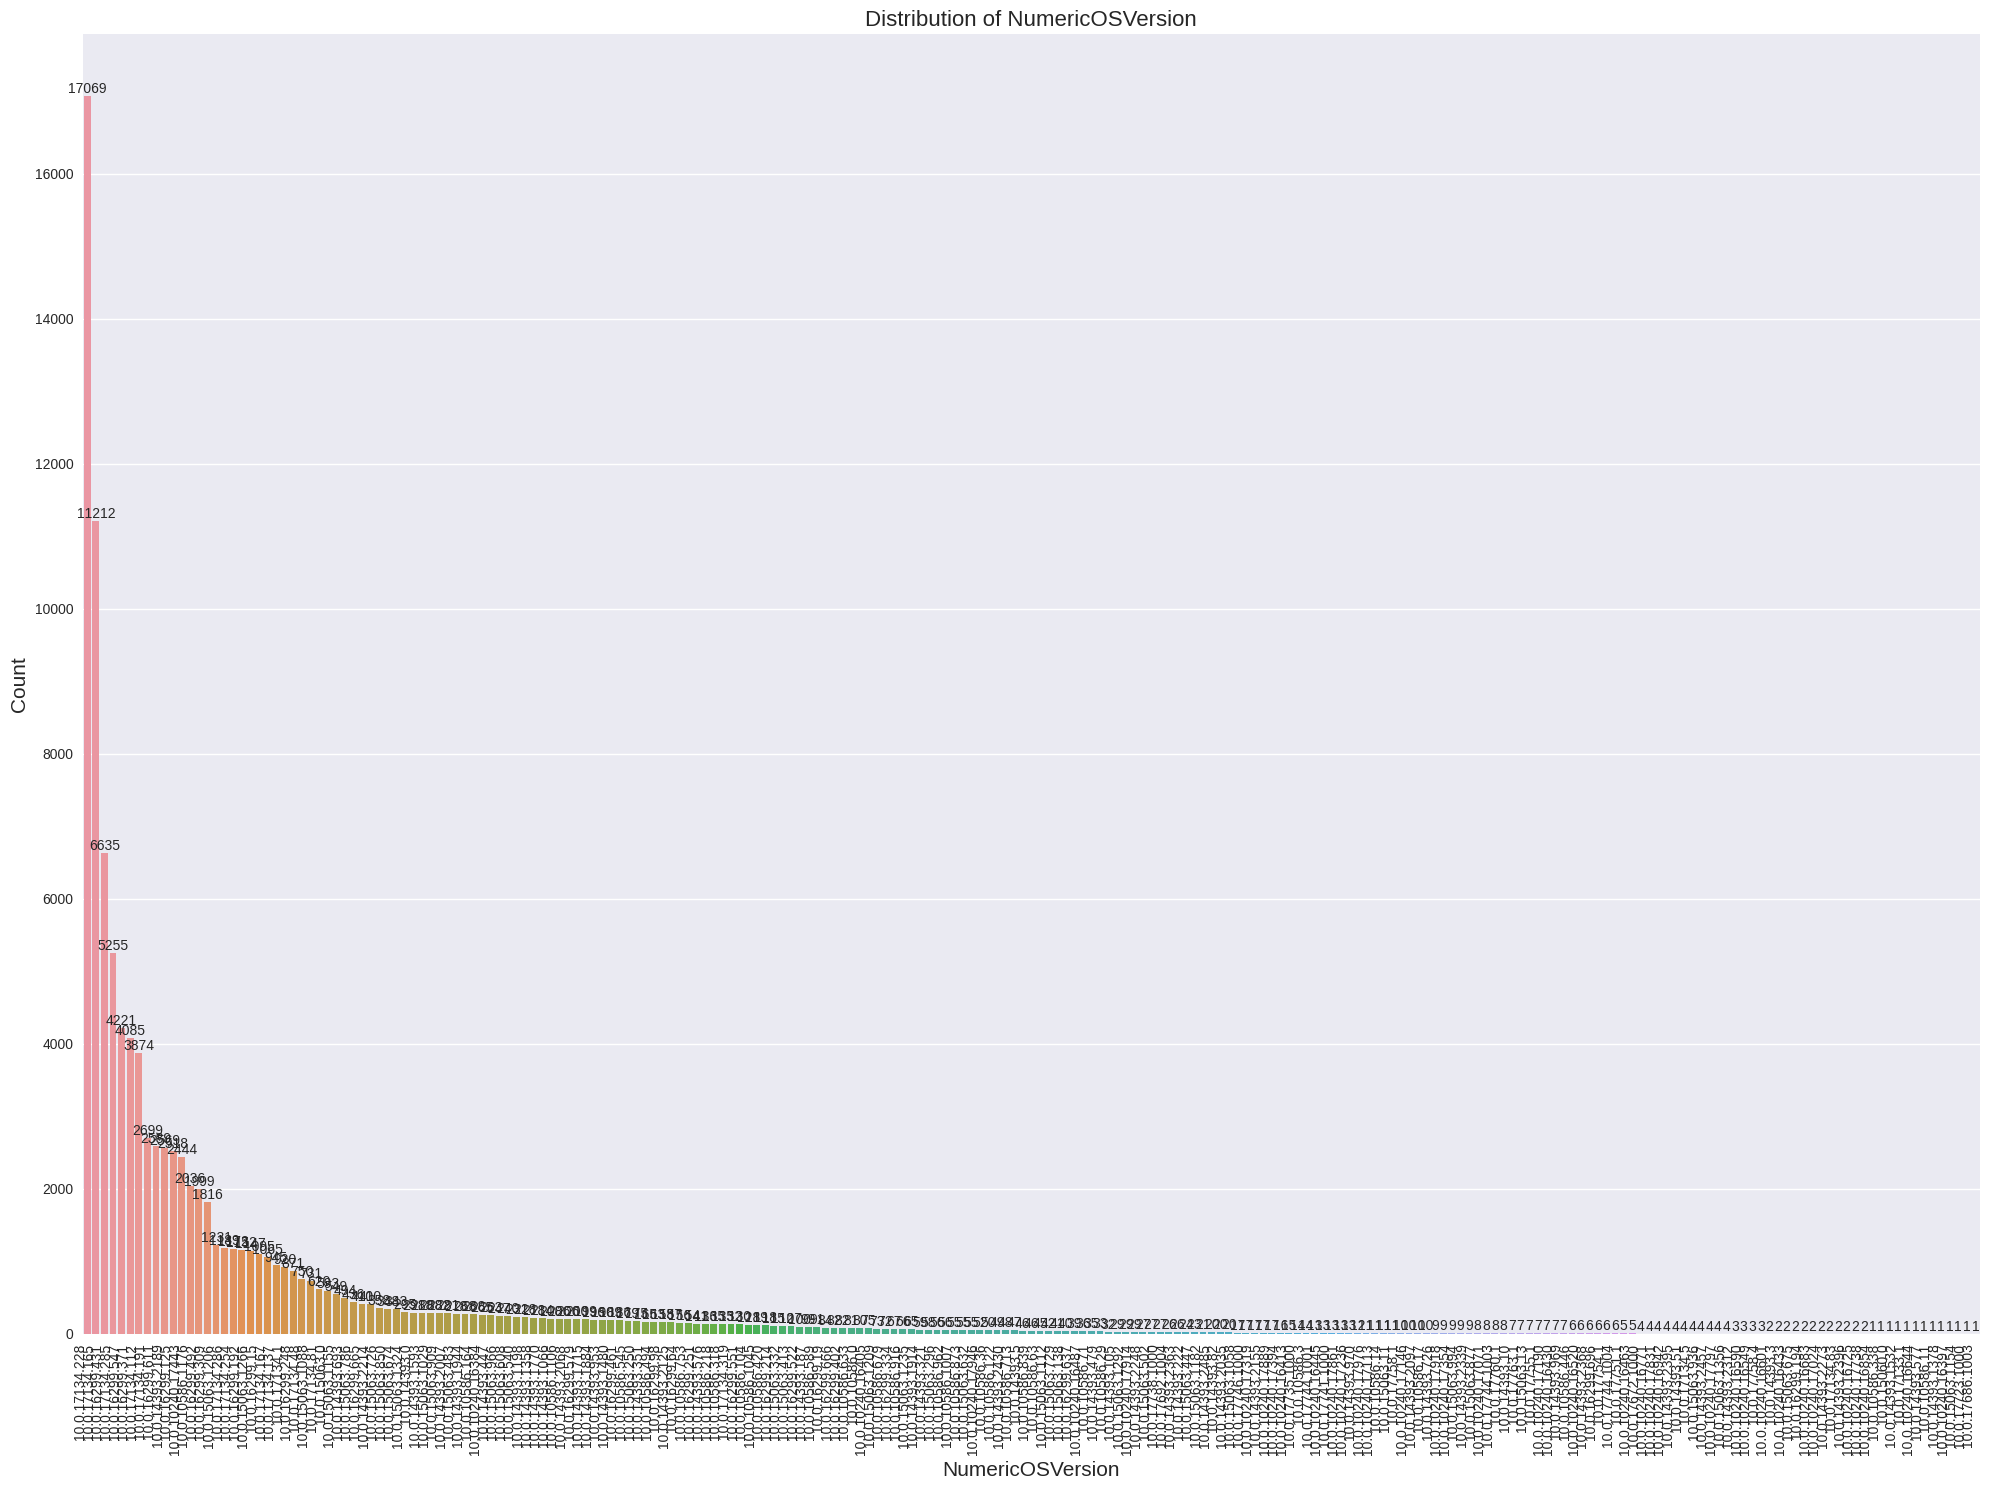

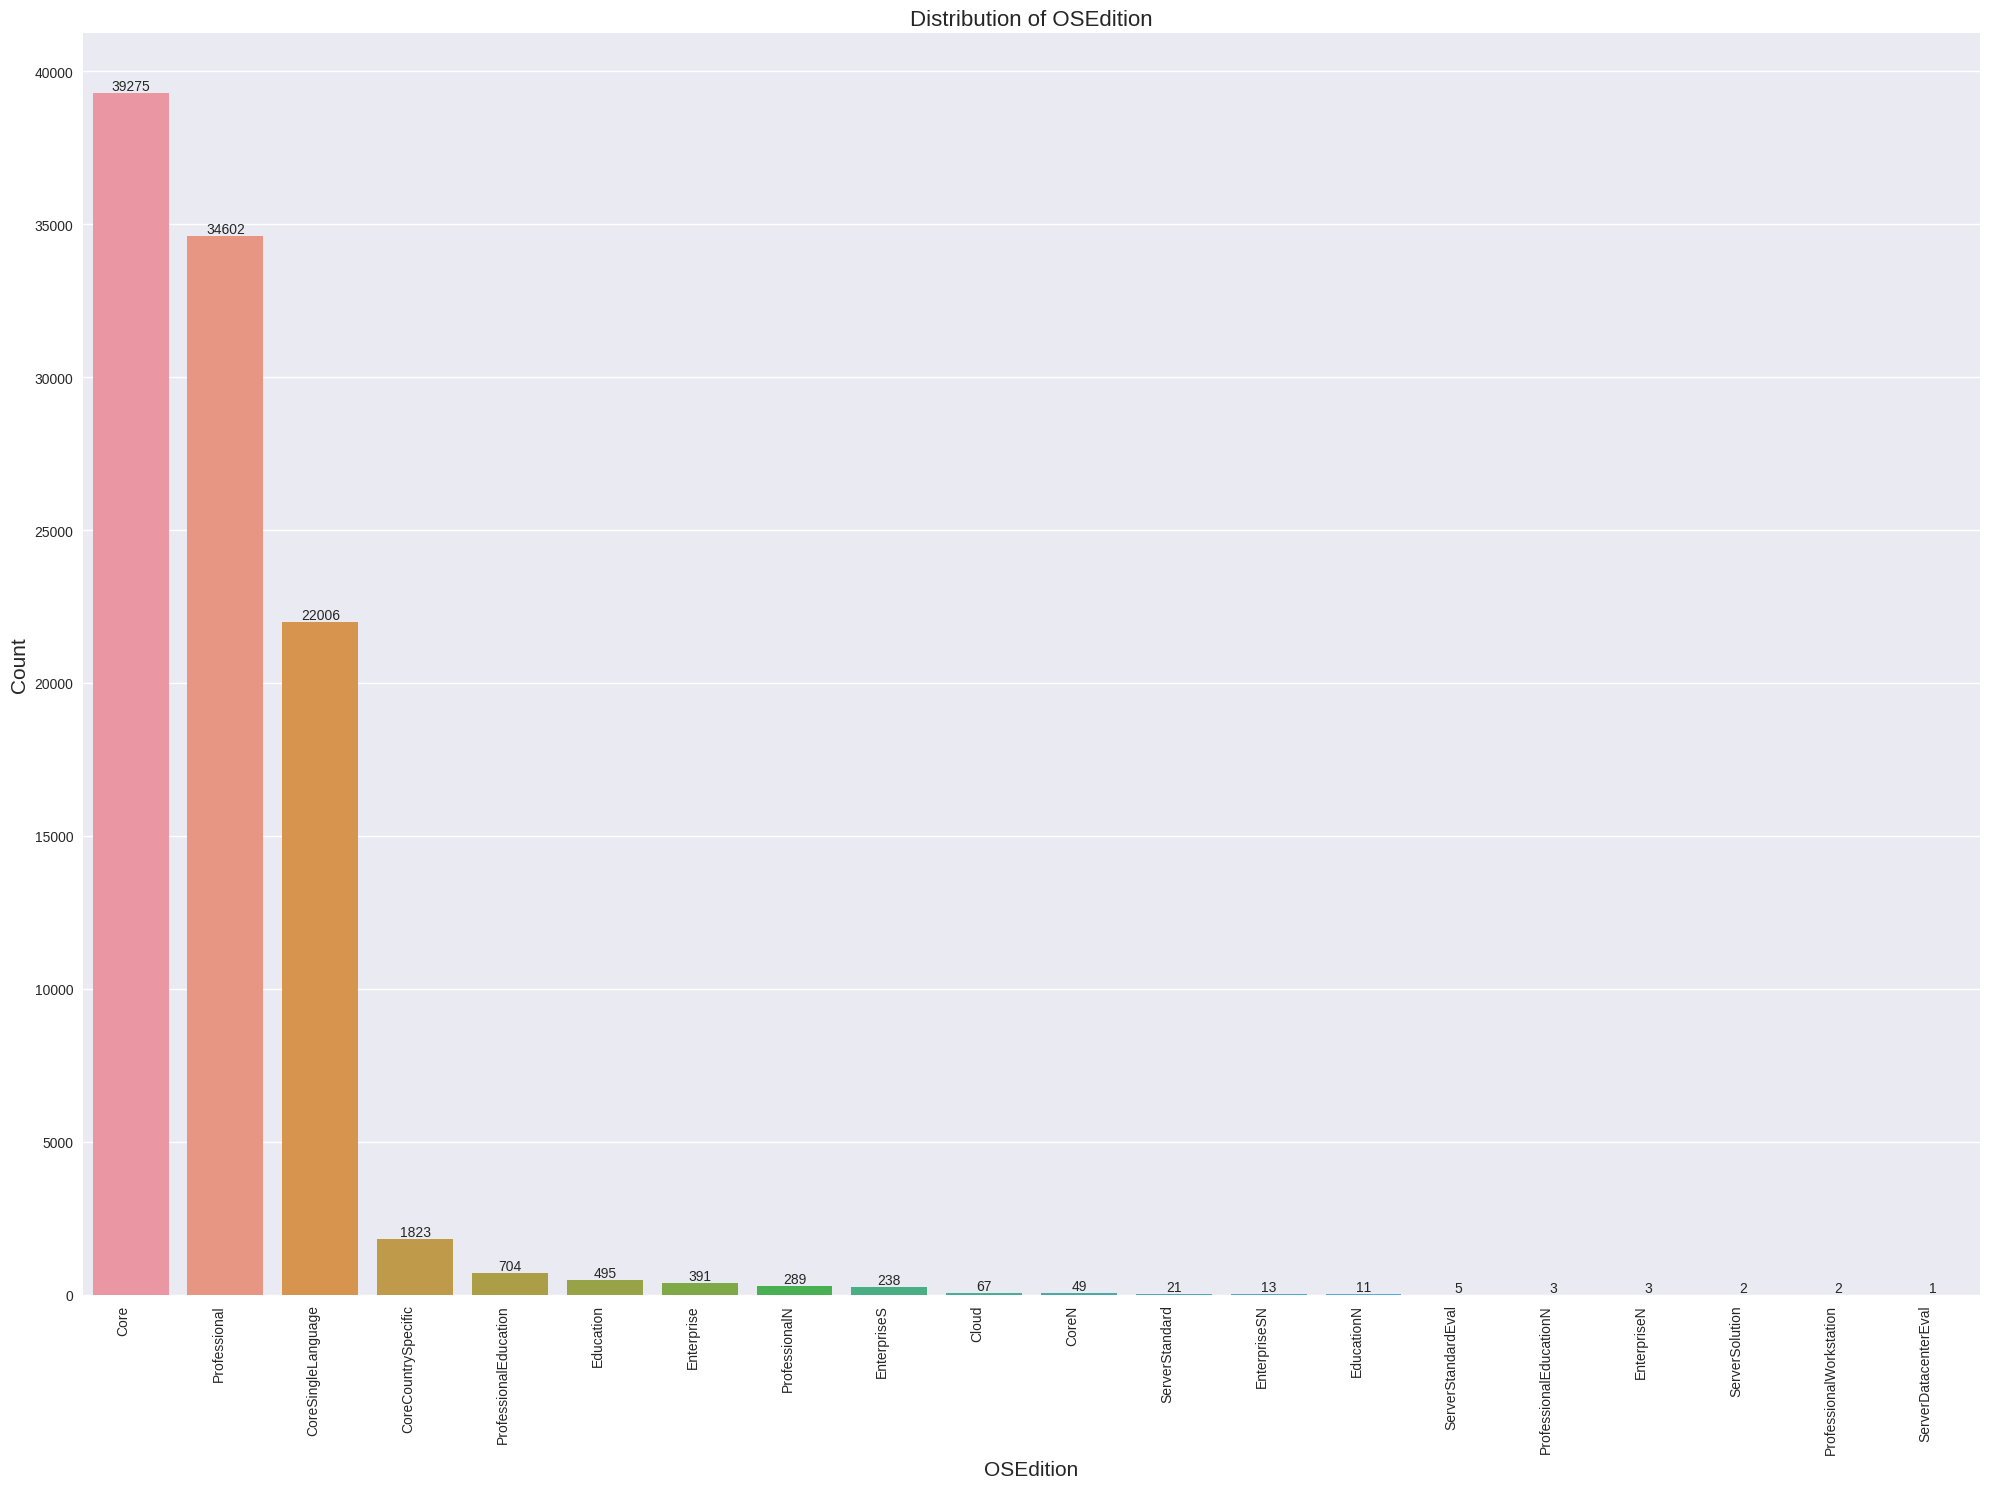

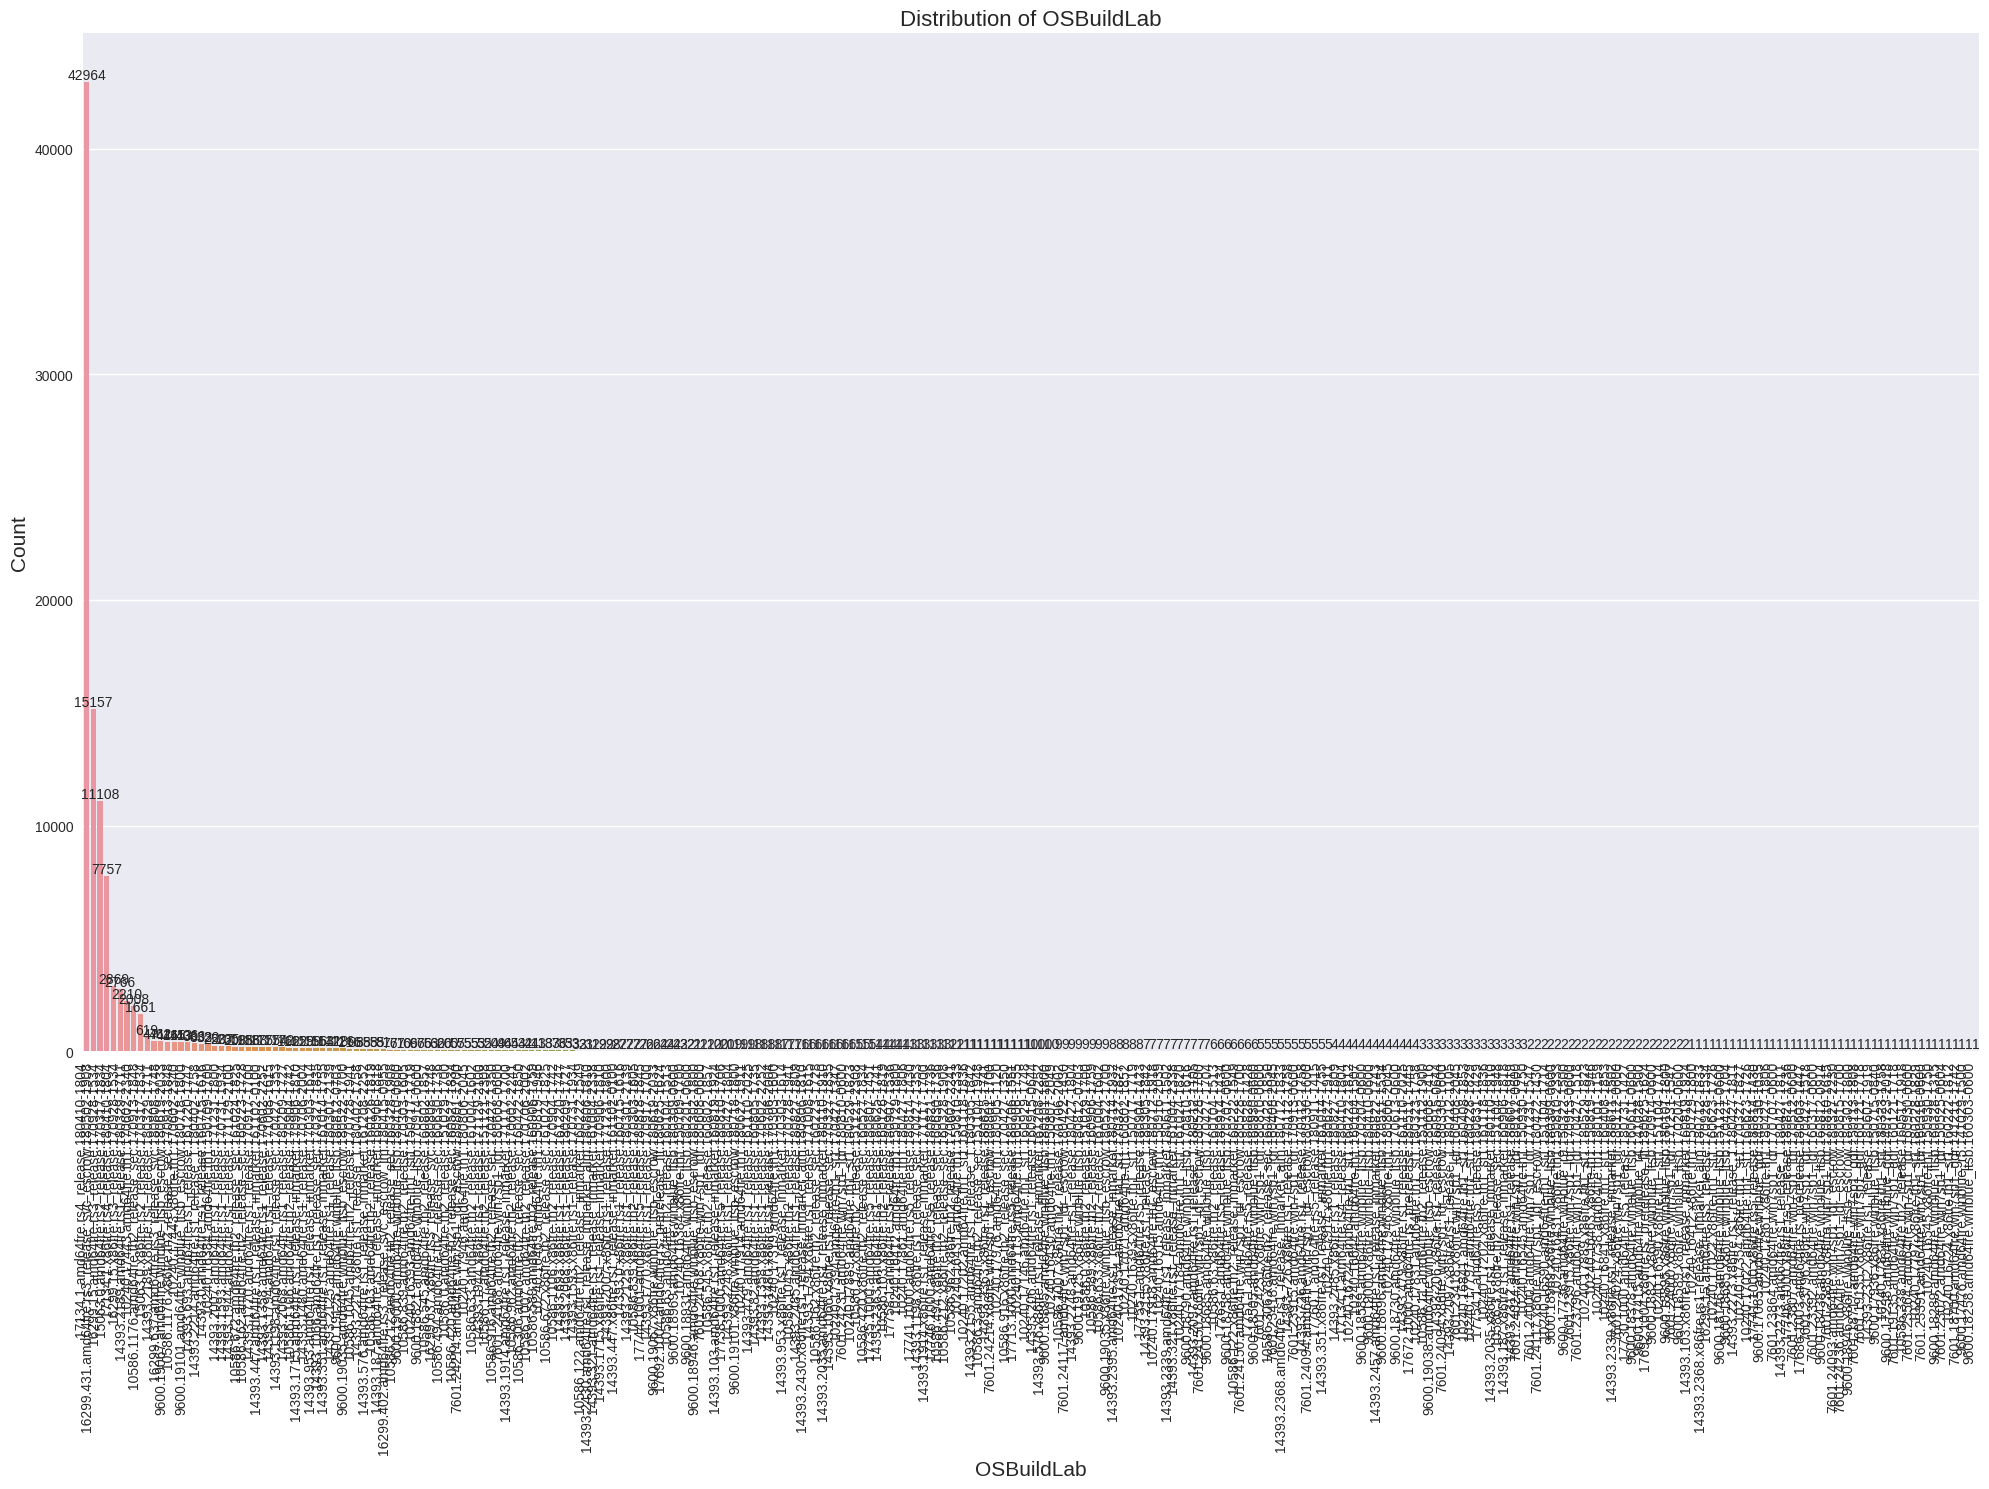

In [33]:
categorical_columns = Top_ten_corr_1
plt.style.use('seaborn')

for column in categorical_columns:
    value_counts = df_train[column].value_counts()
    
    plt.figure(figsize=(20, 15))
    sns.barplot(x = value_counts.index, y = value_counts.values)
    
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(rotation=90, ha='right')
    
    for i, v in enumerate(value_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

- **"x64" Processor has been used by many users.**

- **The "amd64" OSAtritecture is mostly used in many systems.**

- **The engine version "1.1.15200.1" & "1.1.15100.1" are in most of the system.**

- **The most PowerPlatform role is "Mobile".**

- **Most of the OS is last updated on "2018-08-14".**

- **Most of the OS Edition are "core".**

<ipython-input-34-e1087028d7e9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


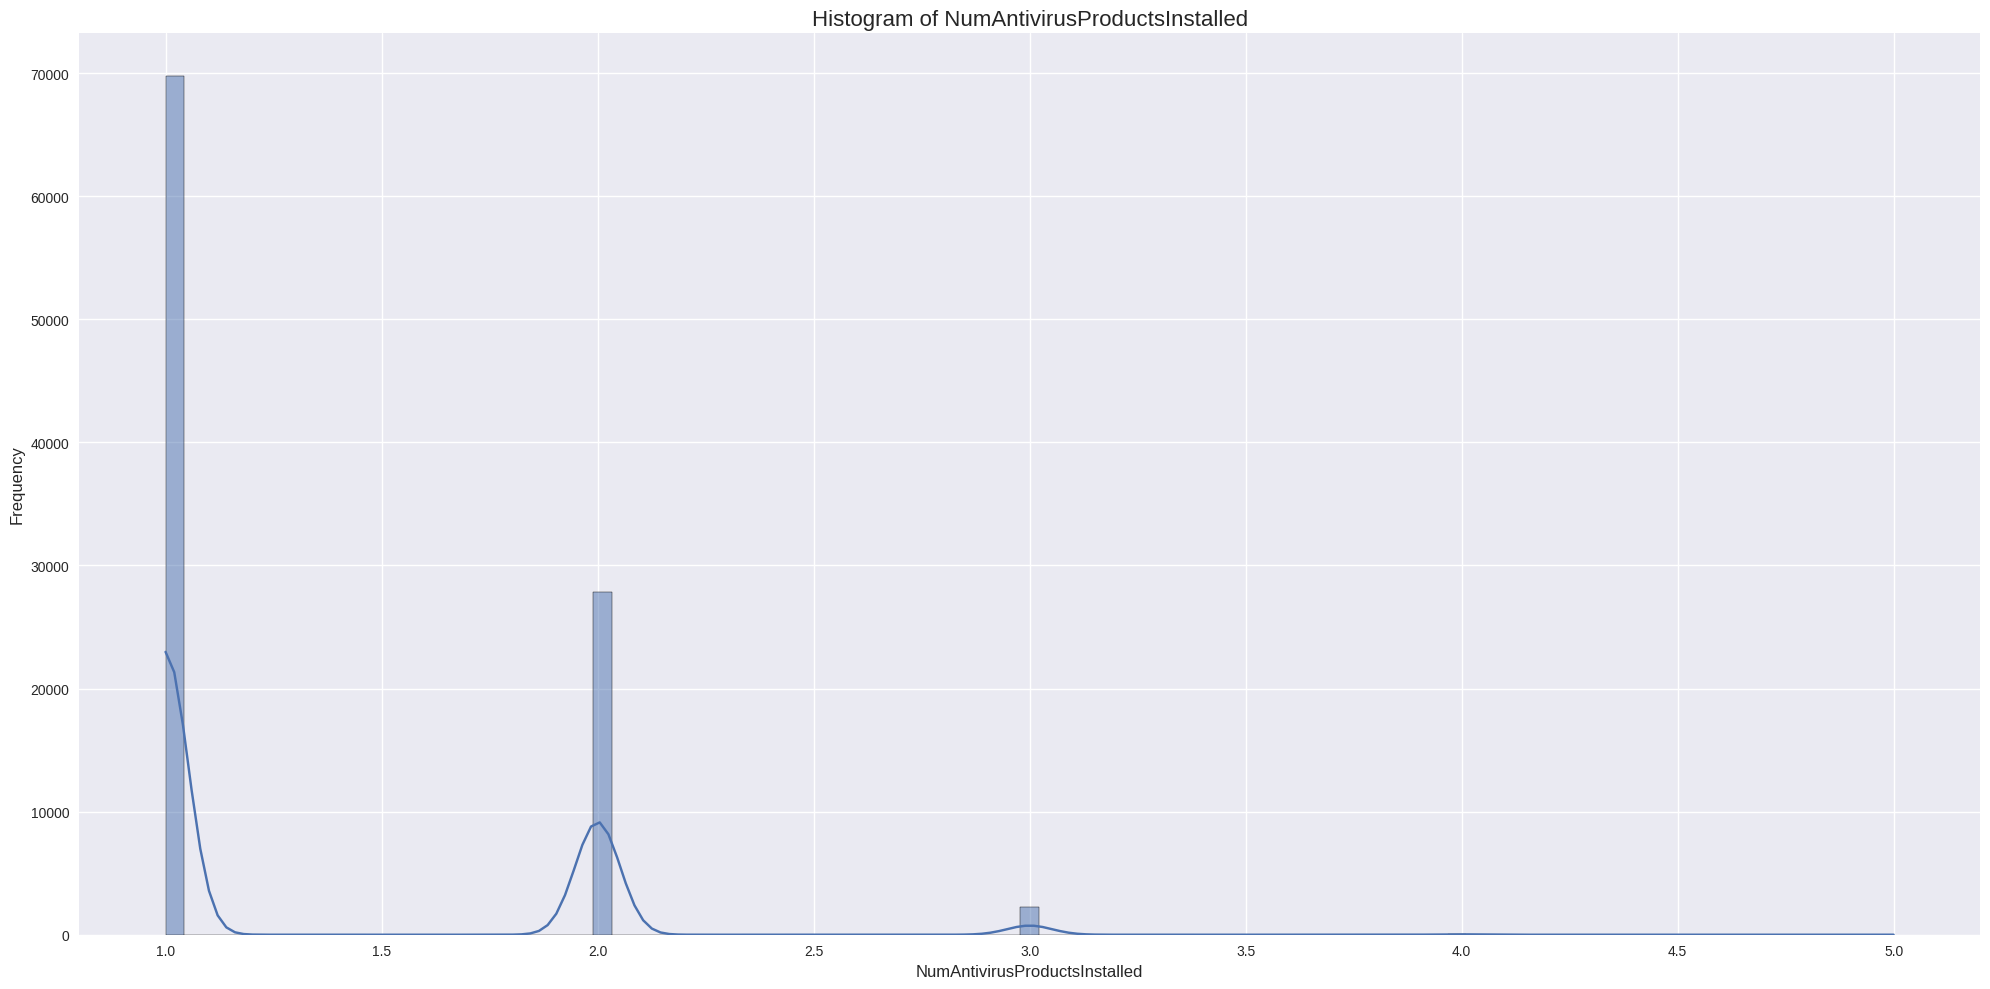

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


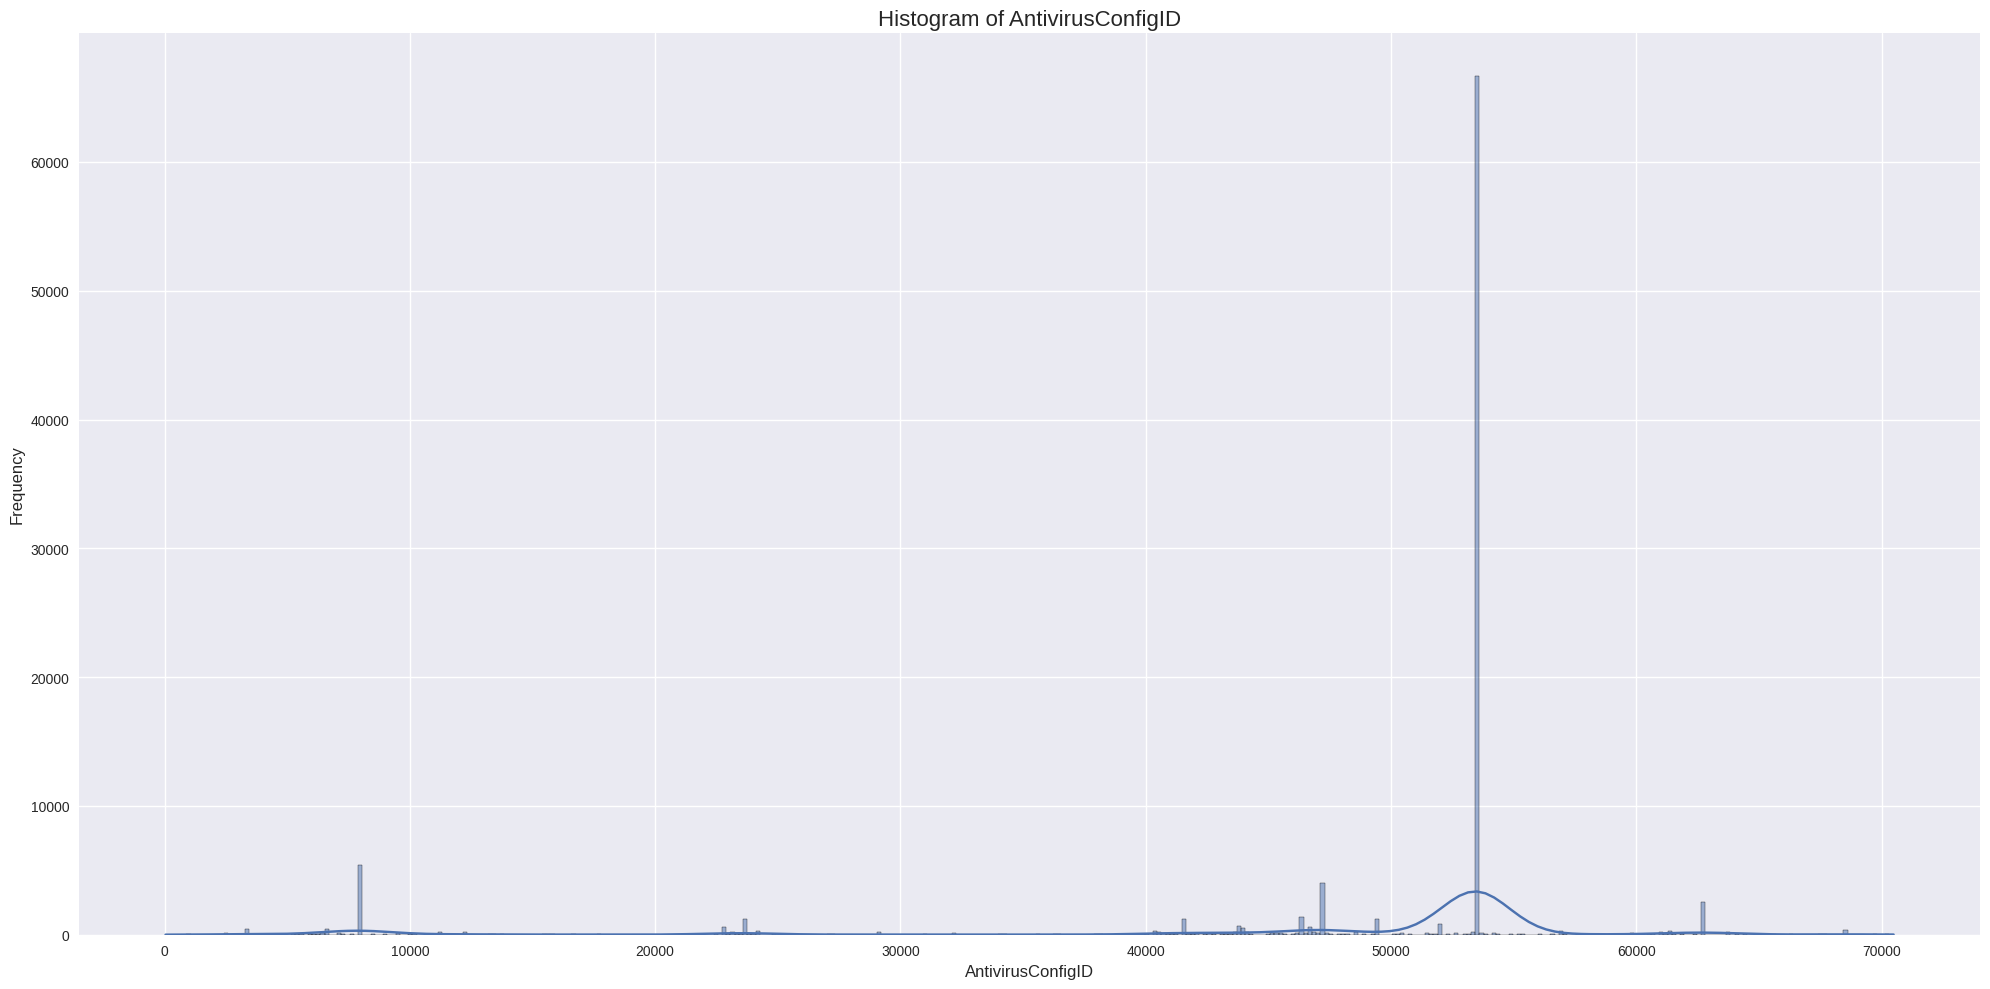

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


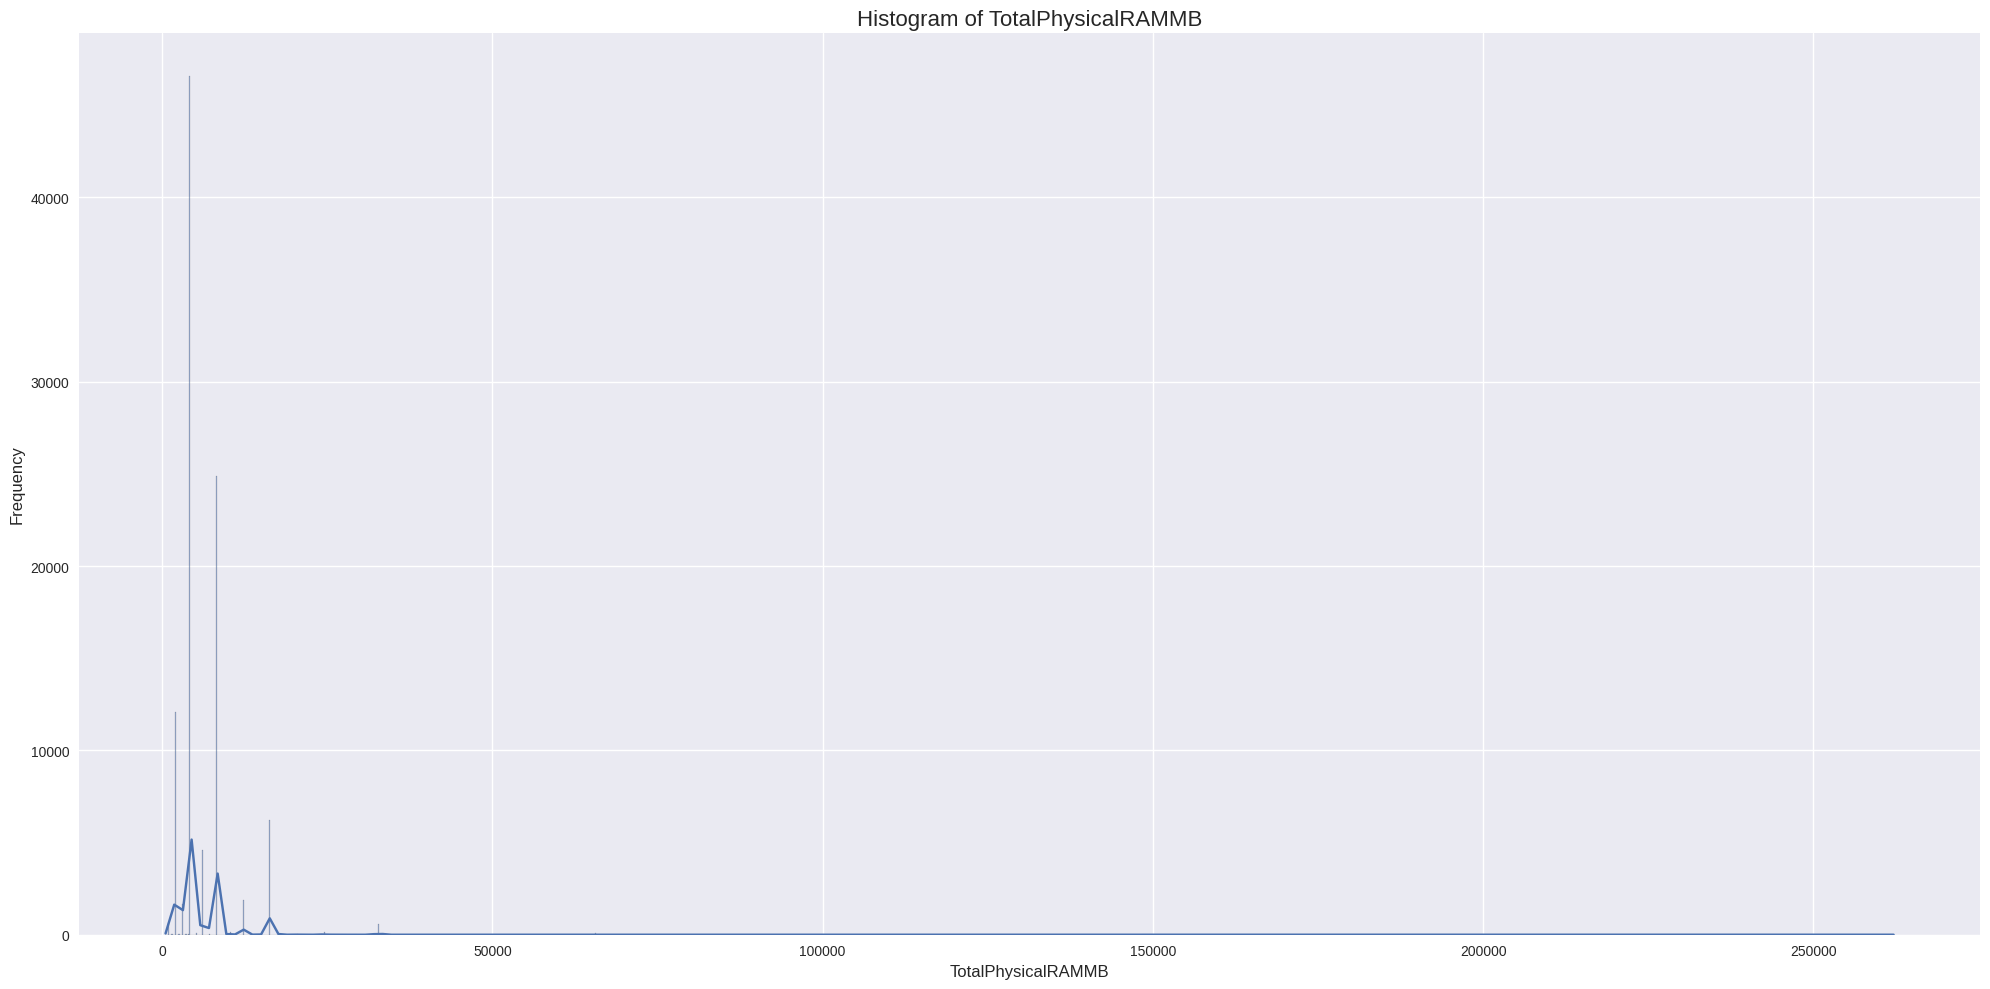

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


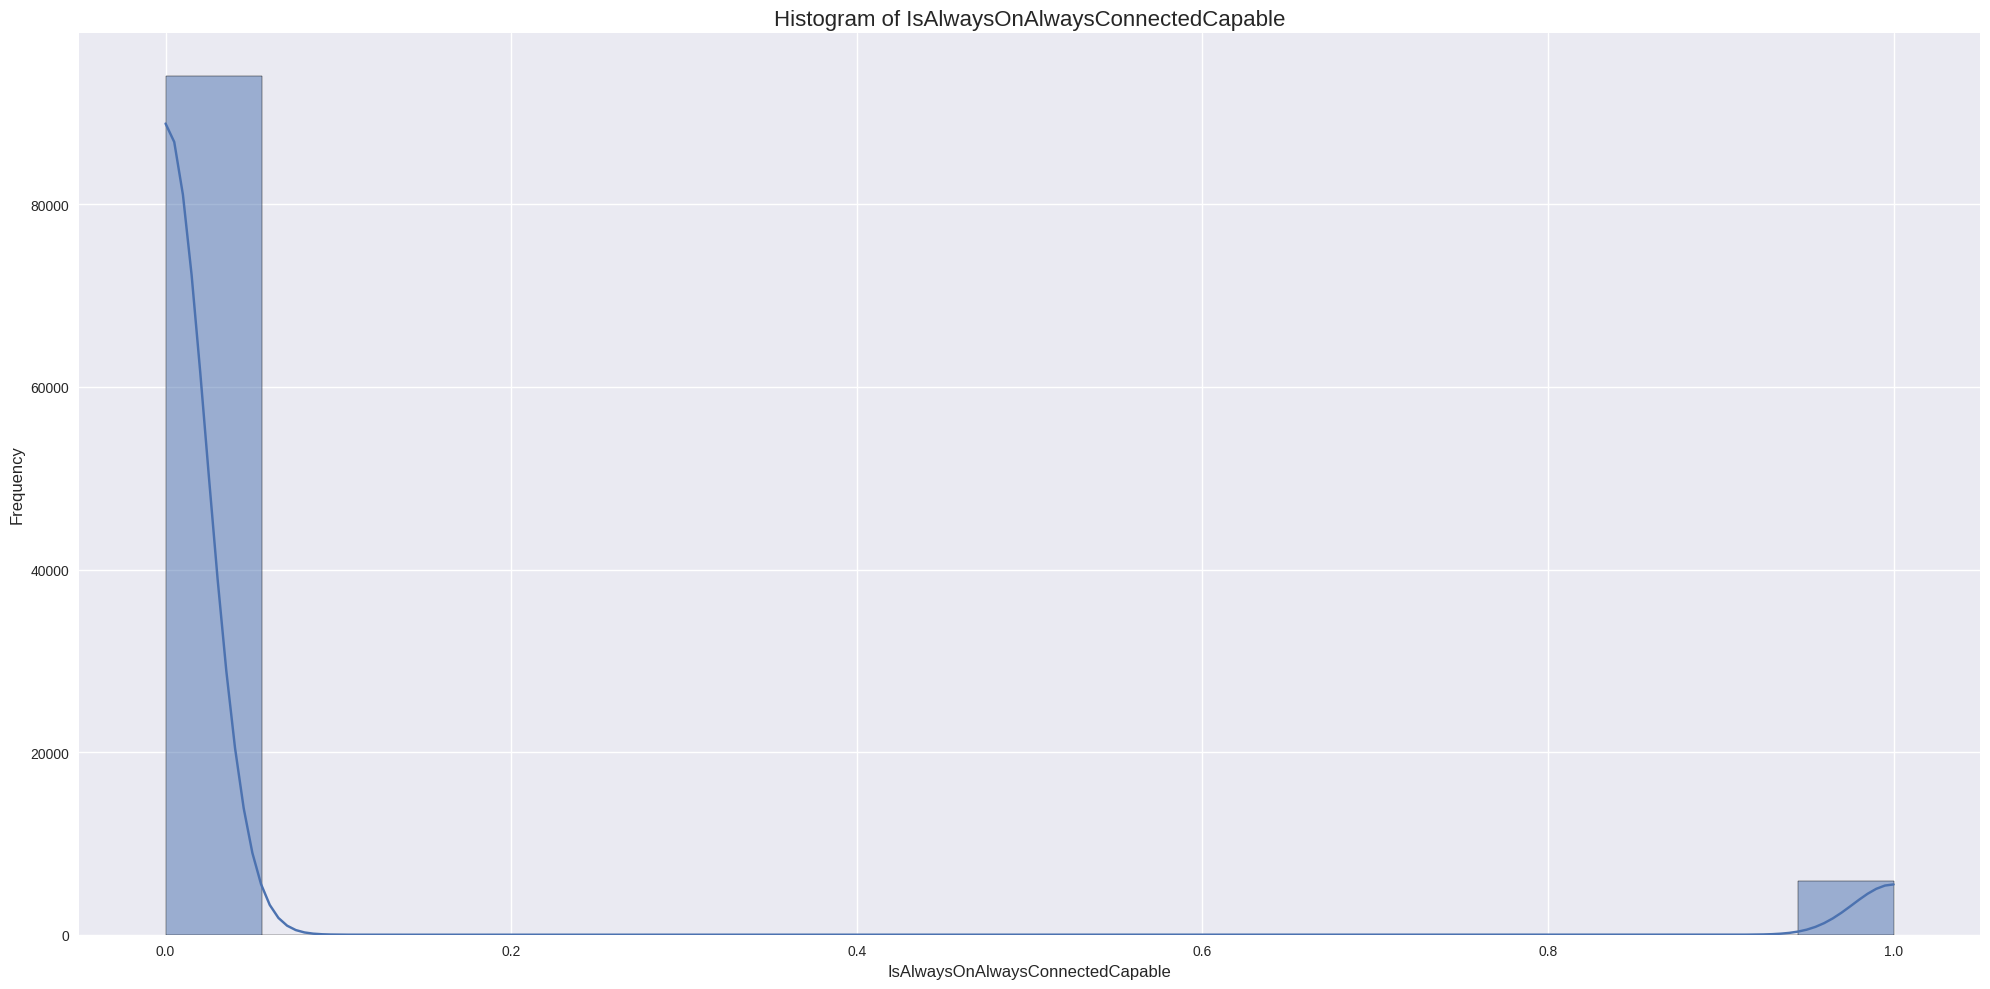

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


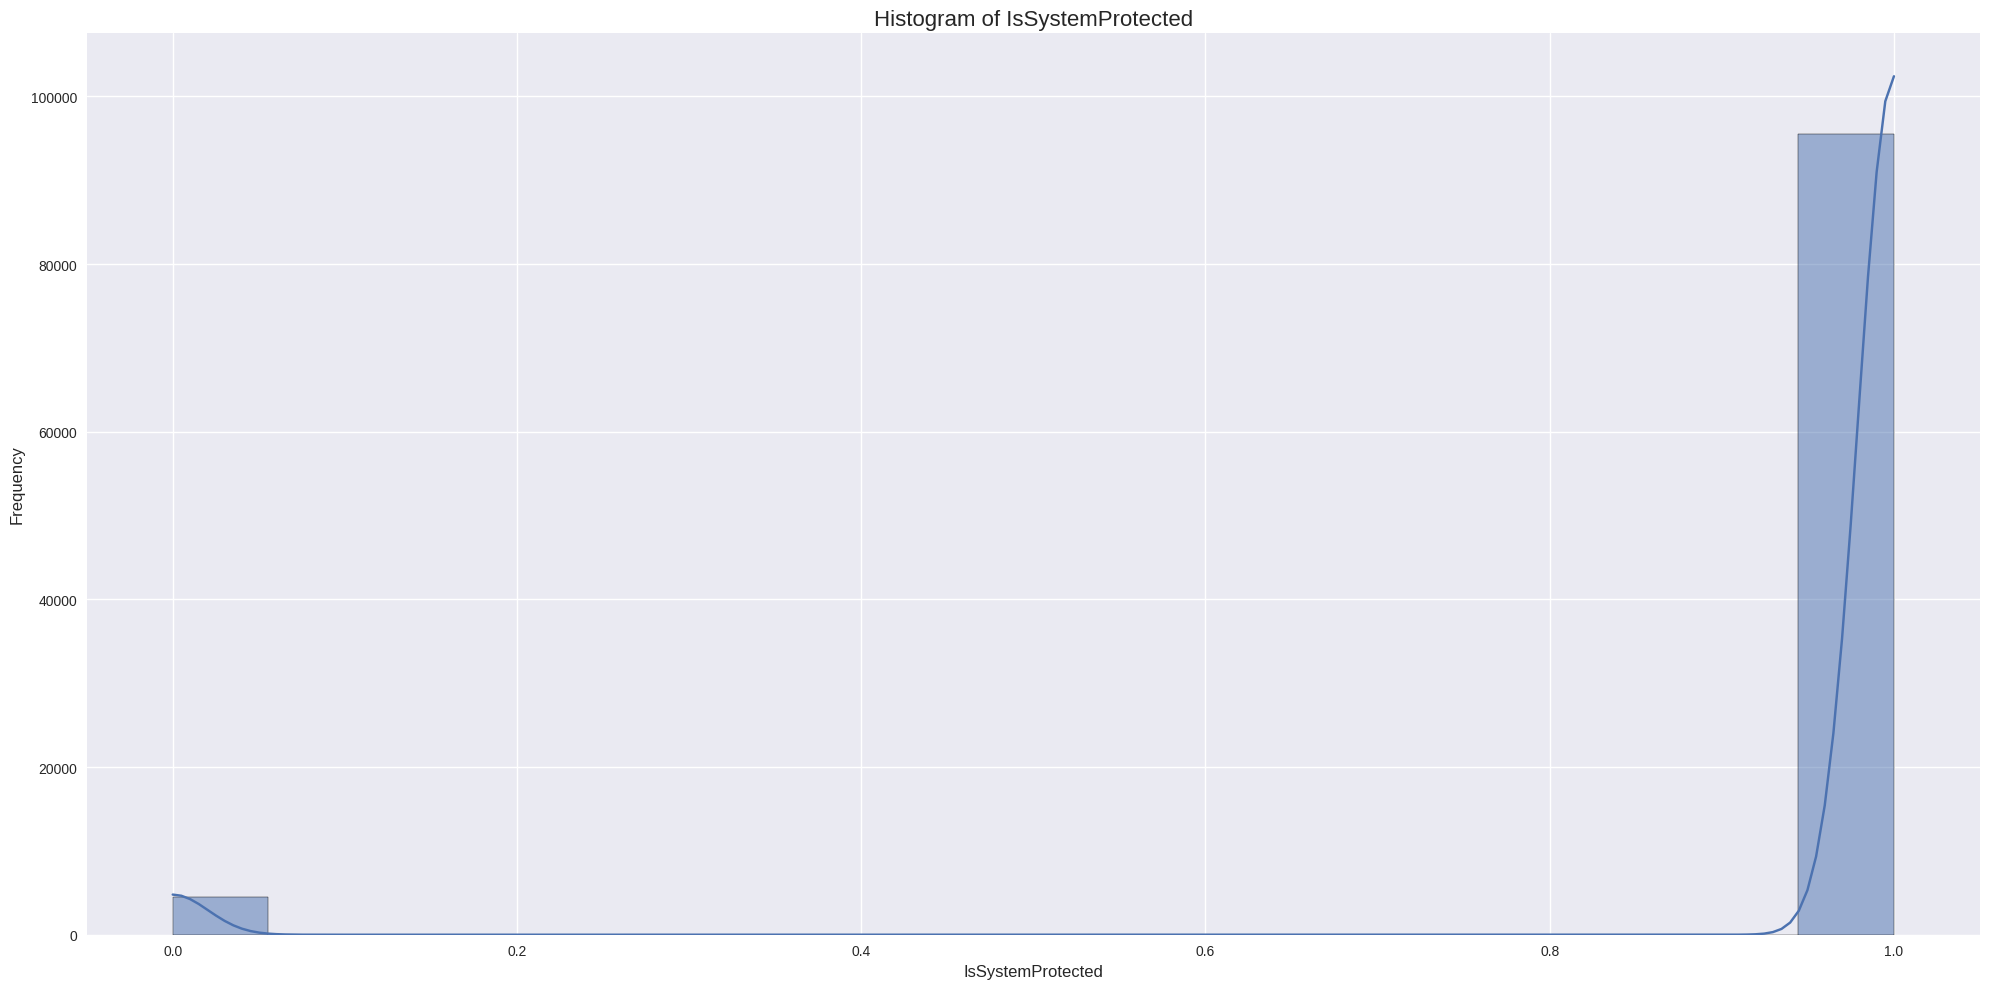

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


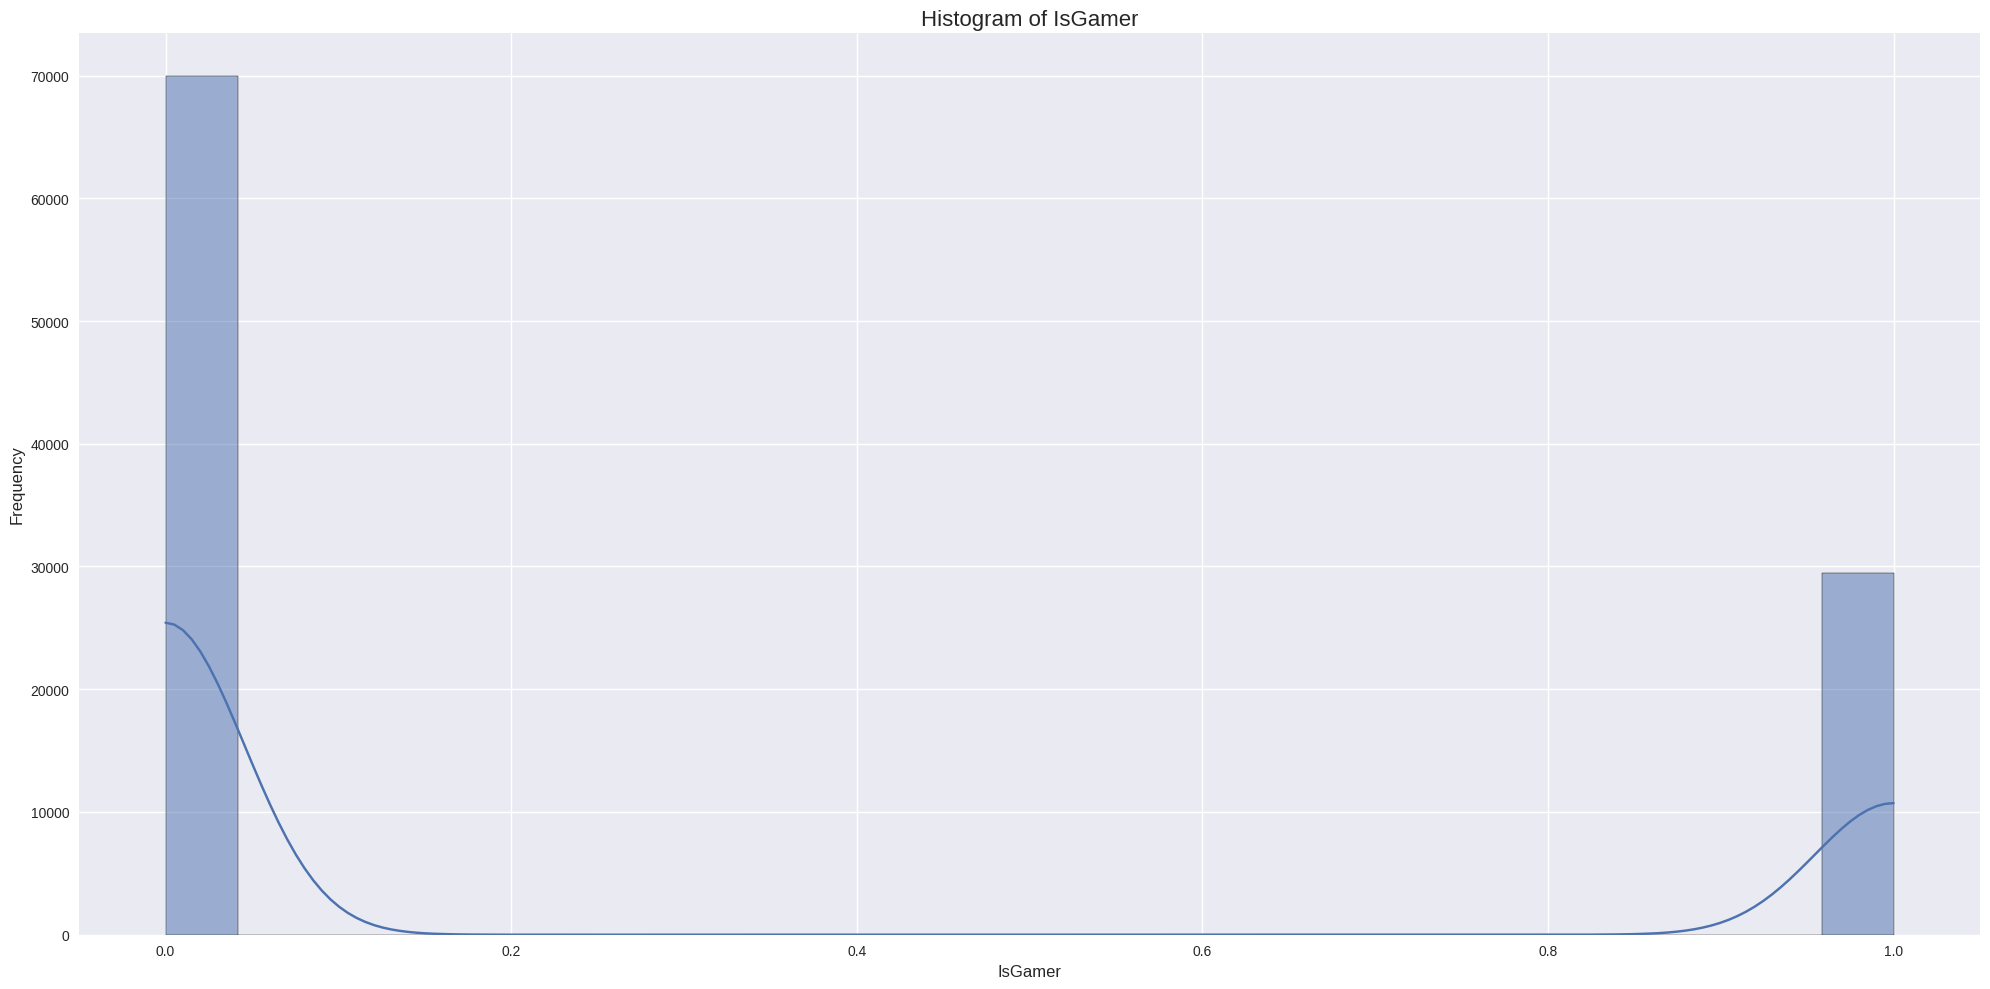

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


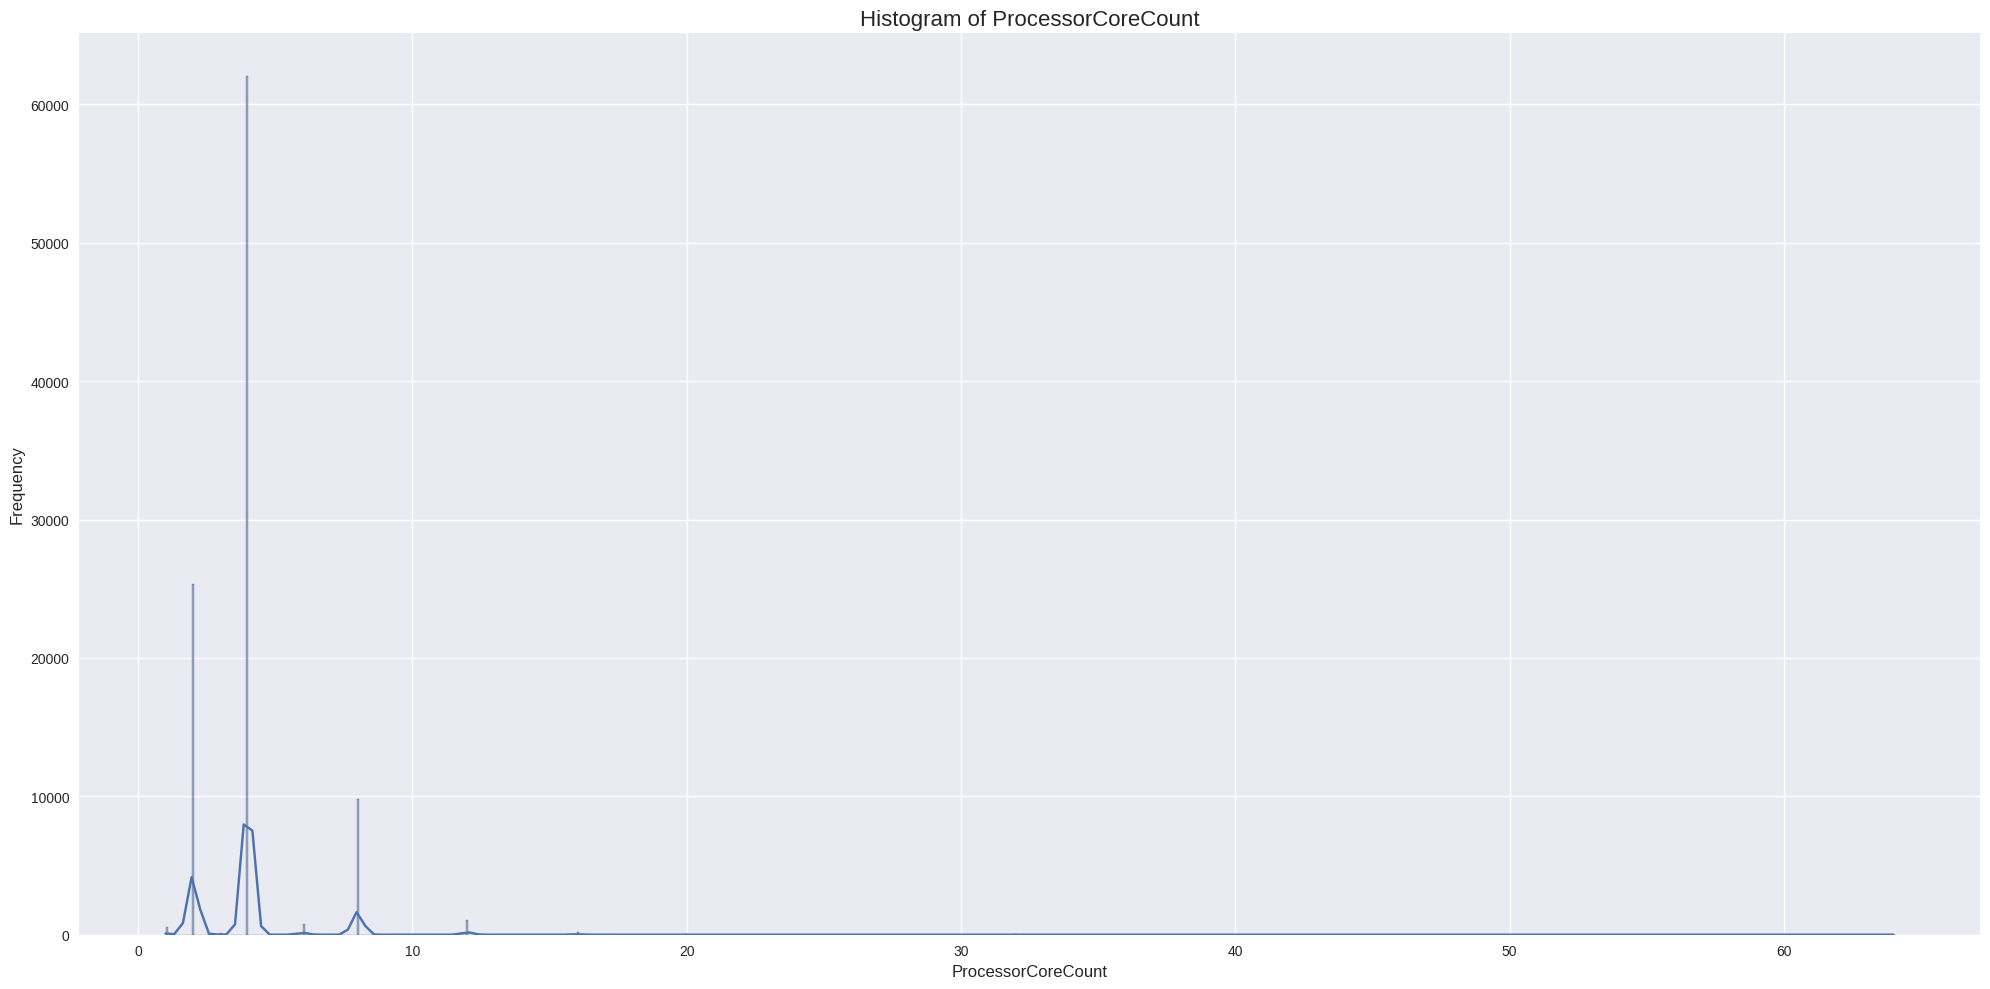

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


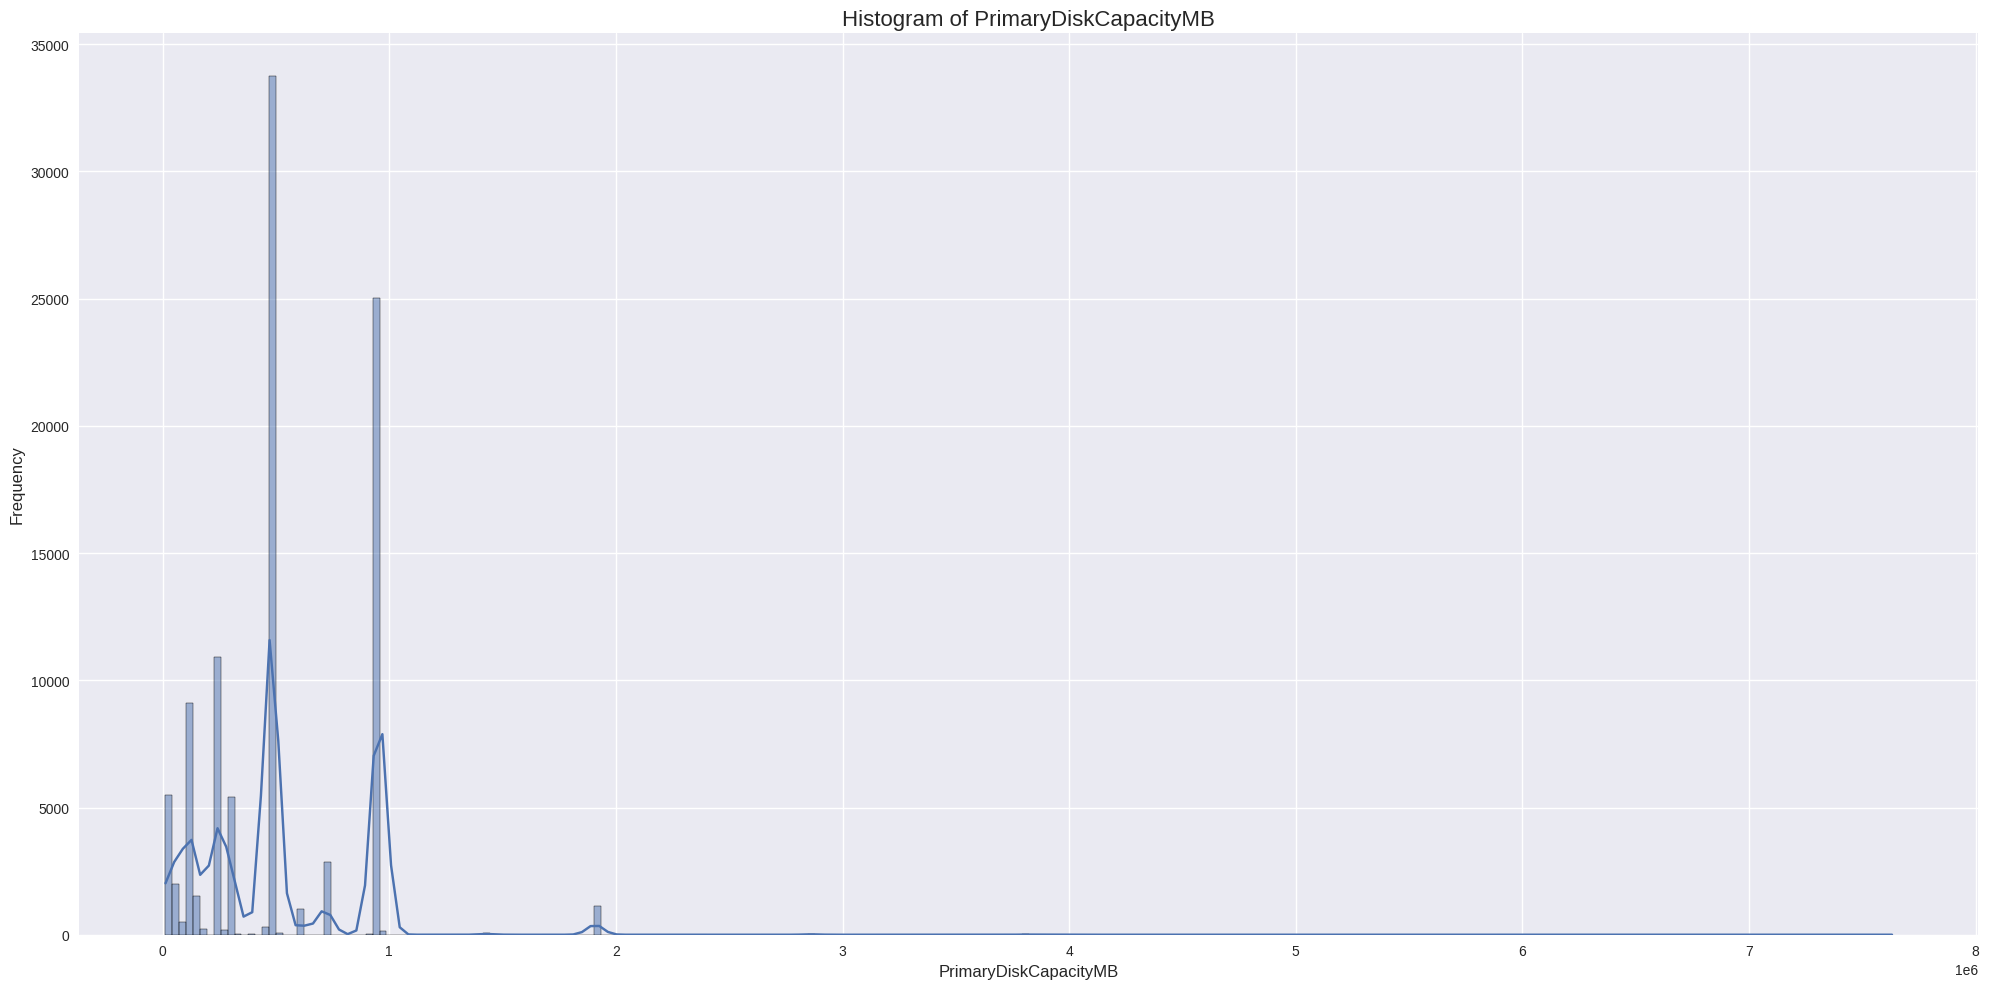

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


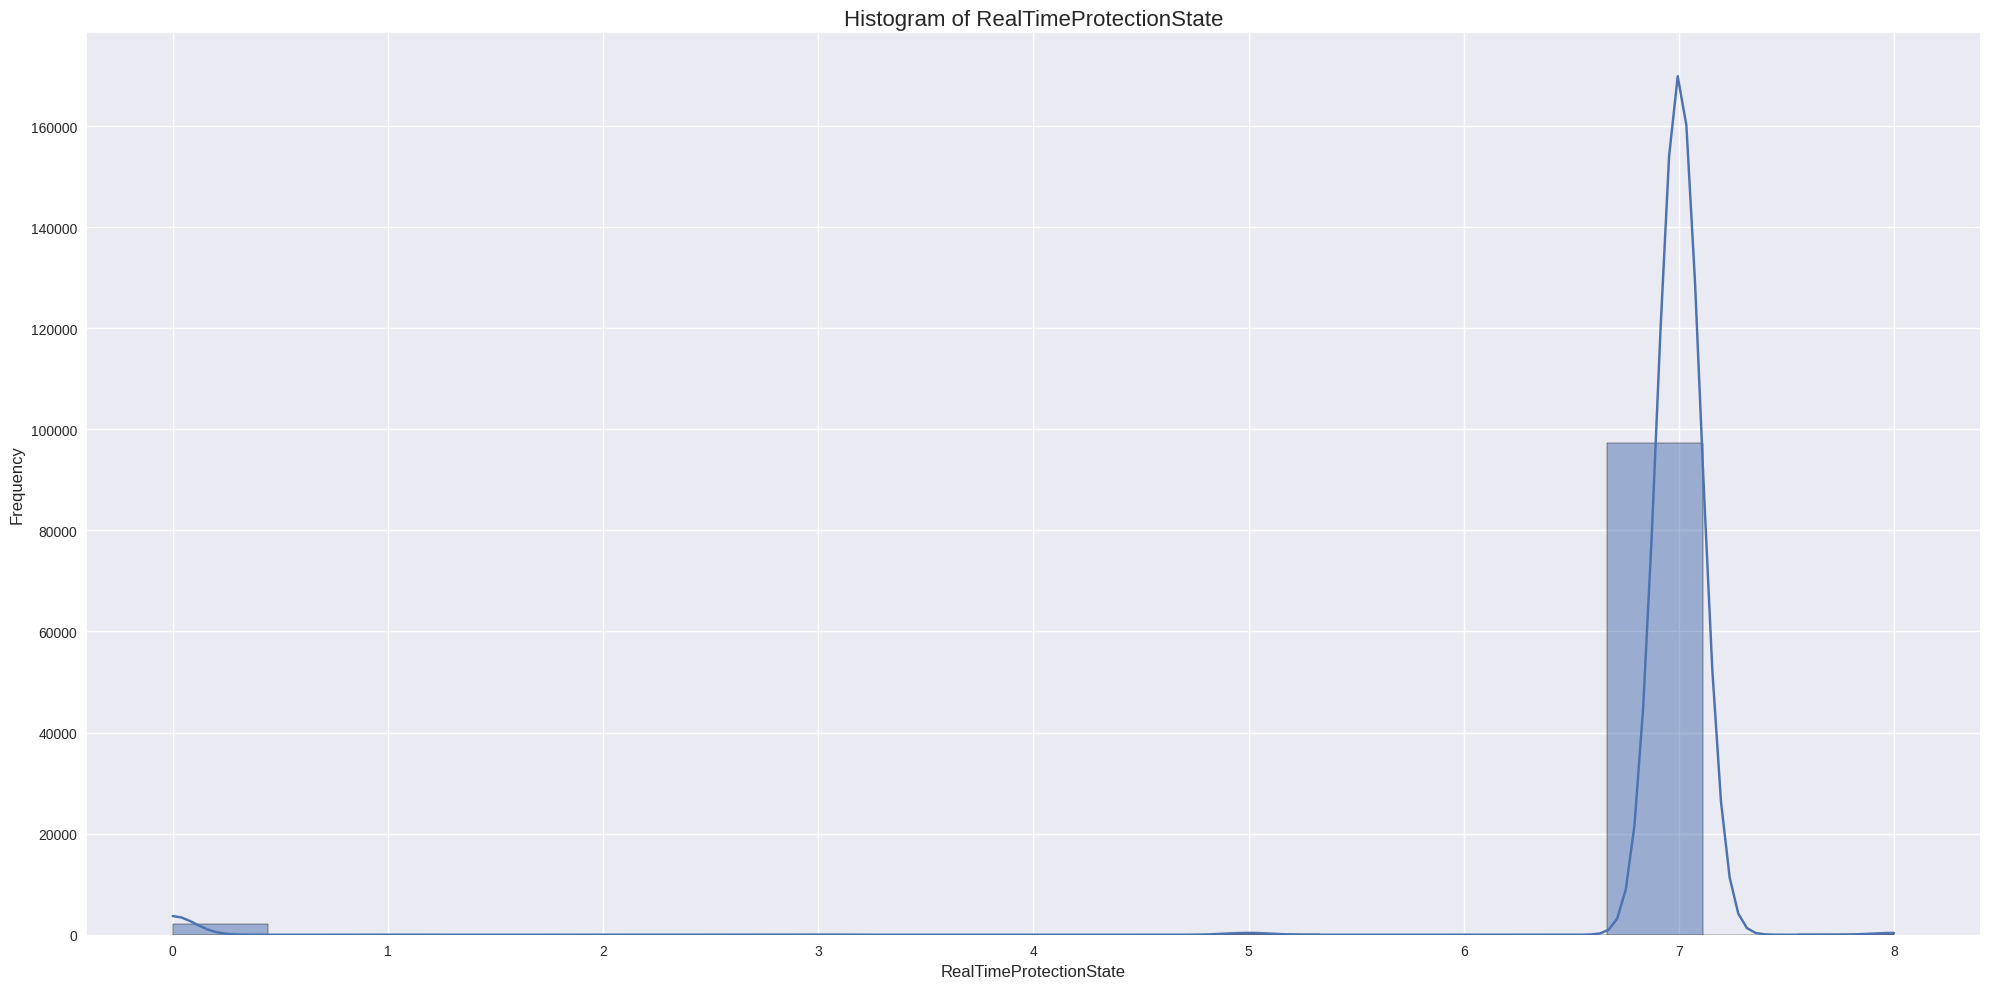

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


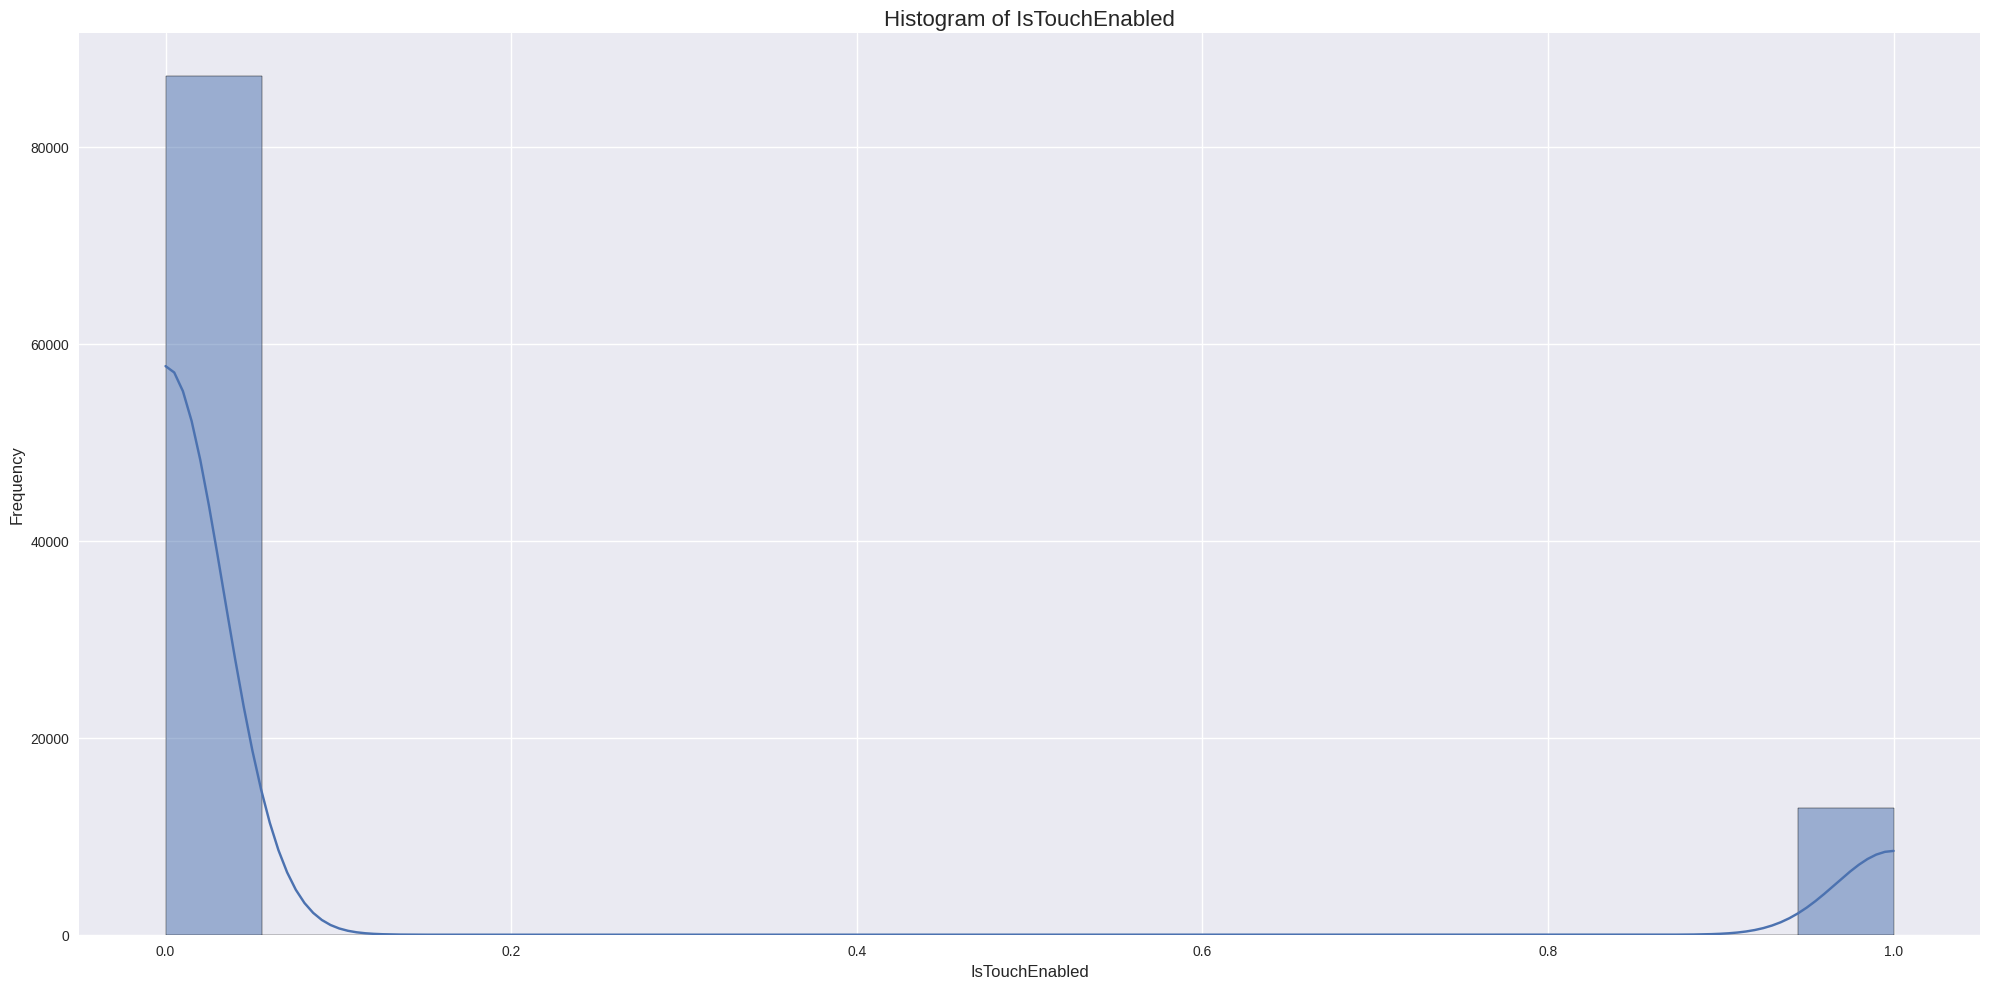

In [34]:
numeric_columns = Top_ten_corr

plt.style.use('seaborn')
for column in numeric_columns:
    plt.figure(figsize=(20, 10))
    sns.histplot(data=df_train , x=column, kde=True)
    
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    plt.tight_layout()
    plt.show()

- **Most of the system has only one AntiVirus Products installed.**

In [35]:
# sns.pairplot(df_train, diag_kind="kde")

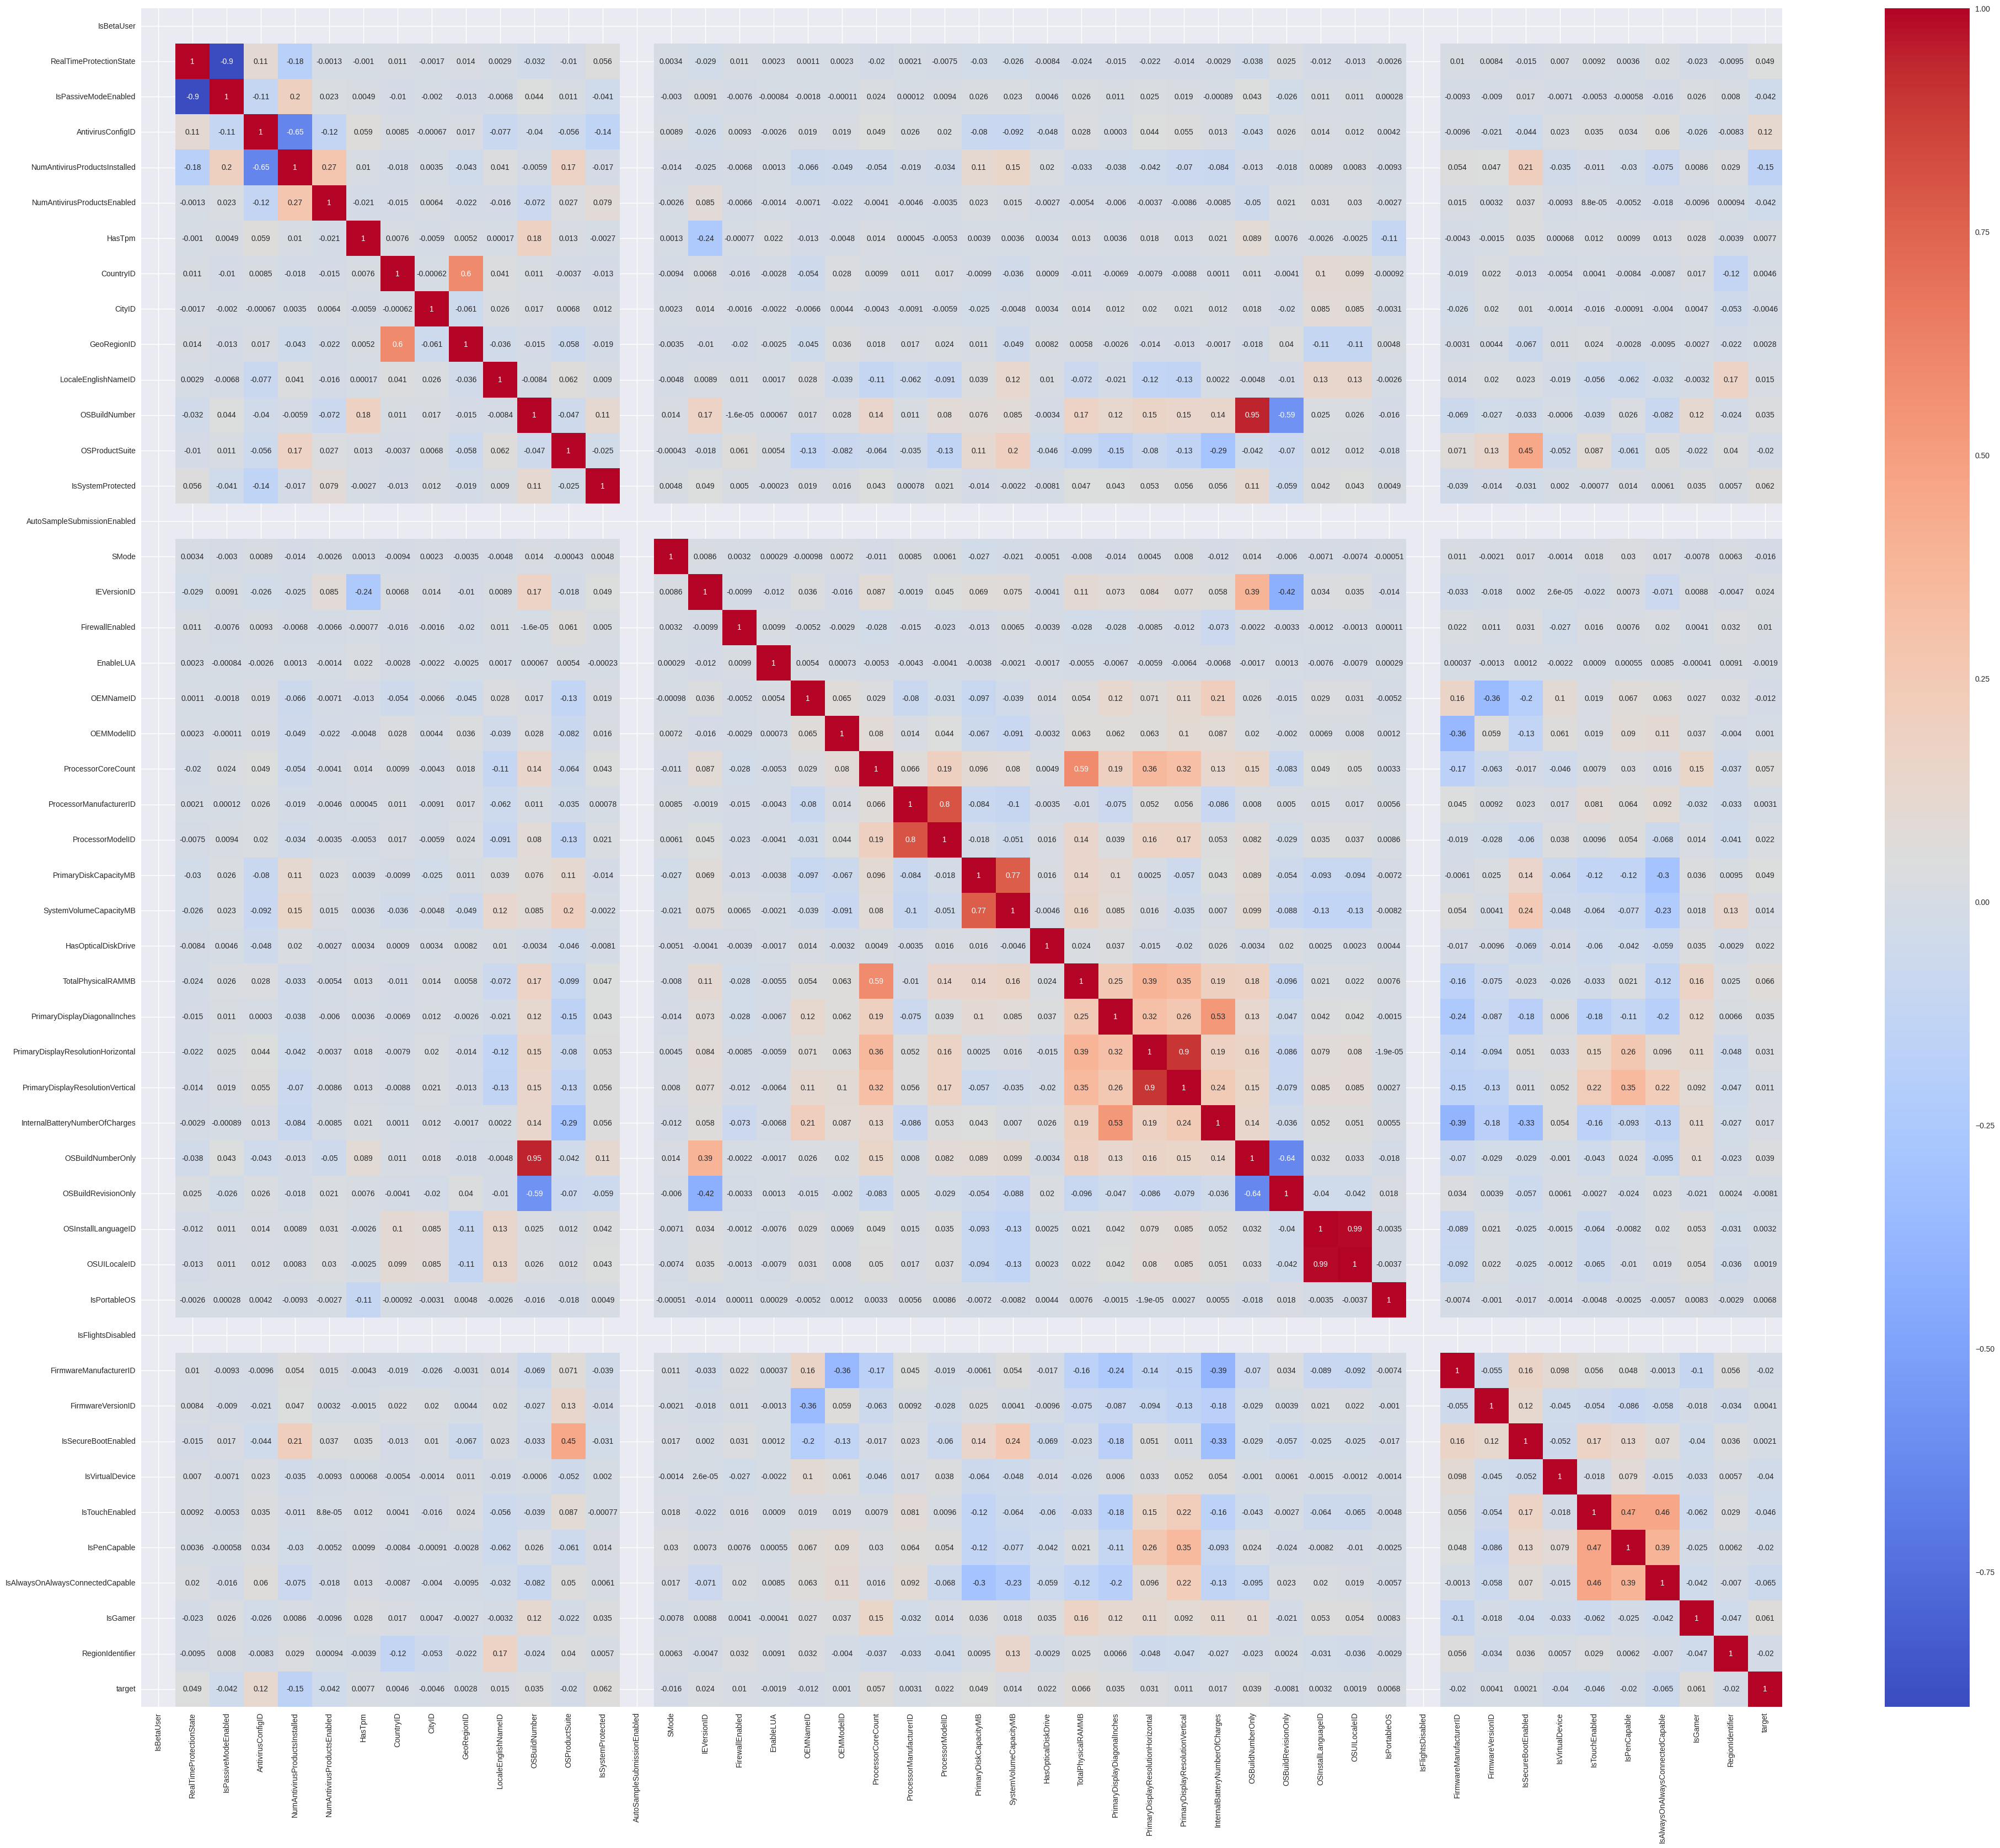

In [36]:
numerical_features = df_train.select_dtypes(include = ['int64','float64'])

plt.figure(figsize = (48,40))
sns.heatmap(numerical_features.corr(), annot =  True, cmap = 'coolwarm')

plt.show()

- **IsPassiveModeEnabled & RealTimeProtectionState are highly negatively correlated.**

- **AntivirusConfigID & NumAntivirusProductsInstalled are also negatively correlated**.

- **GeoRegionID & CountryID are positively correlated**.

- **ProcessorModelID & ProcessorManufacturerID are highly positively correlated**.

- **SystemVolumeCapacityMB & PrimaryDiskCapacityMB are also positively correlated**.

- **PrimaryDisplayResolutionVertical & PrimaryDisplayResolutionHorizontal are very highly positively correlated**

- **OSBuildNumberOnly & OSBuildNumber are positively correleated.**

- **OSUILocaleID & OSInstallLanguageID are very highly positively correlated.**

- **There are few features which have nearly zero correlation with every other feature except themselves. Like SMode, EnableLUA, etc.**

# **Preprocessing & Feature Engineering**

In [37]:
def auto_ordinal_encoder(df, max_unique=10):
    ordinal_cols = {}
    for col in df.select_dtypes(include=['object', 'category']).columns:
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) <= max_unique:
            try:
                sorted_vals = sorted(unique_vals, key=lambda x: x.lower())
                ordinal_cols[col] = sorted_vals
            except:
                continue
    return ordinal_cols


def preprocess_data(df, preprocessor=None, max_unique=10, is_train=True):
    
    # Dropping duplicates from Trainig
    if is_train:
        df = df.drop_duplicates()

    # Droping columns with more than 30% missing values
    threshold = 0.3
    df = df.dropna(thresh=int(threshold * len(df)), axis=1)
    

    # Droping non-informative columns (Feature Engineering)
    df.drop(columns=['MachineID', 
                     'IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled',
                     'OEMModelID', 'EnableLUA', 'OSUILocaleID'],
            errors='ignore', inplace=True)

    # Handle date columns (Feature Engineering)
    for col in ['DateAS', 'DateOS']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[col + '_year'] = df[col].dt.year
            df[col + '_month'] = df[col].dt.month
            df[col + '_day'] = df[col].dt.day
            df.drop(columns=[col], inplace=True)

    # Handling outliers in Trainig dataset
    if is_train:
        numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
        
        if 'target' in numerical_cols:
            numerical_cols.remove('target')

        Q1 = df[numerical_cols].quantile(0.25)
        Q3 = df[numerical_cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[numerical_cols] = df[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

    if preprocessor is None:

        ordinal_cols = auto_ordinal_encoder(df, max_unique)
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        nominal_cols = list(set(categorical_cols) - set(ordinal_cols.keys()))
        numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
        
        if 'target' in numerical_cols:
            numerical_cols.remove('target')

        # Separating numerical columns based on skewness
        skew_threshold = 1
        high_skew_cols = [col for col in numerical_cols if df[col].skew() > skew_threshold]
        low_skew_cols = [col for col in numerical_cols if col not in high_skew_cols]

        # preprocessing pipelines & columntransformer
        numeric_transformer_mean = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        numeric_transformer_median = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        nominal_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])

        ordinal_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ordinal', OrdinalEncoder(categories=[v for k, v in ordinal_cols.items()]))
        ])

        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num_mean', numeric_transformer_mean, low_skew_cols),
                ('num_median', numeric_transformer_median, high_skew_cols),
                ('nom', nominal_transformer, nominal_cols),
                ('ord', ordinal_transformer, list(ordinal_cols.keys()))
            ])

        
        X = df.drop('target', axis=1)
        y = df['target']
        X_preprocessed = preprocessor.fit_transform(X)
        
    else:
        X = df
        y = None
        X_preprocessed = preprocessor.transform(X)

    return X_preprocessed, y, preprocessor


In [38]:
train_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

X_train_preprocessed, y_train, preprocessor = preprocess_data(train_df, is_train=True)

print("Preprocessed training data shape:", X_train_preprocessed.shape)
print("Training target shape:", y_train.shape)

Preprocessed training data shape: (99835, 3495)
Training target shape: (99835,)


In [39]:
X_p = pd.DataFrame(X_train_preprocessed)
X_p

0     1         2     3     4         5         6         7     \
0       0.0   0.0  0.451179   0.0   0.0 -0.904828  0.803585 -0.804051   
1       0.0   0.0  0.451179   0.0   0.0  0.522315  0.652365 -0.030459   
2       0.0   0.0  0.451179   0.0   0.0 -0.904828 -0.804804 -0.804051   
3       0.0   0.0 -1.215487   0.0   0.0 -0.635257 -1.260883  1.191594   
4       0.0   0.0 -1.898716   0.0   0.0 -1.031685  0.753759 -1.308568   
...     ...   ...       ...   ...   ...       ...       ...       ...   
99830   0.0   0.0  1.861116   0.0   0.0 -1.031685 -0.200805 -1.308568   
99831   0.0   0.0 -1.898716   0.0   0.0  0.458887  1.148616 -0.108939   
99832   0.0   0.0  0.451179   0.0   0.0  0.538172 -0.125052 -0.142573   
99833   0.0   0.0  0.451179   0.0   0.0  0.490601  0.134142 -0.131362   
99834   0.0   0.0 -1.898716   0.0   0.0 -0.127828 -1.576462  0.608596   

           8         9     ...  3485  3486  3487  3488  3489  3490  3491  \
0     -0.284257 -1.599942  ...   4.0   0.0   1.0   5.0   2.0   6.0   5.0   
1      1.506579  0.903658  ...   6.0   0.0   0.0   1.0   0.0   8.0   2.0   
2     -0.284257  0.903658  ...   4.0   0.0   1.0   1.0   0.0   5.0   2.0   
3     -0.703082 -1.580153  ...   4.0   0.0   0.0   3.0   0.0   7.0   5.0   
4     -1.165233  0.903658  ...   6.0   0.0   0.0   1.0   2.0   8.0   2.0   
...         ...       ...  ...   ...   ...   ...   ...   ...   ...   ...   
99830 -1.165233 -0.097782  ...   6.0   0.0   1.0   1.0   0.0   8.0   2.0   
99831 -0.703082  0.903658  ...   6.0   0.0   0.0   3.0   0.0   8.0   2.0   
99832 -0.789735 -0.097782  ...   6.0   0.0   0.0   1.0   0.0   7.0   3.0   
99833 -0.703082  0.903658  ...   6.0   0.0   1.0   5.0   0.0   8.0   3.0   
99834 -0.688640  0.903658  ...   4.0   0.0   0.0   3.0   0.0   8.0   2.0   

       3492  3493  3494  
0       1.0   2.0   2.0  
1       1.0   0.0   2.0  
2       1.0   1.0   2.0  
3       1.0   0.0   2.0  
4       1.0   2.0   2.0  
...     ...   ...   ...  
99830   1.0   2.0   2.0  
99831   1.0   2.0   2.0  
99832   1.0   0.0   2.0  
99833   1.0   0.0   4.0  
99834   1.0   0.0   2.0  

[99835 rows x 3495 columns]

In [40]:
y_train.value_counts()

target
1    50443
0    49392
Name: count, dtype: int64

- **After preprocessing and feature engineering of the Trainig Data :-**

 1. **The trainig data contains 99835 rows and 3495 columns.**

 2. **The number of columns get increases may be due to One-Hot-Encoding.**

 3. **The number of rows get decreses due to removal of duplicates.**
    
 4. **Let's reduce the features after doing feature selection.**

# **Feature Seletion**

In [41]:
estimator = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
estimator.fit(X_p, y_train)

selector = SelectFromModel(estimator, prefit=True, max_features= 200)

selected_features = selector.get_support()
selected_feature_indices = np.where(selected_features)[0]

print(f"Number of selected features: {len(selected_feature_indices)}")
print(f"Selected feature indices: {selected_feature_indices}")

Number of selected features: 200
Selected feature indices: [   2    5    6    7    8    9   10   13   15   16   18   19   20   22
   23   25   26   27   32   33   35   36   38   39   40   41   42   43
   44   45   46   48   49   51   59   66   67   69   76   77  108  111
  113  115  117  118  119  121  122  123  124  125  127  129  130  166
  194  269  308  310  312  314  317  319 2213 2215 2219 2221 2226 2242
 2245 2247 2272 2283 2301 2314 2342 2354 2395 2422 2429 2435 2470 2475
 2491 2497 2561 2565 2577 2592 2597 2598 2611 2614 2623 2625 2627 2634
 2636 2649 2662 2663 2666 2668 2671 2676 2681 2696 2697 2722 2729 2786
 2794 2858 2948 3004 3030 3071 3108 3110 3119 3123 3125 3152 3155 3156
 3158 3159 3160 3164 3166 3167 3168 3170 3175 3205 3221 3269 3302 3306
 3308 3311 3338 3339 3341 3344 3346 3348 3350 3352 3354 3357 3365 3366
 3367 3368 3369 3370 3371 3372 3373 3374 3376 3378 3398 3399 3400 3401
 3403 3408 3409 3410 3422 3423 3425 3426 3428 3429 3430 3433 3436 3437
 3438 3440 3442 34

In [42]:
X_train_selected = pd.DataFrame(selector.transform(X_p))
X_train_selected

0         1         2         3         4         5         6    \
0      0.451179 -0.904828  0.803585 -0.804051 -0.284257 -1.599942  0.766871   
1      0.451179  0.522315  0.652365 -0.030459  1.506579  0.903658 -1.303980   
2      0.451179 -0.904828 -0.804804 -0.804051 -0.284257  0.903658  0.766871   
3     -1.215487 -0.635257 -1.260883  1.191594 -0.703082 -1.580153  0.766871   
4     -1.898716 -1.031685  0.753759 -1.308568 -1.165233  0.903658 -1.303980   
...         ...       ...       ...       ...       ...       ...       ...   
99830  1.861116 -1.031685 -0.200805 -1.308568 -1.165233 -0.097782 -1.303980   
99831 -1.898716  0.458887  1.148616 -0.108939 -0.703082  0.903658 -1.303980   
99832  0.451179  0.538172 -0.125052 -0.142573 -0.789735 -0.097782 -1.303980   
99833  0.451179  0.490601  0.134142 -0.131362 -0.703082  0.903658 -1.303980   
99834 -1.898716 -0.127828 -1.576462  0.608596 -0.688640  0.903658  0.766871   

            7         8         9    ...  190  191  192  193  194  195  196  \
0     -1.221407 -1.302671  0.120371  ...  1.0  4.0  1.0  5.0  2.0  6.0  5.0   
1      0.749764  0.390161  0.120371  ...  4.0  6.0  0.0  1.0  0.0  8.0  2.0   
2      0.749764  0.685021  0.120371  ...  4.0  4.0  1.0  1.0  0.0  5.0  2.0   
3     -0.715979 -0.064582  0.120371  ...  2.0  4.0  0.0  3.0  0.0  7.0  5.0   
4      0.749764  0.390161 -1.271266  ...  4.0  6.0  0.0  1.0  2.0  8.0  2.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
99830 -0.261093  1.866468  0.120371  ...  3.0  6.0  1.0  1.0  0.0  8.0  2.0   
99831  0.749764 -0.594044  0.120371  ...  4.0  6.0  0.0  3.0  0.0  8.0  2.0   
99832 -0.564350 -0.064582  0.120371  ...  3.0  6.0  0.0  1.0  0.0  7.0  3.0   
99833  0.749764  0.777415  0.120371  ...  4.0  6.0  1.0  5.0  0.0  8.0  3.0   
99834  0.749764 -0.594044  0.120371  ...  4.0  4.0  0.0  3.0  0.0  8.0  2.0   

       197  198  199  
0      1.0  2.0  2.0  
1      1.0  0.0  2.0  
2      1.0  1.0  2.0  
3      1.0  0.0  2.0  
4      1.0  2.0  2.0  
...    ...  ...  ...  
99830  1.0  2.0  2.0  
99831  1.0  2.0  2.0  
99832  1.0  0.0  2.0  
99833  1.0  0.0  4.0  
99834  1.0  0.0  2.0  

[99835 rows x 200 columns]

- **During Feature selection, I have used Wrapper based feature selection.**

- **I have selected features through Select From Model Technique, which is one of the Wrapper based feature selection.**

- **I have choosed 200 features.**

# **Train-Validation Split**

In [43]:
X = X_train_selected

X_tr, X_val, y_tr, y_val = train_test_split(X, y_train, test_size=0.2, random_state=42)

print(X_tr.shape)
print(y_tr.shape)
print(X_val.shape)
print(y_val.shape)

(79868, 200)
(79868,)
(19967, 200)
(19967,)


- **Here I am using Random-split rather than stratiffied-split, because our target variable is balanced.**

- **After the split :-**
  * **The training data contains 79868 rows and 200 columns.**
  * **The test/validation data contains 19967 rows and 200 columns.**

# **Baseline Model**

In [44]:
model = DummyClassifier(random_state = 42)
model.fit(X_tr, y_tr)

y_pred_tr = model.predict(X_tr)
y_pred_val = model.predict(X_val)

train_score = acc(y_tr , y_pred_tr)
val_score = acc(y_val, y_pred_val)

print(f'Train score: {train_score}, Validation score: {val_score}')

Train score: 0.5049331396804728, Validation score: 0.506585866680022


- **The baseline model gives training score as 0.505 and validation score as 0.507**

# **Applying Random Forest classifier Algorithim**

In [45]:
Rf_class = RandomForestClassifier(random_state=42,n_estimators=200)
Rf_class.fit(X_tr, y_tr)

Rf_y_pred_train = Rf_class.predict(X_tr)
Rf_y_pred_val = Rf_class.predict(X_val)

Rf_train_score = acc(y_tr,Rf_y_pred_train)
Rf_val_score = acc(y_val,Rf_y_pred_val)

print(f'Training score: {Rf_train_score}, Validation score: {Rf_val_score}')

Training score: 1.0, Validation score: 0.613311964741824


- **The Random forest classifier gives a perfect training score as 1 but validation score as 0.615 after running with default parameters.**

- **The model seems to be over-fitting on training dataset.**

# **Applying Logistic Regression**

In [46]:
Lr = LogisticRegression(max_iter=5000,random_state=42,n_jobs=-1)
Lr.fit(X_tr,y_tr)

Lr_y_pred_train = Lr.predict(X_tr)
Lr_y_pred_val = Lr.predict(X_val)

Lr_train_score = acc(Lr_y_pred_train, y_tr)
Lr_val_score = acc(Lr_y_pred_val, y_val)

print(f'Train score: {Lr_train_score}, Validation score: {Lr_val_score}')

Train score: 0.6126233284920118, Validation score: 0.604347172835178


- **The Logistic Regression model gives a training score as 0.613 and validation score as 0.605 ,after running with default parameters.**

- **Both Training and Validation scores are nearly equal.**

- **But the validation score for this model is less compare to Random Forest model**.

# **Applying LightGBM Classifier**

In [47]:
LC_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
LC_model.fit(X_tr, y_tr)

y_pred_tr = LC_model.predict(X_tr)
y_pred_val = LC_model.predict(X_val)

LC_train_score = acc(y_tr , y_pred_tr)
LC_val_score = acc(y_val, y_pred_val)

print(f'Train score: {LC_train_score}, Validation score: {LC_val_score}')

[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733
Train score: 0.6578729904342164, Validation score: 0.624480392647869


- **The LightGBM classifer gives training score around 0.658 and validation score as 0.625, after running with default parameters.**

- **The model seems to be over-fitting on training data.**

- **The validation score is much better in this model compare to other two, Random Forest & Logistic regression model**

- **Let's try tuning the hyperparameters, so that we may get better validation score.**

# **Hyperparameter Tunning through RandomizedSearchCV for LightGBM**

In [48]:
tune_parameters = [{"num_leaves": [200,400,300], "learning_rate" : [0.01,0.1,0.2],
                    "max_bin":[300,500,600],"num_iterations":[700,800,900],"boosting":["gbdt","rf","dart"]}]

lgbc = lgb.LGBMClassifier(random_state=42,max_iterations=5000)
lgbc_model = RandomizedSearchCV(estimator=lgbc, param_distributions=tune_parameters)

lgbc_model.fit(X_tr,y_tr)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3566
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3560
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3567
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3566
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5159
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5146
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5147
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5157
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5150
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4684
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4680
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4670
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4684
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4679
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5159
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5146
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5147
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5157
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5150
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3566
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3560
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3567
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3566
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3566
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3560
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3567
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3566
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4684
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4680
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32262, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4670
[LightGBM] [Info] Number of data points in the train set: 63894, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504930 -> initscore=0.019721
[LightGBM] [Info] Start training from score 0.019721
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4684
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 32263, number of negative: 31632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4679
[LightGBM] [Info] Number of data points in the train set: 63895, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504938 -> initscore=0.019752
[LightGBM] [Info] Start training from score 0.019752
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1284, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 955, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 282, in train
    boost

[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3649
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733


RandomizedSearchCV(estimator=LGBMClassifier(max_iterations=5000,
                                            random_state=42),
                   param_distributions=[{'boosting': ['gbdt', 'rf', 'dart'],
                                         'learning_rate': [0.01, 0.1, 0.2],
                                         'max_bin': [300, 500, 600],
                                         'num_iterations': [700, 800, 900],
                                         'num_leaves': [200, 400, 300]}])

In [49]:
print ("The best parameter value is:",lgbc_model.best_params_)

The best parameter value is: {'num_leaves': 400, 'num_iterations': 900, 'max_bin': 300, 'learning_rate': 0.01, 'boosting': 'gbdt'}


In [50]:
lgb_classifier_rs = lgb.LGBMClassifier(num_leaves = 400, learning_rate = 0.01, num_iterations = 900, max_bin = 300, boosting = 'gbdt',
                                       random_state = 42)

lgb_classifier_rs.fit(X_tr, y_tr)

lgb_y_pred_train= lgb_classifier_rs.predict(X_tr)
lgb_y_pred_val= lgb_classifier_rs.predict(X_val)

lgb_train_score = acc(y_tr , lgb_y_pred_train)
lgb_val_score = acc(y_val, lgb_y_pred_val)

print(f'Train score: {lgb_train_score}, Validation score: {lgb_val_score}')

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 40328, number of negative: 39540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3649
[LightGBM] [Info] Number of data points in the train set: 79868, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504933 -> initscore=0.019733
[LightGBM] [Info] Start training from score 0.019733
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Train score

- **After tunning the few hyper parameters like 'num_leaves', 'num_iterations', 'max_bin', 'learning_rate' & 'boosting' of LightGBM we get training score around 0.905 & validation score as 0.623 .**

- **The model clearly seems to be overfitting on training data that might be due to large 'num_leaves'.**

- **The validation scores are nearly equal, i.e before & after tuning the hyperparameters.** 

In [51]:
val_score_classification_report = cr(y_val,lgb_y_pred_val)
print(val_score_classification_report)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      9852
           1       0.62      0.65      0.63     10115

    accuracy                           0.62     19967
   macro avg       0.62      0.62      0.62     19967
weighted avg       0.62      0.62      0.62     19967



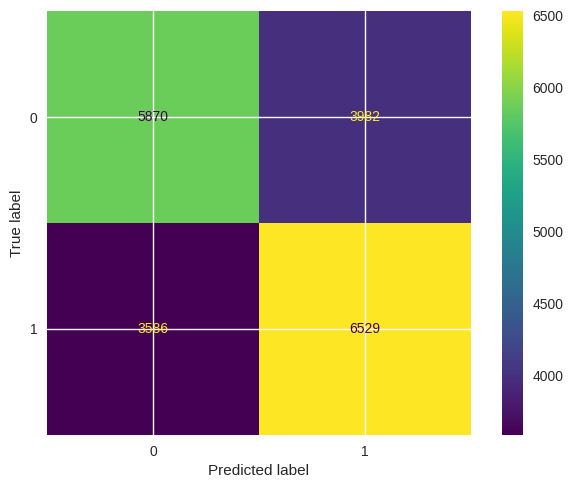

In [52]:
confusion_matrix_val = cm(y_val,lgb_y_pred_val)

cnf_validate_lgb = cmd(confusion_matrix_val)
cnf_validate_lgb.plot()

- **From confusion matrix :-**

  * The number of true positives and true negatives are  6,538 & 5895 respectively.
 
  * The number of false positives are 3,957 & false negatives are 3577.

- **From classification report :-**

  * The model is performing moderately well.

  * Precision, recall, and F1-score are balanced, meaning the model treats both classes fairly equally.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


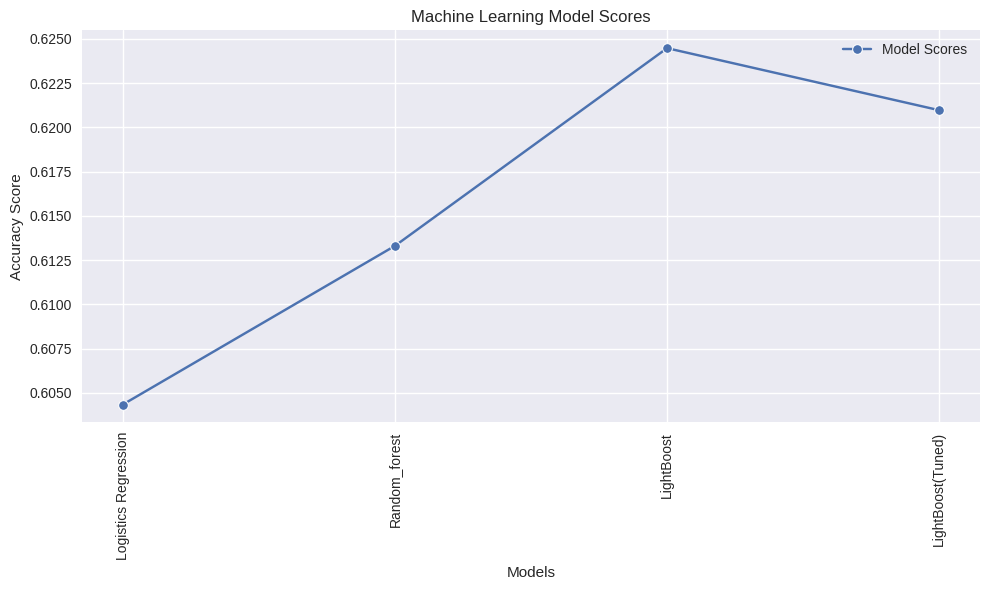

In [53]:
models = np.array(["Logistics Regression","Random_forest","LightBoost","LightBoost(Tuned)"])

accuracy = np.array([Lr_val_score,Rf_val_score,LC_val_score,lgb_val_score])

plt.figure(figsize=(10, 6))
sns.lineplot(x=models, y=accuracy, marker='o', label='Model Scores')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Machine Learning Model Scores')
plt.legend()
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

# **Test data**

In [54]:
test_df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
X_test_preprocessed, _, _ = preprocess_data(test_df, preprocessor=preprocessor, is_train=False)

print("Preprocessed test data shape:", X_test_preprocessed.shape)


Preprocessed test data shape: (10000, 3495)


In [55]:
X_t = pd.DataFrame(X_test_preprocessed)
X_t

0     1         2     3     4         5         6         7     \
0      0.0   0.0  0.451179   0.0   0.0  1.743316  0.992621  0.608596   
1      0.0   0.0 -1.269747   1.0   0.0 -0.635257  1.178213  1.191594   
2      0.0   0.0  0.097421   0.0   0.0  0.522315  1.505310 -0.030459   
3      0.0   0.0 -2.362771   0.0   0.0 -1.063400  1.019675  0.787980   
4      0.0   0.0 -2.582182   0.0   0.0 -1.031685 -0.612838 -1.308568   
...    ...   ...       ...   ...   ...       ...       ...       ...   
9995   0.0   0.0 -4.499298   0.0   0.0  1.568887 -0.928949  1.202805   
9996   0.0   0.0  0.451179   0.0   0.0  1.679887 -1.339814  1.202805   
9997   0.0   0.0 -1.020008   0.0   0.0 -0.270542  1.316008 -0.501341   
9998   0.0   0.0  0.451179   0.0   0.0 -1.570828  0.845787 -1.790662   
9999   0.0   0.0 -2.362771   0.0   0.0 -0.635257 -0.005334  1.191594   

          8         9     ...  3485  3486  3487  3488  3489  3490  3491  3492  \
0    -1.540731  0.903658  ...   6.0   0.0   0.0   3.0   0.0   8.0   2.0   0.0   
1    -0.703082 -8.132087  ...   4.0   0.0   0.0   3.0   0.0   6.0   2.0   1.0   
2     1.506579 -0.097782  ...   4.0   0.0   0.0   3.0   0.0   7.0   3.0   1.0   
3     1.362156 -0.097782  ...   4.0   0.0   0.0   3.0   0.0   6.0   3.0   1.0   
4    -1.165233  0.903658  ...   6.0   0.0   0.0   3.0   0.0   7.0   3.0   1.0   
...        ...       ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
9995 -0.688640 -0.097782  ...   4.0   0.0   0.0   3.0   0.0   8.0   2.0   1.0   
9996 -0.688640 -1.580153  ...   6.0   0.0   0.0   3.0   0.0   2.0   5.0   1.0   
9997 -0.139835  0.903658  ...   4.0   0.0   1.0   3.0   0.0   8.0   5.0   1.0   
9998  1.318830 -0.097782  ...   4.0   0.0   0.0   3.0   0.0   7.0   5.0   1.0   
9999 -0.703082  0.903658  ...   4.0   0.0   0.0   3.0   0.0   8.0   2.0   1.0   

      3493  3494  
0      2.0   2.0  
1      2.0   2.0  
2      0.0   2.0  
3      0.0   2.0  
4      2.0   4.0  
...    ...   ...  
9995   0.0   4.0  
9996   4.0   2.0  
9997   0.0   2.0  
9998   0.0   2.0  
9999   2.0   2.0  

[10000 rows x 3495 columns]

- **After preprocessing the test dataset, there are 10000 rows & 3495 columns.**

In [56]:
X_test_selected = pd.DataFrame(selector.transform(X_t))
X_test_selected

0         1         2         3         4         5         6    \
0     0.451179  1.743316  0.992621  0.608596 -1.540731  0.903658 -1.303980   
1    -1.269747 -0.635257  1.178213  1.191594 -0.703082 -8.132087  0.766871   
2     0.097421  0.522315  1.505310 -0.030459  1.506579 -0.097782  0.766871   
3    -2.362771 -1.063400  1.019675  0.787980  1.362156 -0.097782  0.766871   
4    -2.582182 -1.031685 -0.612838 -1.308568 -1.165233  0.903658 -1.303980   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -4.499298  1.568887 -0.928949  1.202805 -0.688640 -0.097782  0.766871   
9996  0.451179  1.679887 -1.339814  1.202805 -0.688640 -1.580153 -1.303980   
9997 -1.020008 -0.270542  1.316008 -0.501341 -0.139835  0.903658  0.766871   
9998  0.451179 -1.570828  0.845787 -1.790662  1.318830 -0.097782  0.766871   
9999 -2.362771 -0.635257 -0.005334  1.191594 -0.703082  0.903658  0.766871   

            7         8         9    ...  190  191  192  193  194  195  196  \
0      0.749764 -0.064582  0.120371  ...  4.0  6.0  0.0  3.0  0.0  8.0  2.0   
1     10.656162 -1.283389 -1.271266  ...  8.0  4.0  0.0  3.0  0.0  6.0  2.0   
2     -0.261093 -0.064582  0.120371  ...  3.0  4.0  0.0  3.0  0.0  7.0  3.0   
3     -0.261093  0.390161  0.120371  ...  3.0  4.0  0.0  3.0  0.0  6.0  3.0   
4      0.749764  0.390161  0.120371  ...  4.0  6.0  0.0  3.0  0.0  7.0  3.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995  -0.261093 -0.594044  0.120371  ...  3.0  4.0  0.0  3.0  0.0  8.0  2.0   
9996  -0.867607  0.390161  0.120371  ...  2.0  6.0  0.0  3.0  0.0  2.0  5.0   
9997   0.749764  0.390161  0.120371  ...  4.0  4.0  1.0  3.0  0.0  8.0  5.0   
9998   0.648678 -0.448622  0.120371  ...  3.0  4.0  0.0  3.0  0.0  7.0  5.0   
9999   0.749764 -0.594044  0.120371  ...  4.0  4.0  0.0  3.0  0.0  8.0  2.0   

      197  198  199  
0     0.0  2.0  2.0  
1     1.0  2.0  2.0  
2     1.0  0.0  2.0  
3     1.0  0.0  2.0  
4     1.0  2.0  4.0  
...   ...  ...  ...  
9995  1.0  0.0  4.0  
9996  1.0  4.0  2.0  
9997  1.0  0.0  2.0  
9998  1.0  0.0  2.0  
9999  1.0  2.0  2.0  

[10000 rows x 200 columns]

- **We have choosed two hundred features from preprocessed test dataset.**

# **Best Model**

In [57]:
lgb_classifier_rs = lgb.LGBMClassifier(num_leaves = 400,learning_rate = 0.01,num_iterations = 900, max_bin = 300, boosting = 'gbdt',
                                       random_state = 42)

lgb_classifier_rs.fit(X_train_selected, y_train)
y_pred = lgb_classifier_rs.predict(X_test_selected)


submission = pd.DataFrame({"id": range(X_test_selected.shape[0]), "target": y_pred})

submission.to_csv('submission.csv', index=False)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Number of positive: 50443, number of negative: 49392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3698
[LightGBM] [Info] Number of data points in the train set: 99835, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505264 -> initscore=0.021056
[LightGBM] [Info] Start training from score 0.021056
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


- **With the Hyperparameters tuned, LGBMClassifier model gives accuraccy around 0.63110**

- **The best Hyperparameter values are {'num_leaves': 400, 'num_iterations': 900, 'max_bin': 300, 'learning_rate': 0.01, 'boosting': 'gbdt'} after doing RandomizedSearchCV.**